## Comparative run
Sample THEx data so that it is consistent with the filtered PLASTICCS data. THEN run the model on this data and see if there is a difference between this and the original model with the original data.

## 1. Pull down THEx filtered data

In [1]:
from evaluation.sampling_test import *

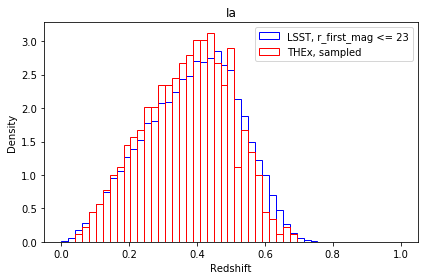

In [2]:
Ia_sampled_data = get_THEx_sampled_data(class_name = "Ia", max_rmag = 23, num_samples = 500)

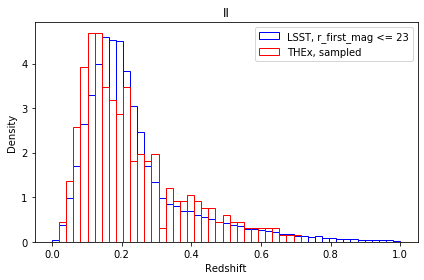

In [3]:
II_sampled_data = get_THEx_sampled_data(class_name = "II", max_rmag = 23, num_samples = 500)

In [4]:
II_sampled_data.shape

(324, 12)

In [5]:
Ia_sampled_data.shape

(439, 12)

Save range limited THEx data, with consistent column ordering

In [6]:

ordered_mags = ["g_mag", "r_mag", "i_mag", "z_mag", "y_mag",
        "W1_mag", "W2_mag", "H_mag", "K_mag", 'J_mag',
       "redshift"]


In [7]:
# Set up data for testing
import pandas as pd
sampled_data = pd.concat([Ia_sampled_data, II_sampled_data])
#Shuffle
sampled_data = sampled_data.sample(frac=1).reset_index(drop=True)
# Split
y_test_LSST_like = sampled_data[['transient_type']] 
X_test_LSST_like = sampled_data.drop(labels=['transient_type'], axis =1 )

# Rearrange columns so order is consistent with THEx data we are training on
X_test_LSST_like=X_test_LSST_like[ordered_mags] 

Save original THEx data with consistent column ordering, randomly sampled to have the same number of samples as in the range-limited dataset. We need to use the same number of samples in each class to avoid any bias due to class frequency.

In [8]:
# Sample randomly to have same number as in other run, 
# 324 II
# 439 Ia
thex_dataset = get_data('g_W2')
Ia_data = get_thex_class_data("Ia", thex_dataset)
Ia_data = Ia_data.sample(439).reset_index(drop=True)
II_data = get_thex_class_data("II", thex_dataset)
II_data = II_data.sample(324).reset_index(drop=True)
combined_df = pd.concat([Ia_data, II_data])
combined_df = combined_df.sample(frac=1).reset_index(drop=True)
y_orig_sampled = combined_df[['transient_type']] 
X_orig_sampled = combined_df.drop(labels=['transient_type'], axis=1 )

# Rearrange columns so order is consistent with THEx data we are testing on
X_orig_sampled=X_orig_sampled[ordered_mags] 

## 2. Run Evaluation
Run model on THEx data as-is - be sure to use the same NUMBER of class samples as above.

In [11]:
import numpy as np

def get_test_results(model, X_test, y_test):
    """
    Train on model data and test on passed in data for 10 trials, and visualize results.
    """
    NUM_TRIALS = 10
    TRAIN_PROP = .8
    results = [] 
    for i in range(NUM_TRIALS):
        X_train, y_train, X_test, y_test = model.manually_stratify(model.X, model.y,TRAIN_PROP)
        model.train_model(X_train, y_train)

        # Test model 
        probabilities = model.get_all_class_probabilities(X_test, model.normalize)
        # Add labels as column to probabilities, for later evaluation
        label_column = y_test['transient_type'].values.reshape(-1, 1)
        probabilities = np.hstack((probabilities, label_column))
        results.append(probabilities)
    model.results = results
    model.visualize_performance()

Evaluate LSST-range-matched sampled data

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWar

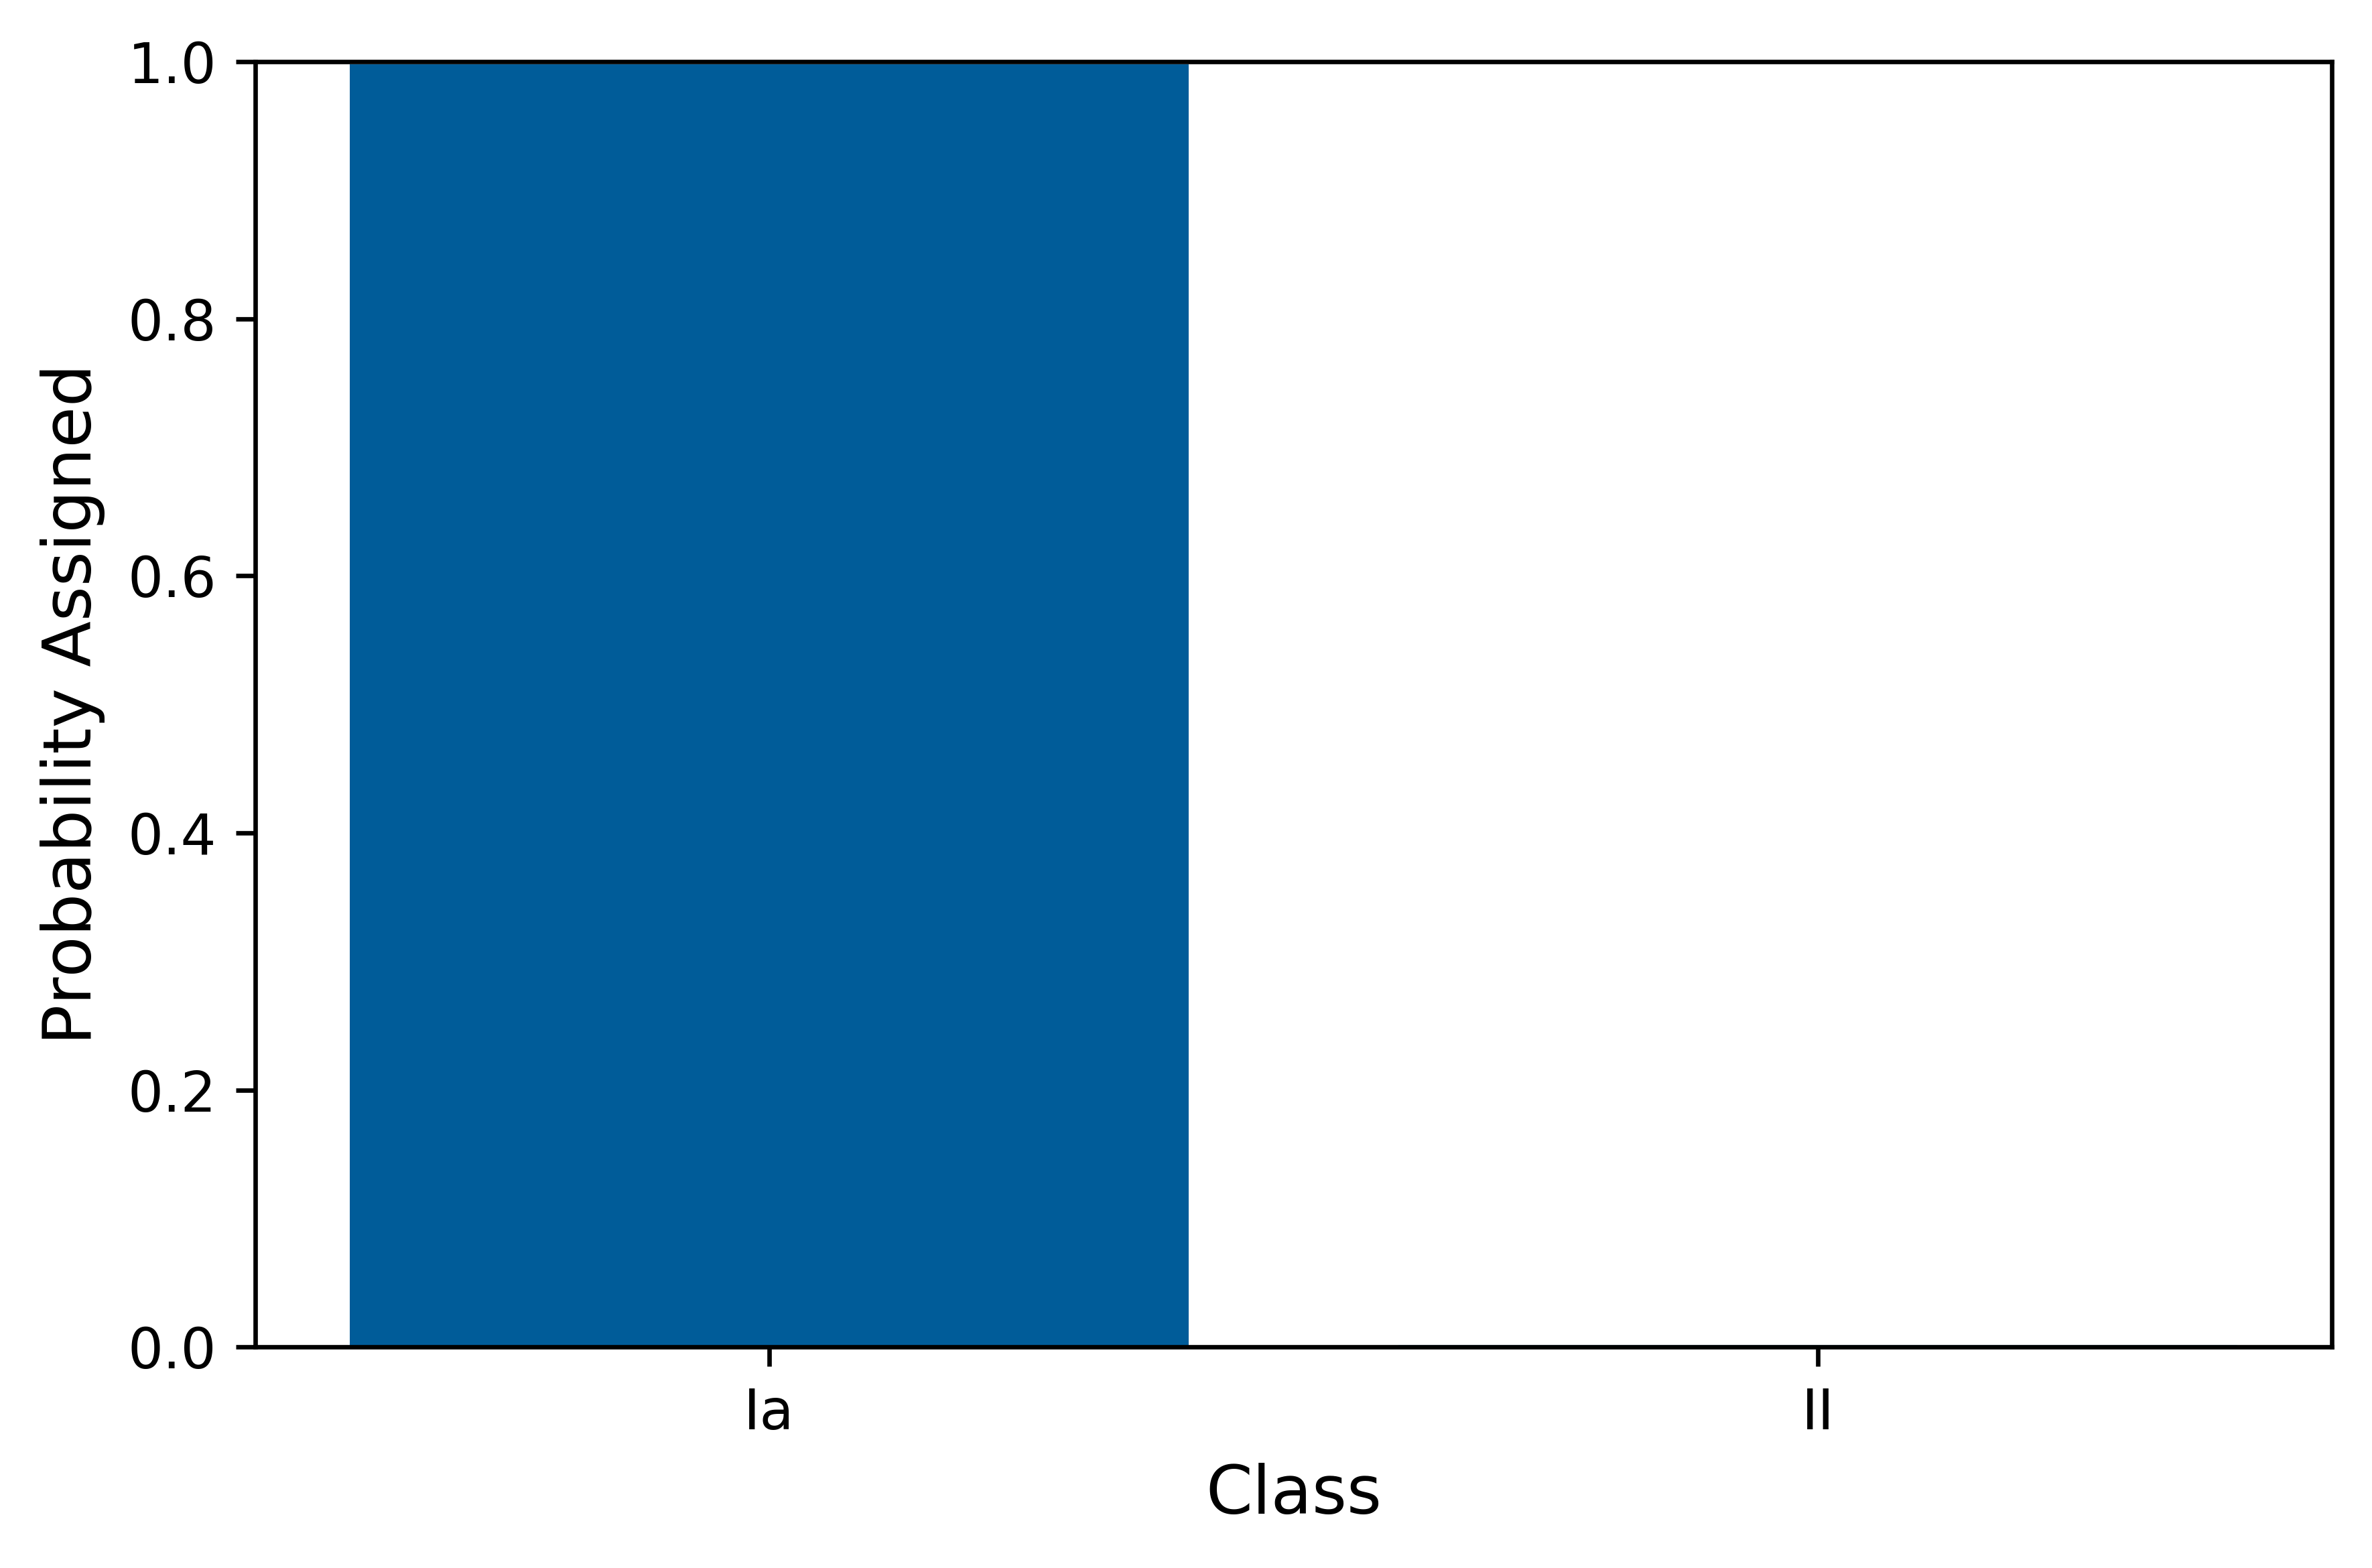

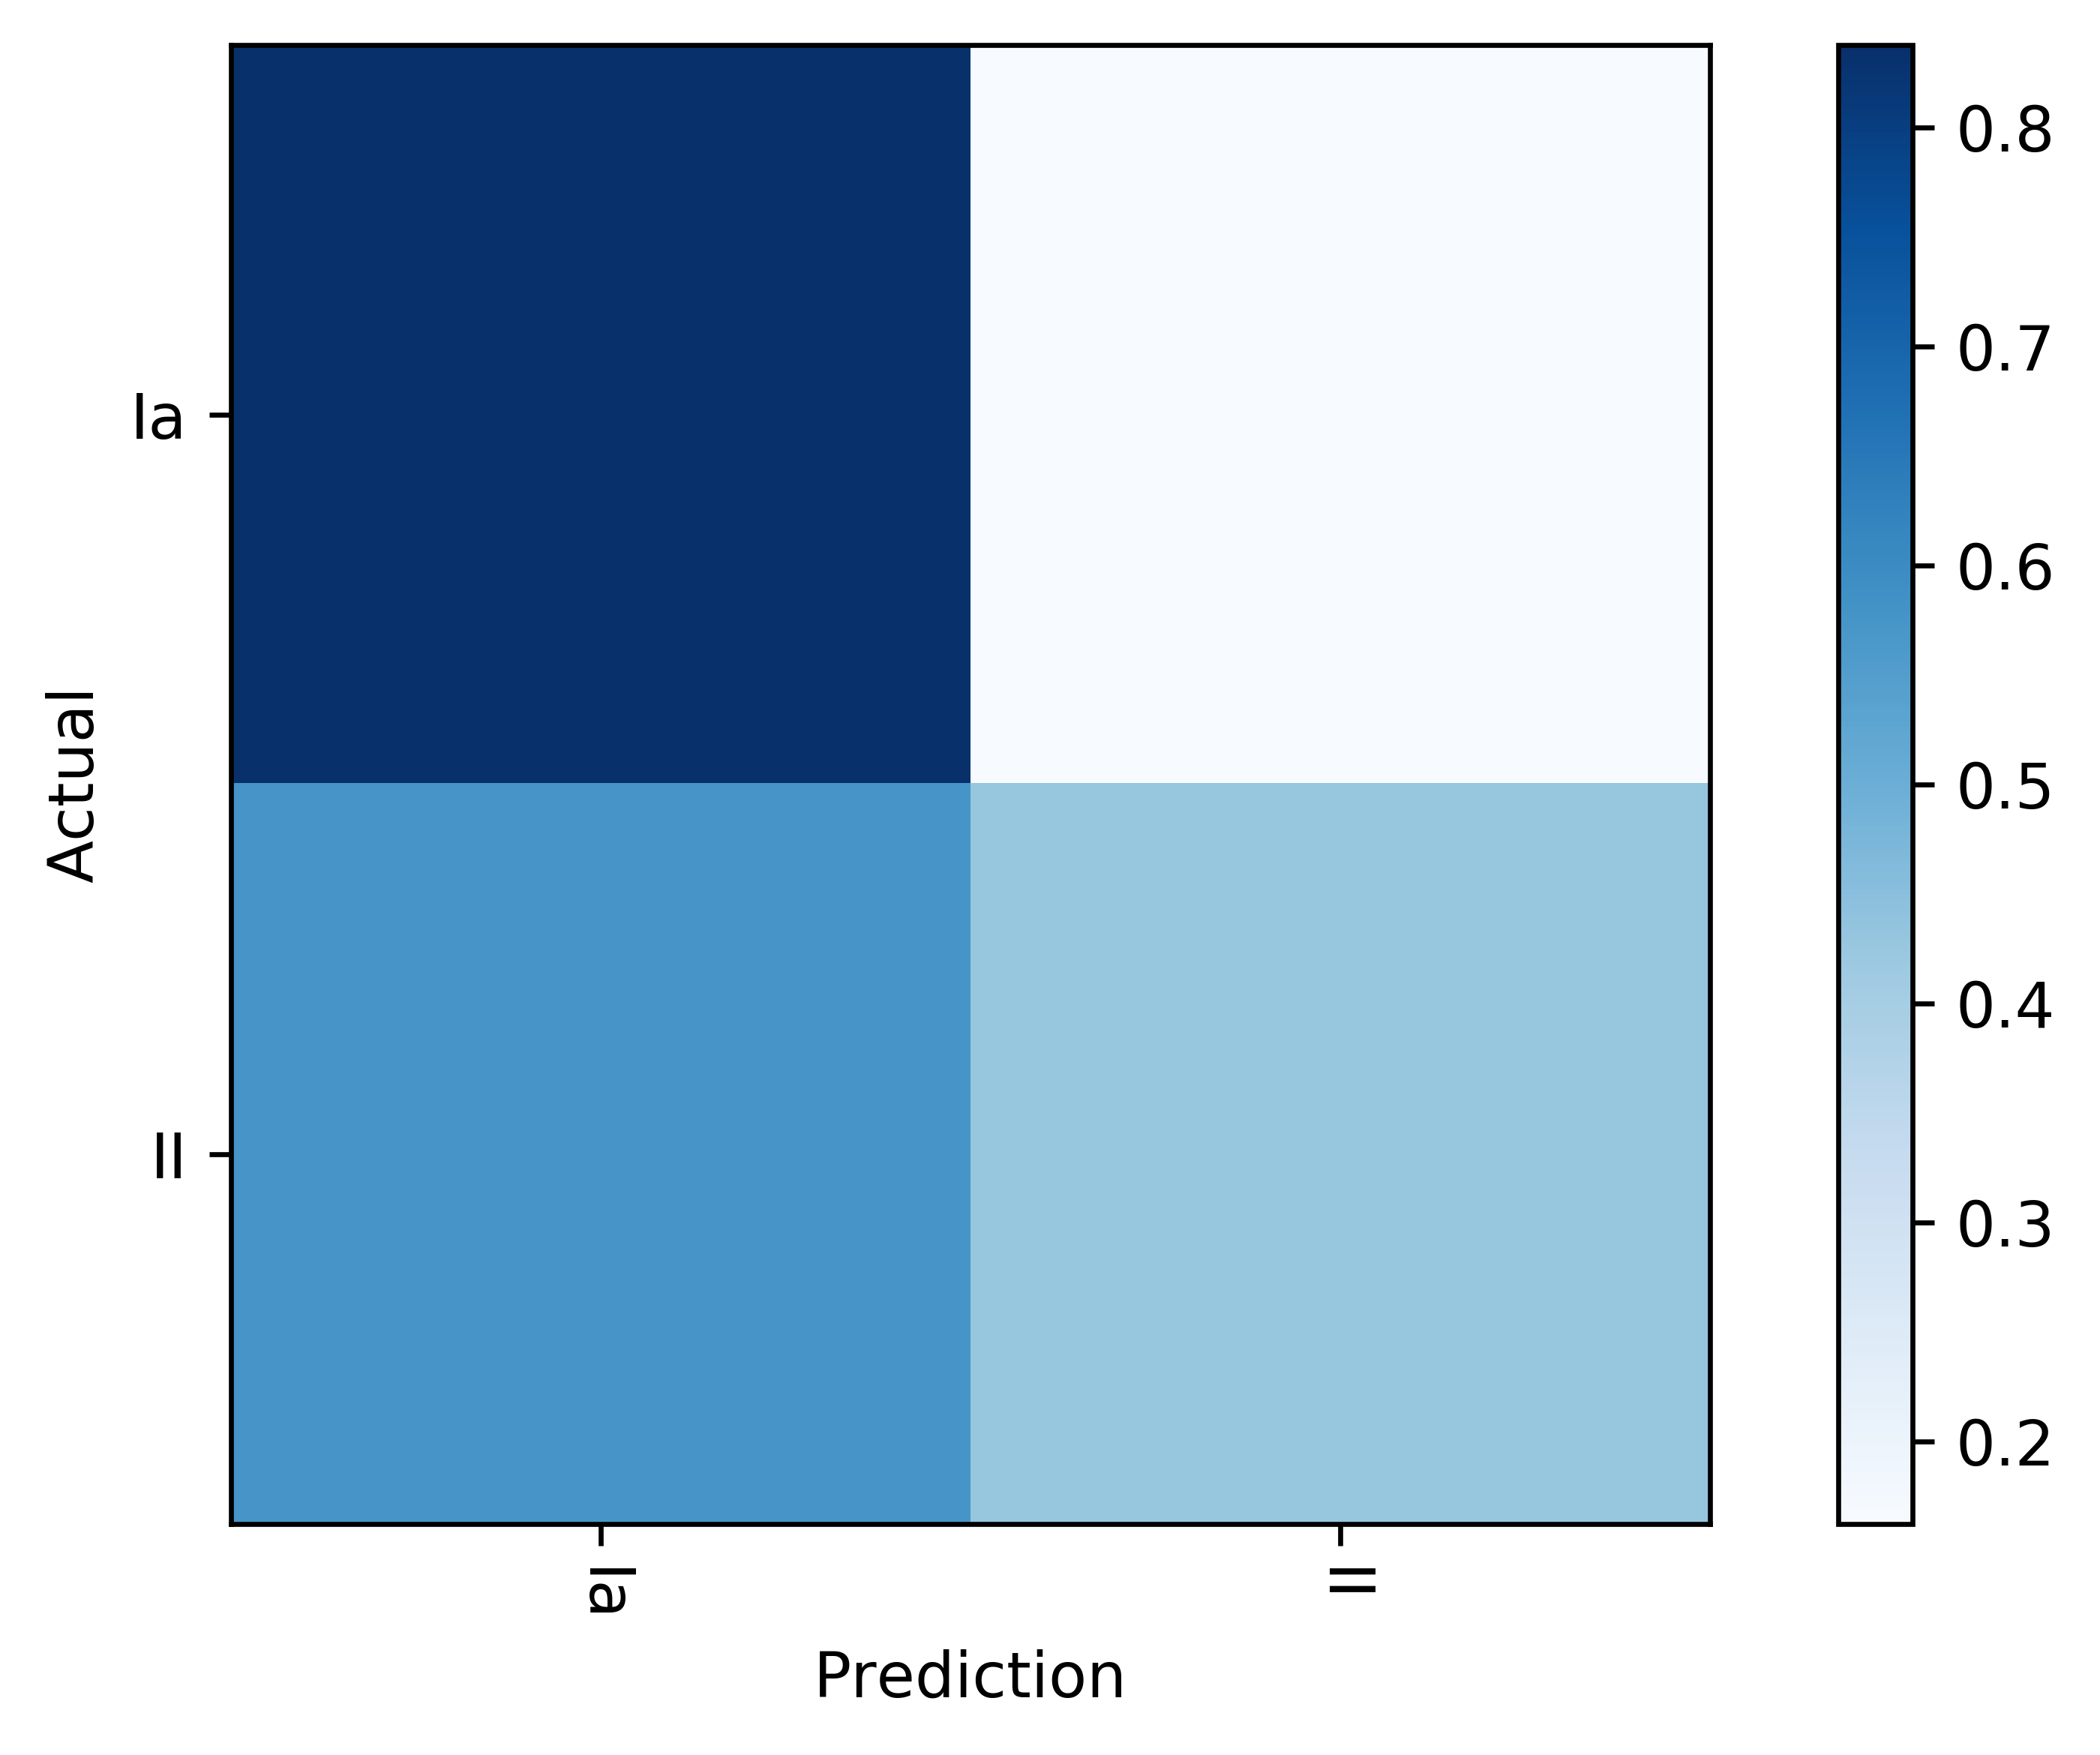

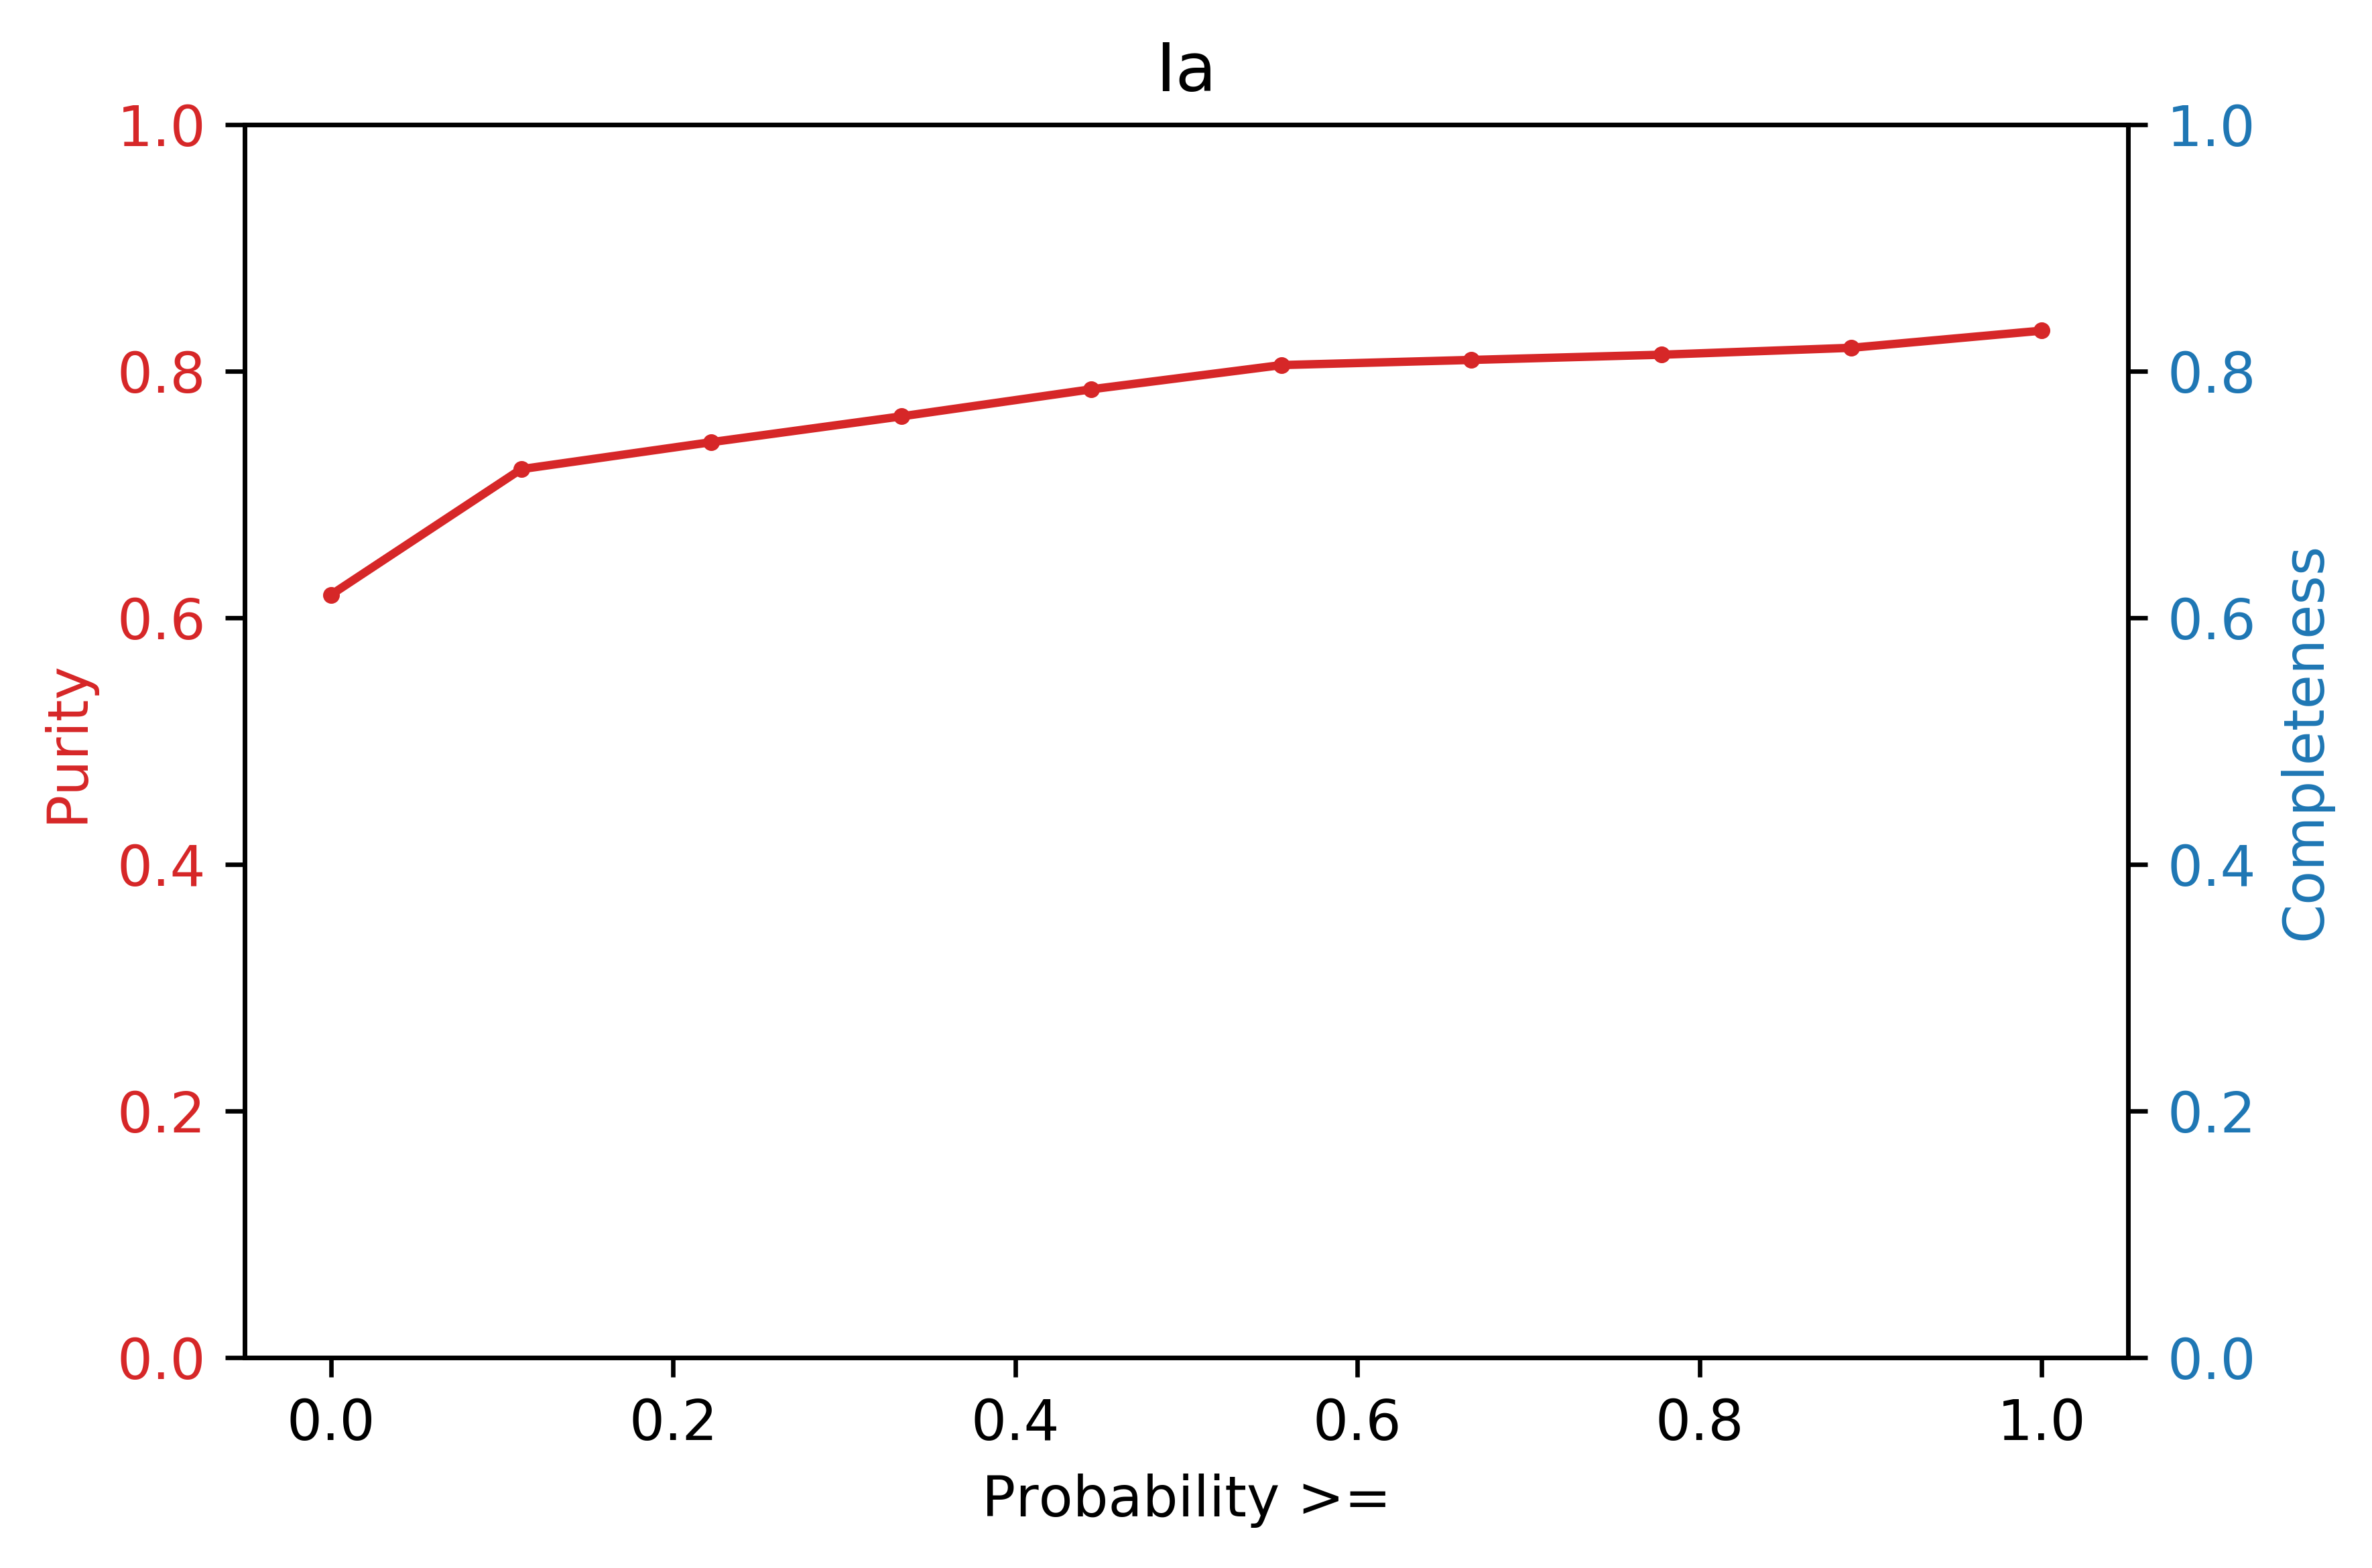

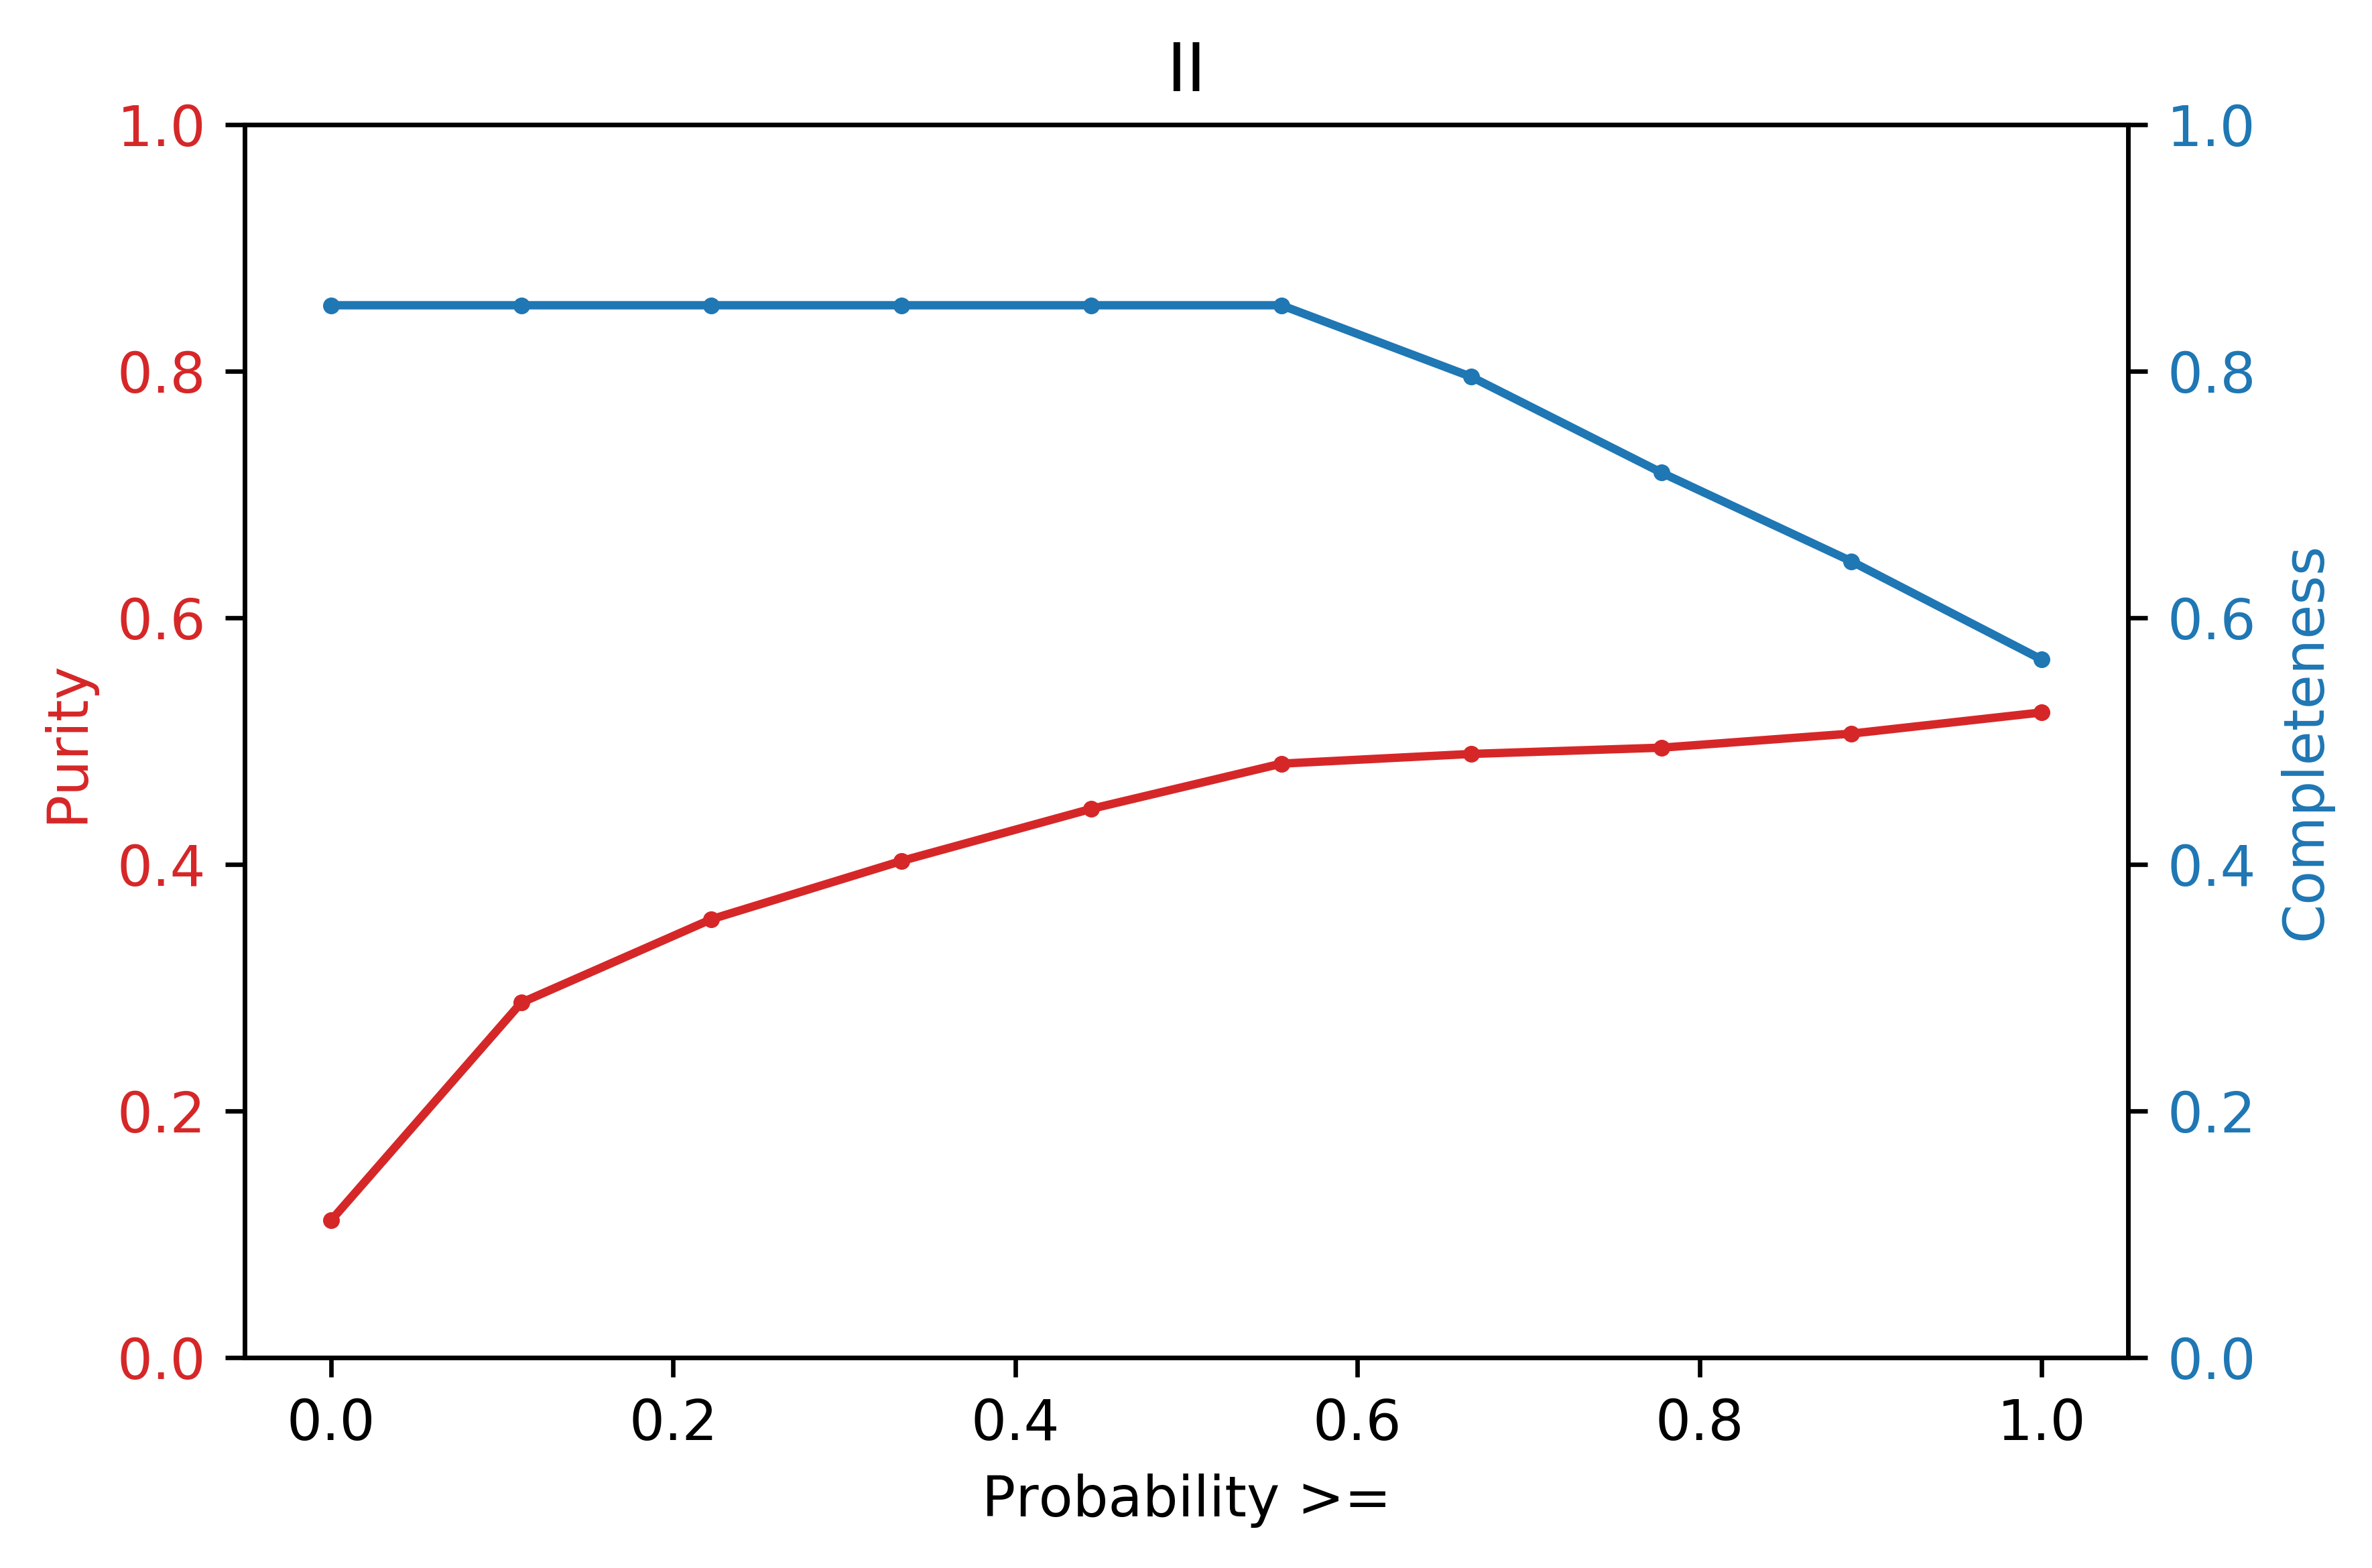

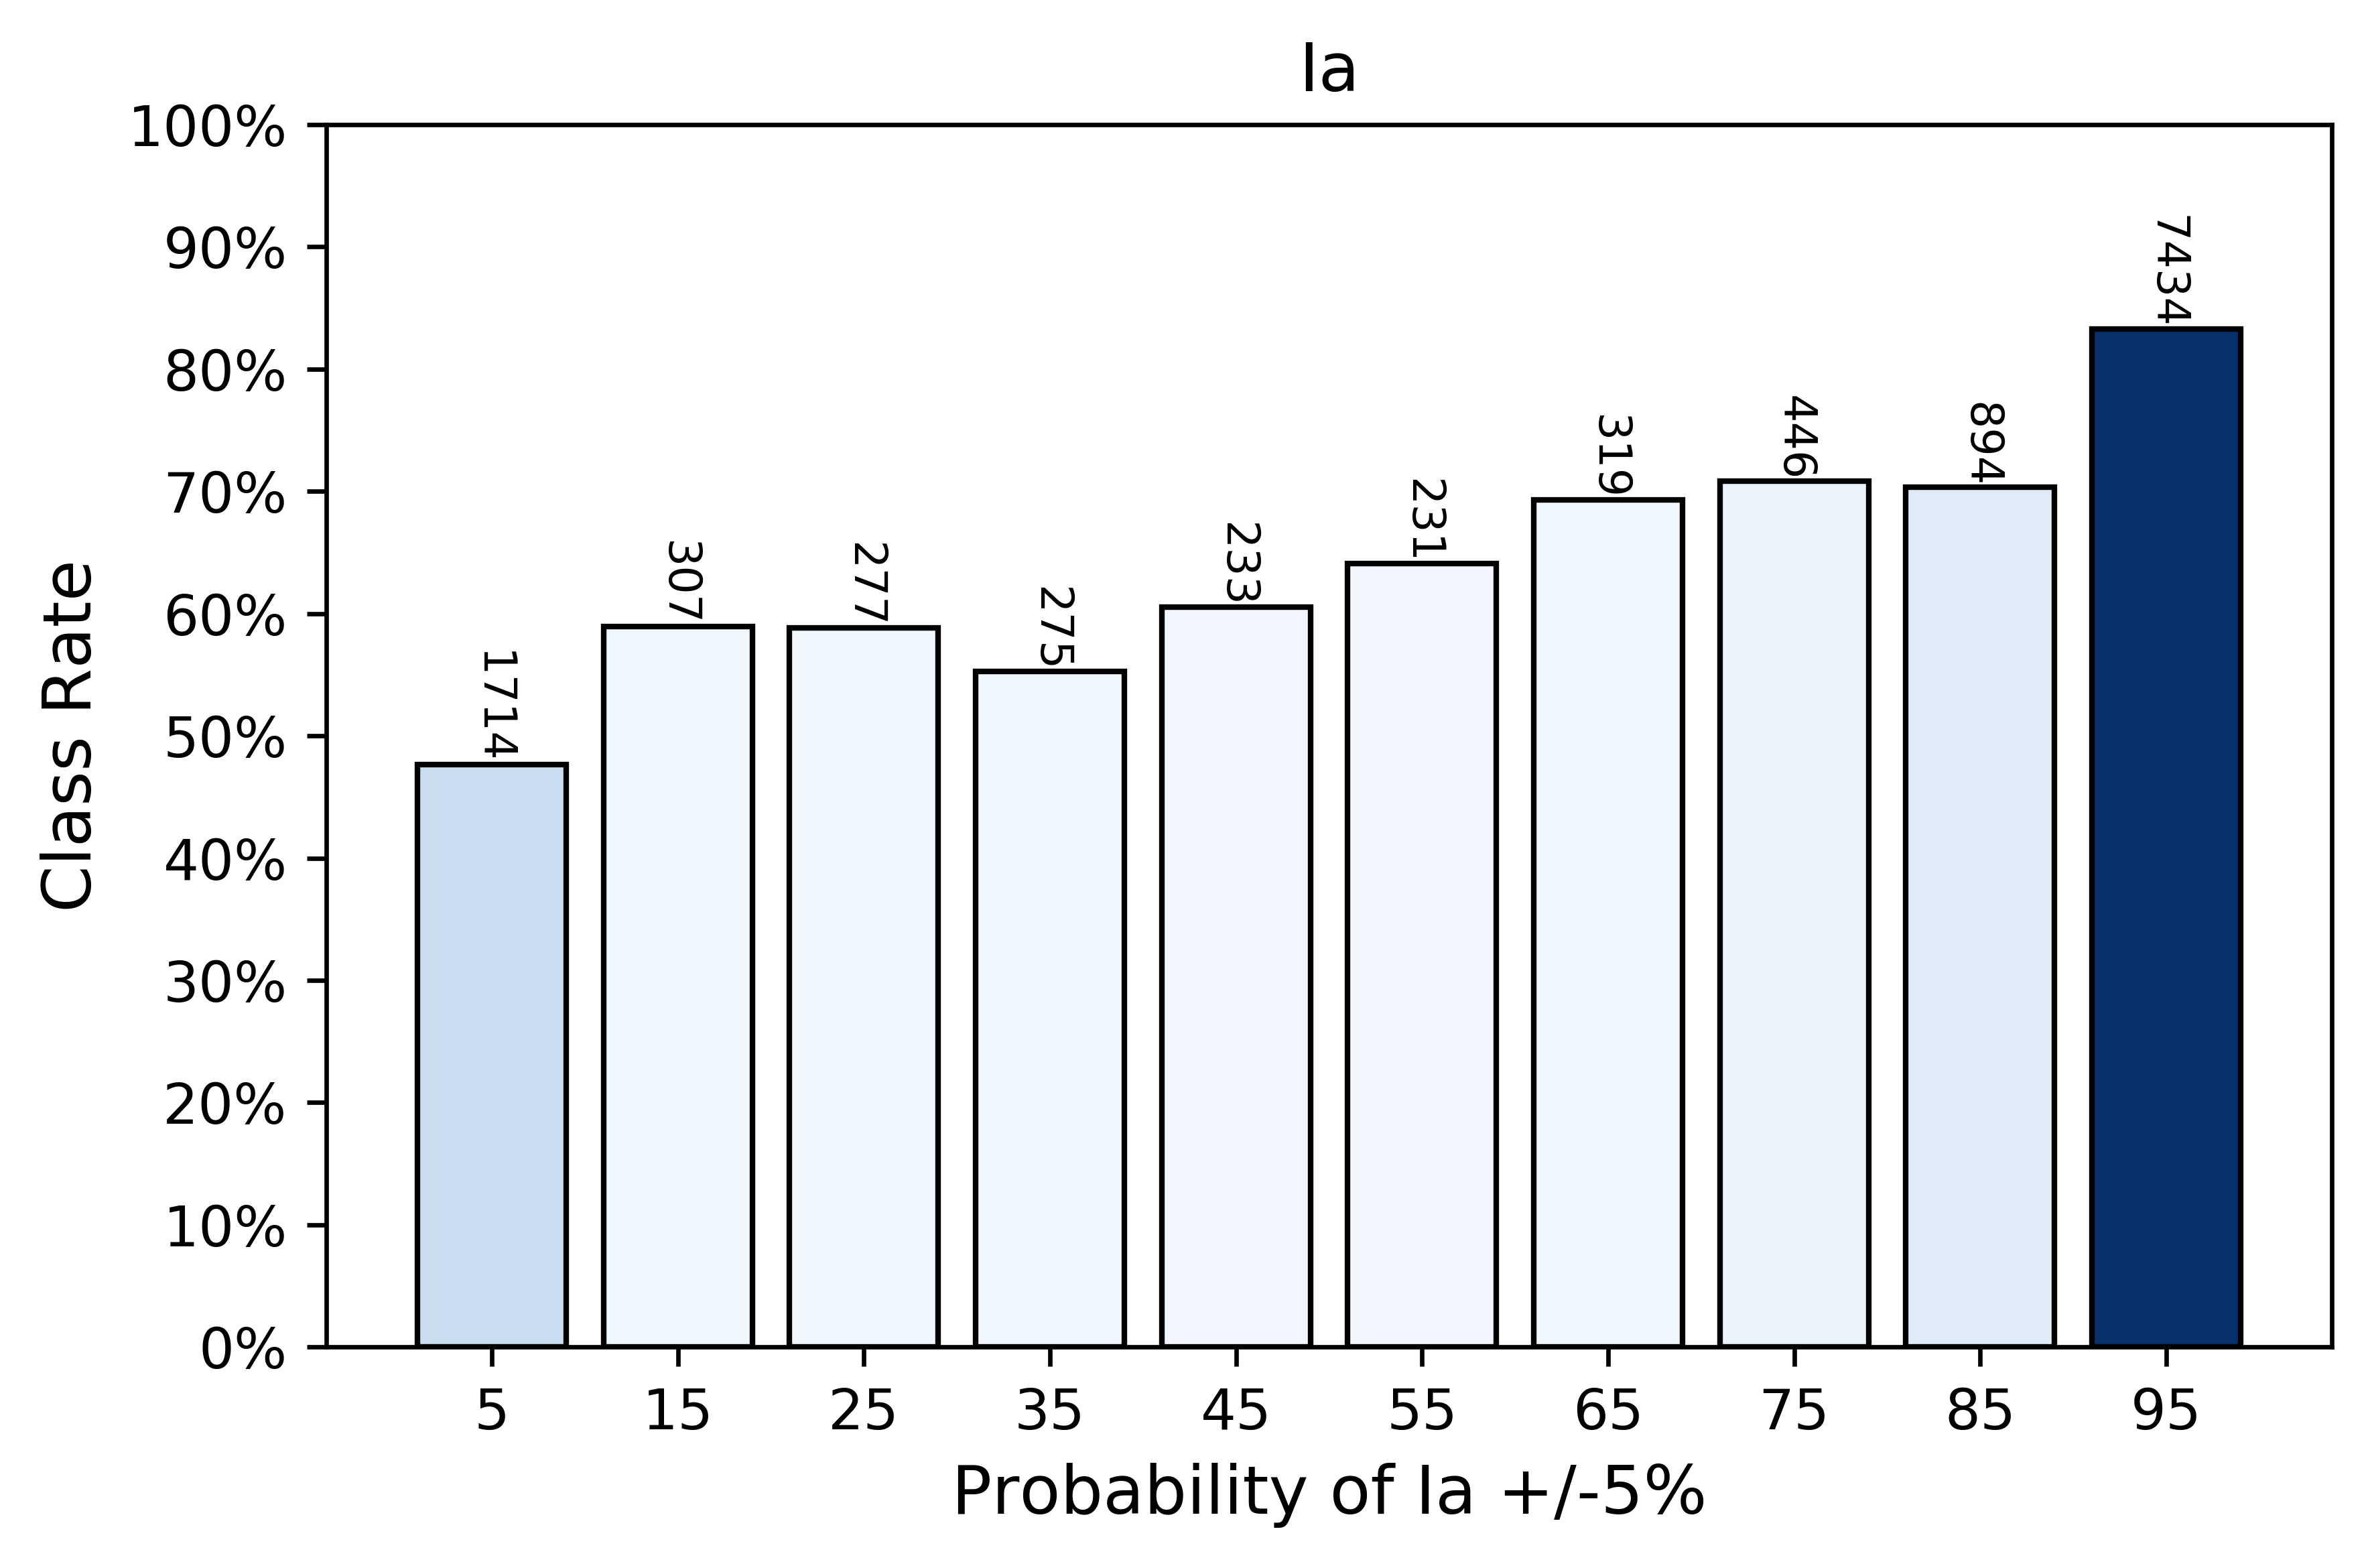

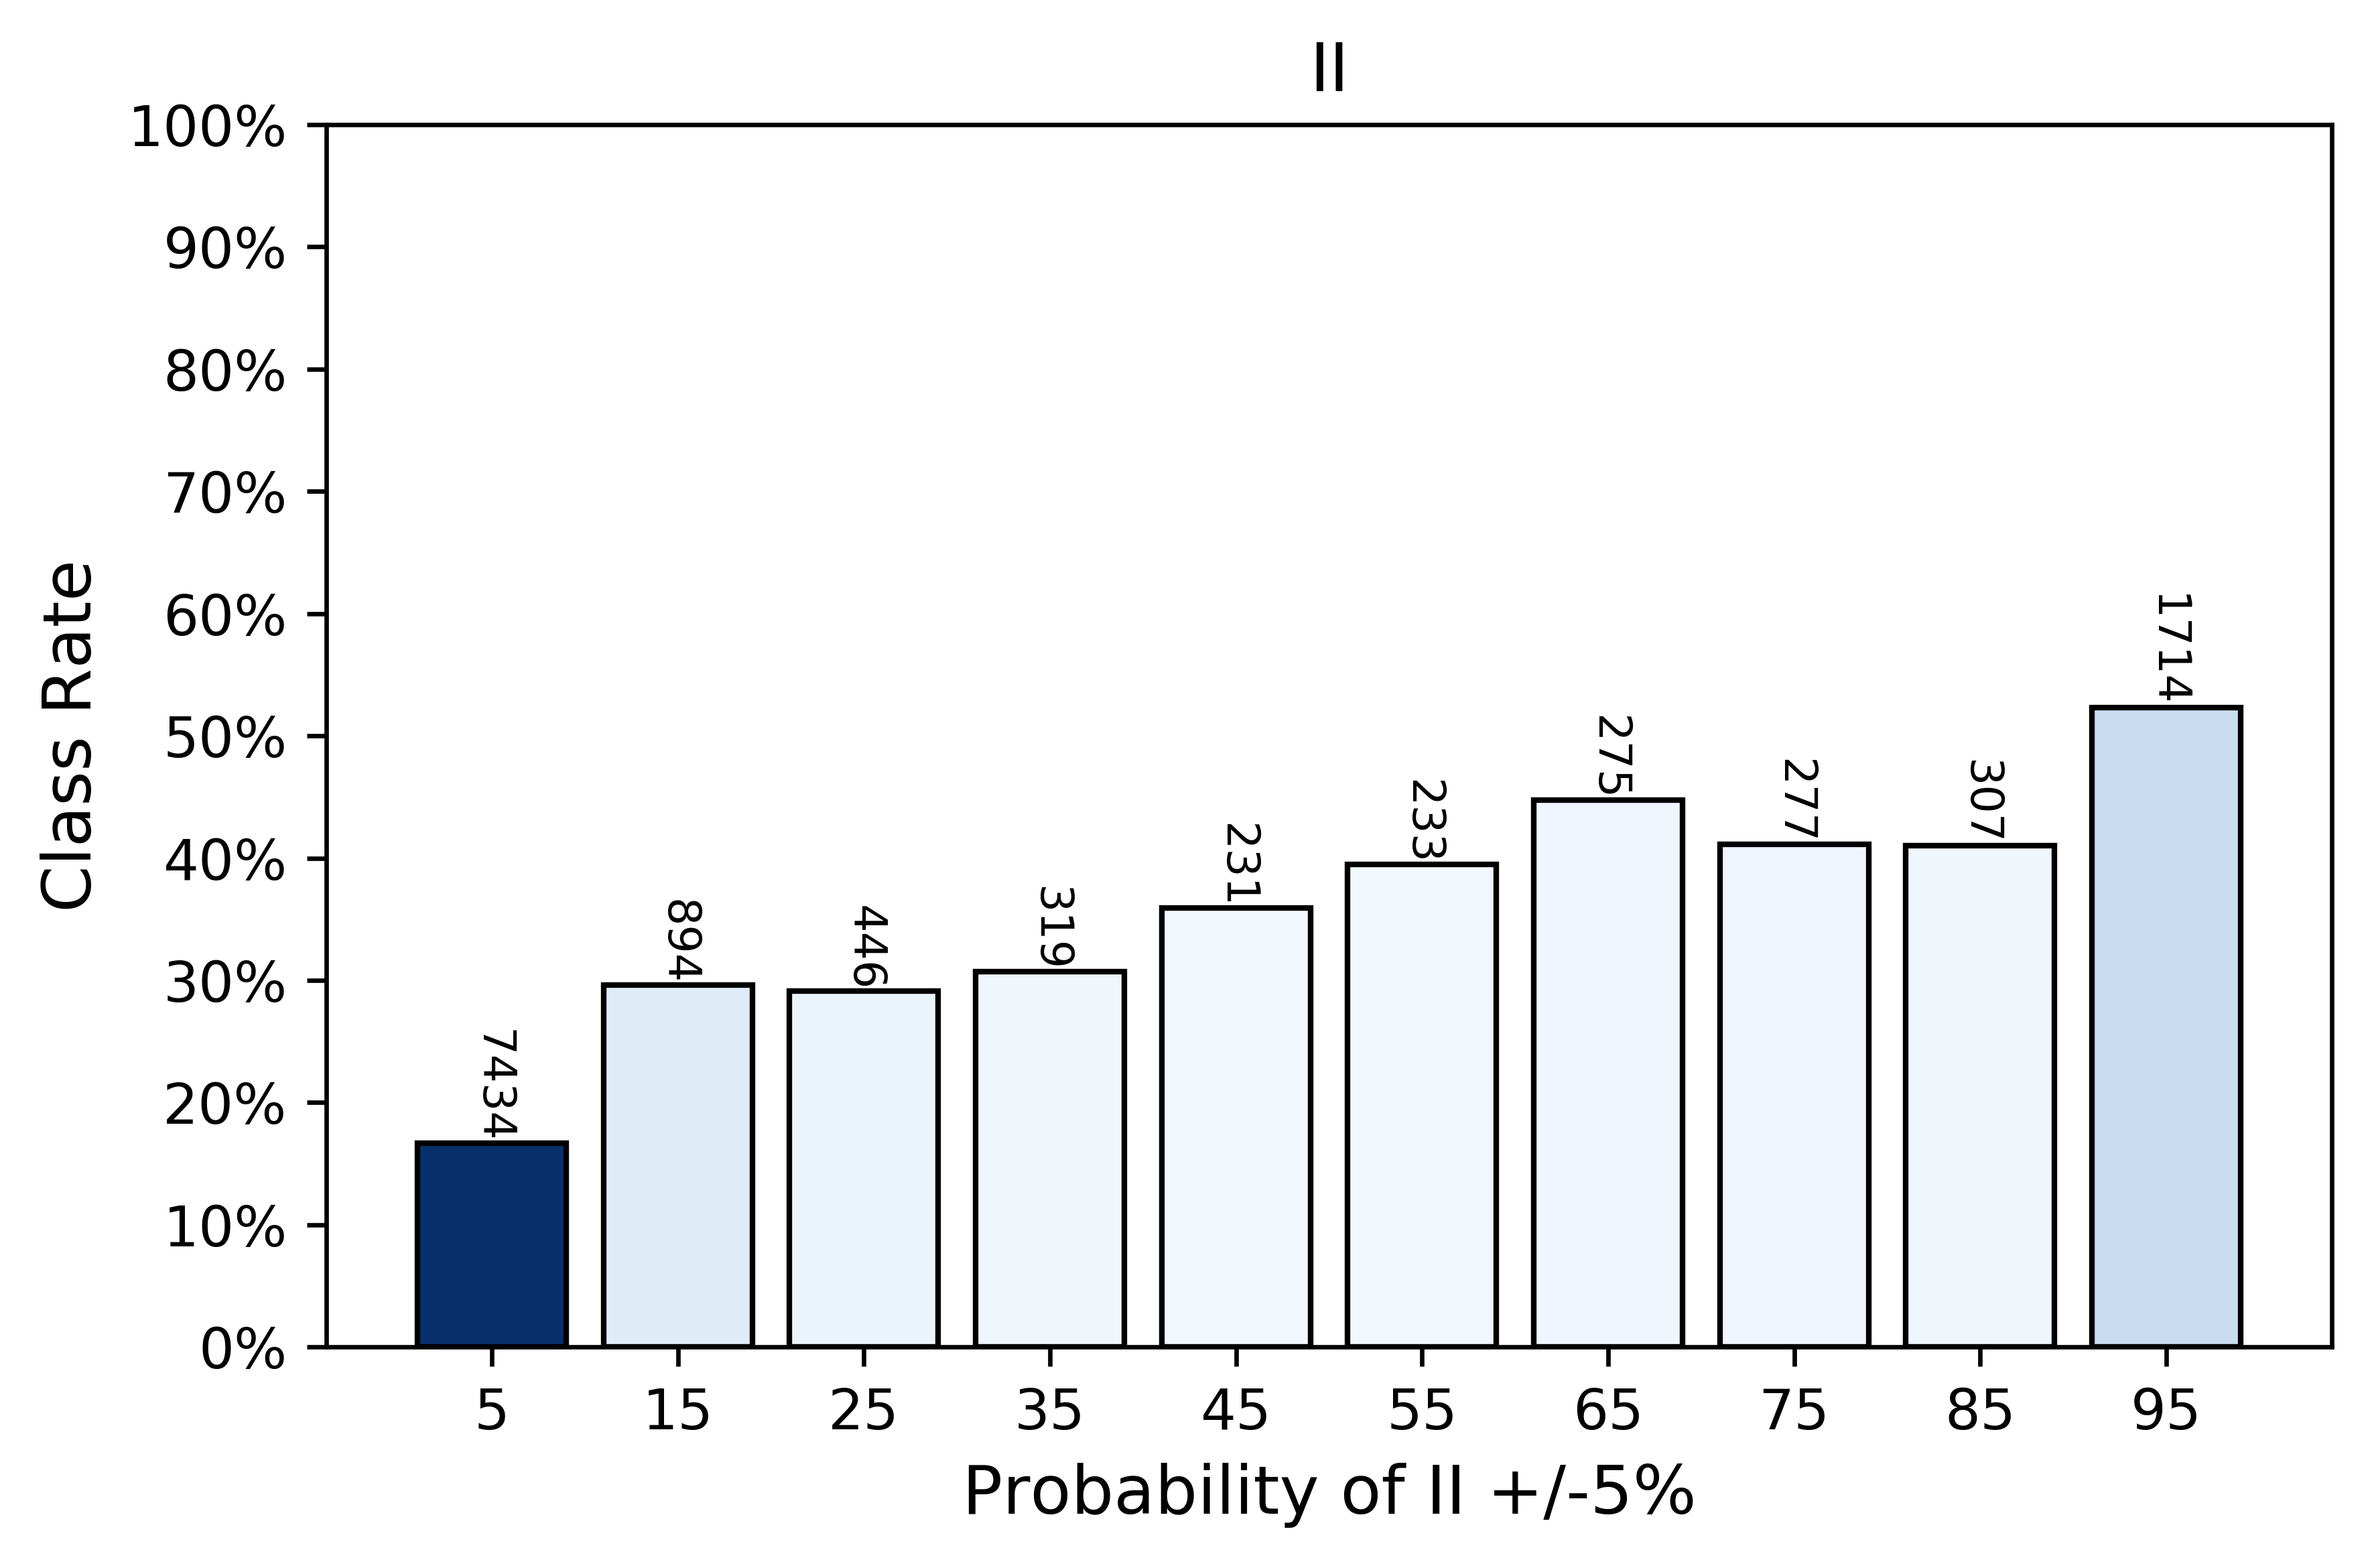

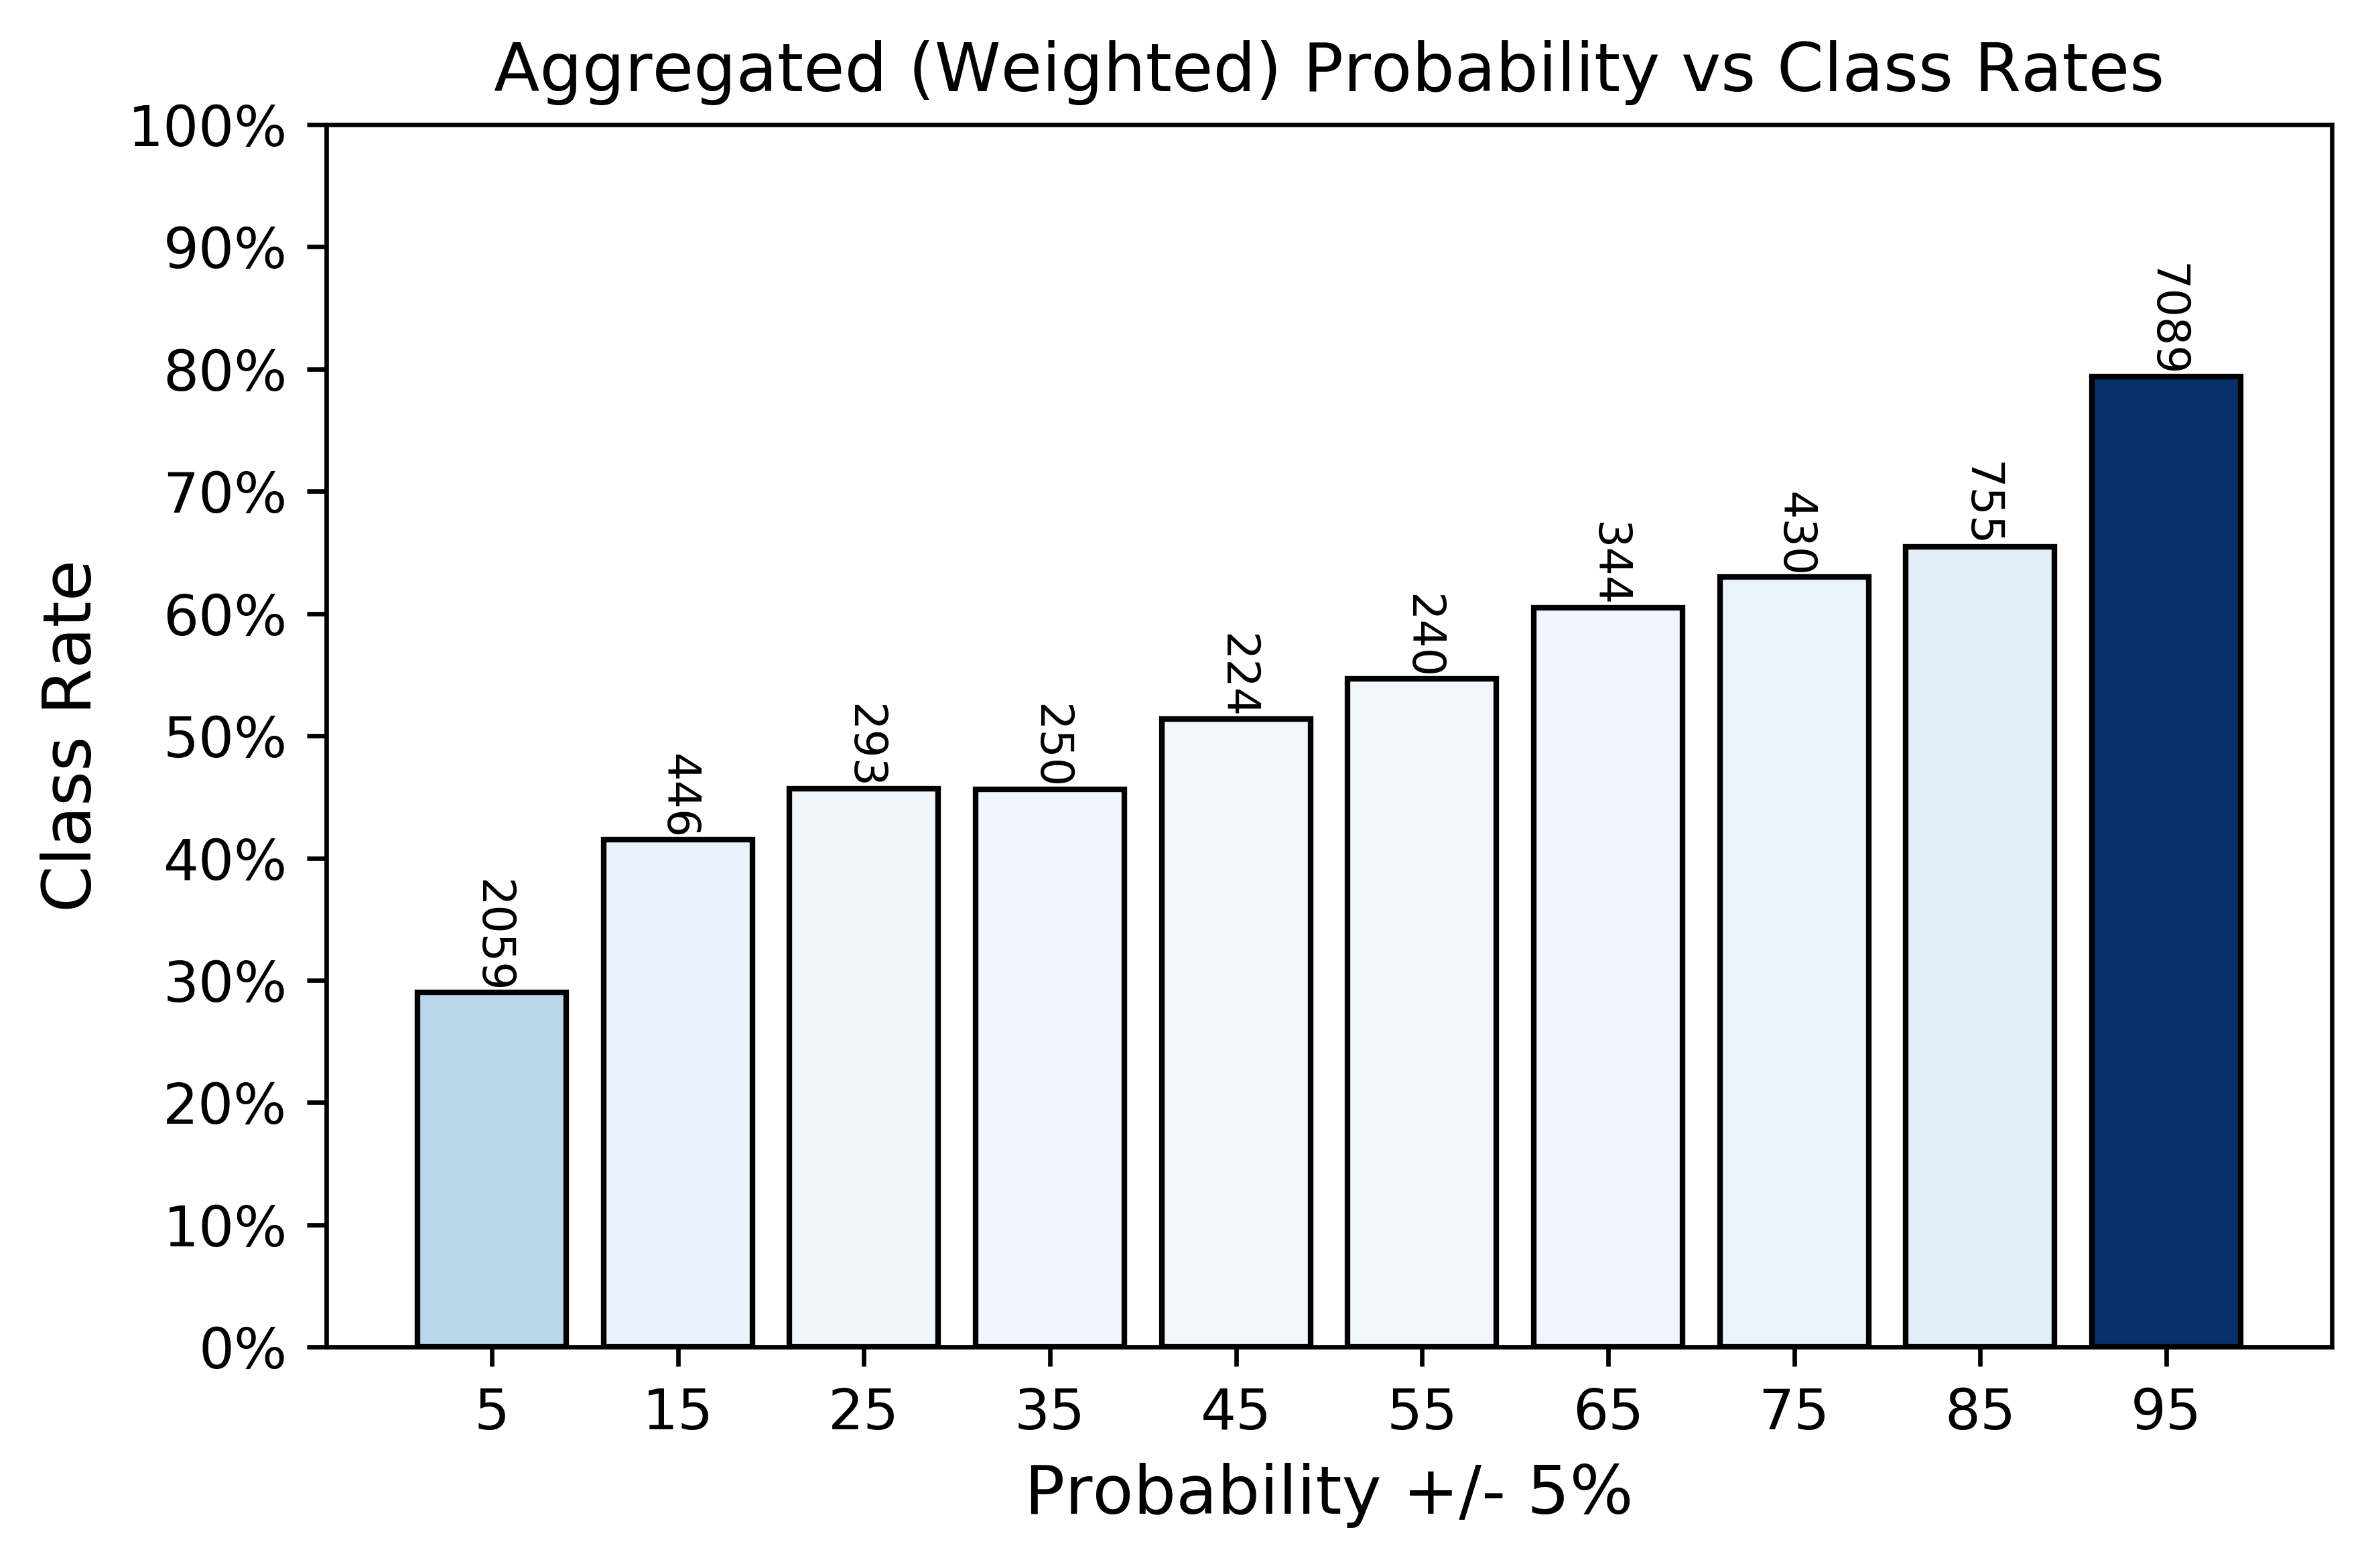

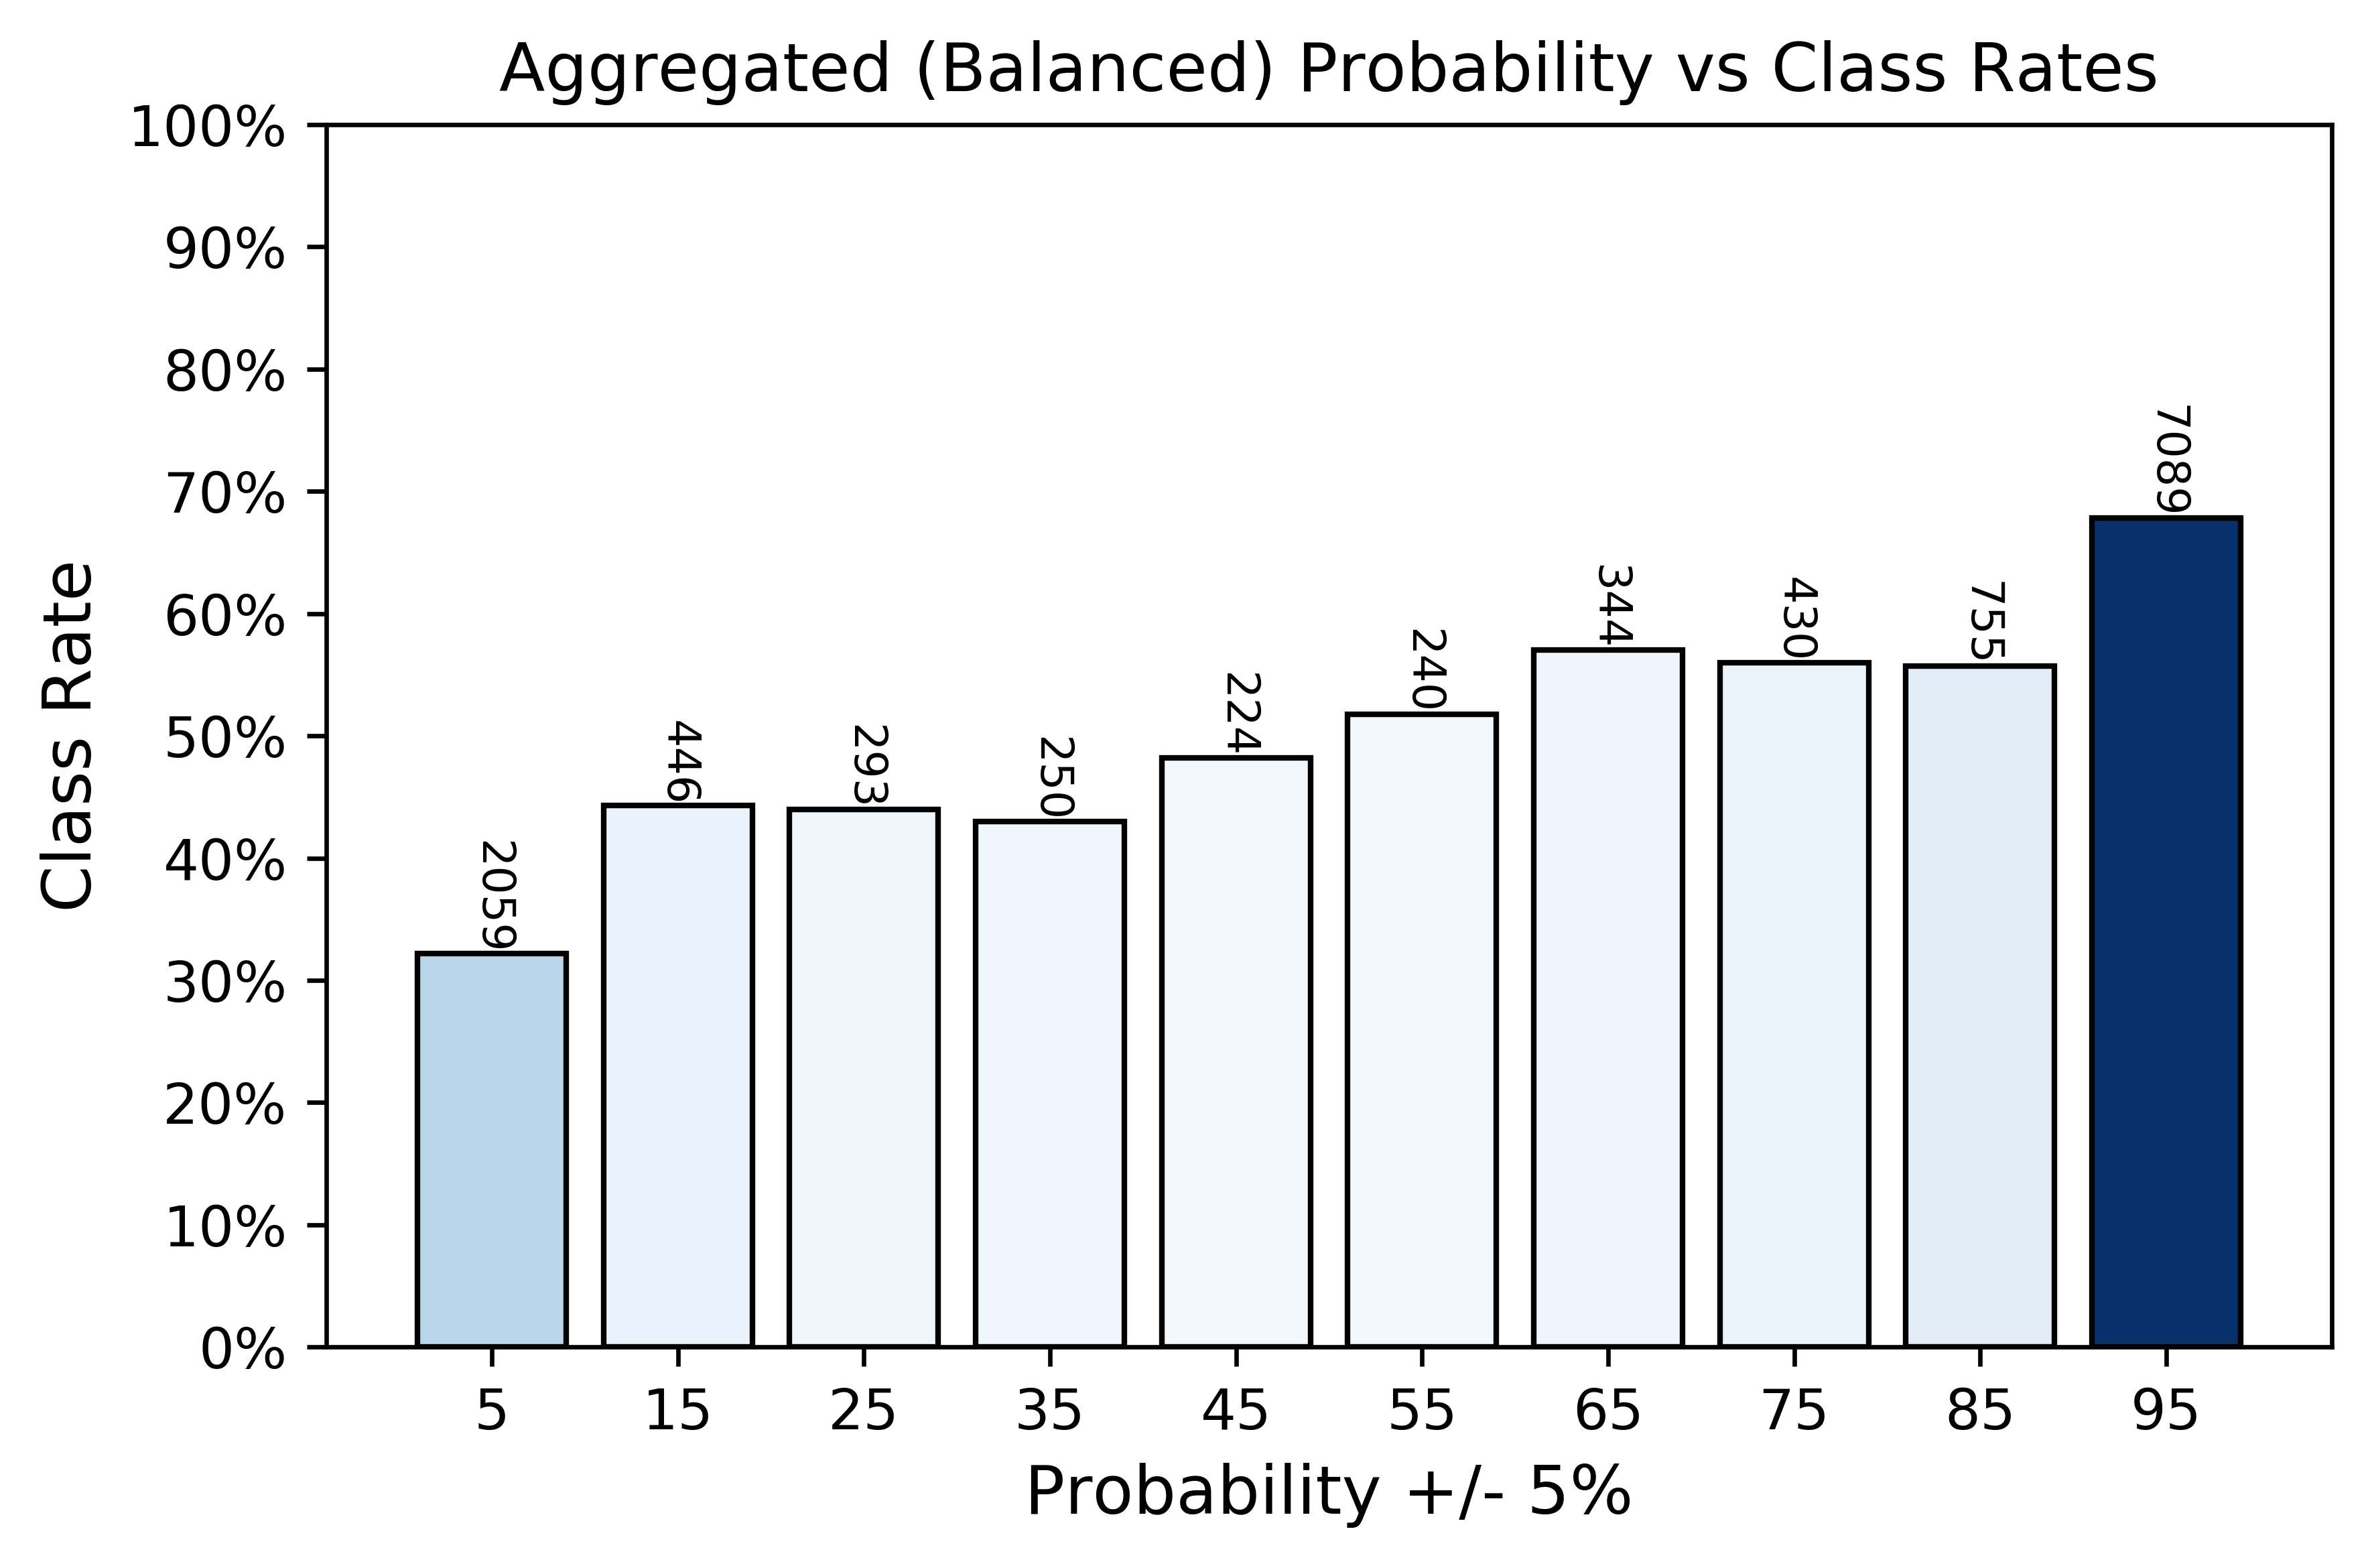

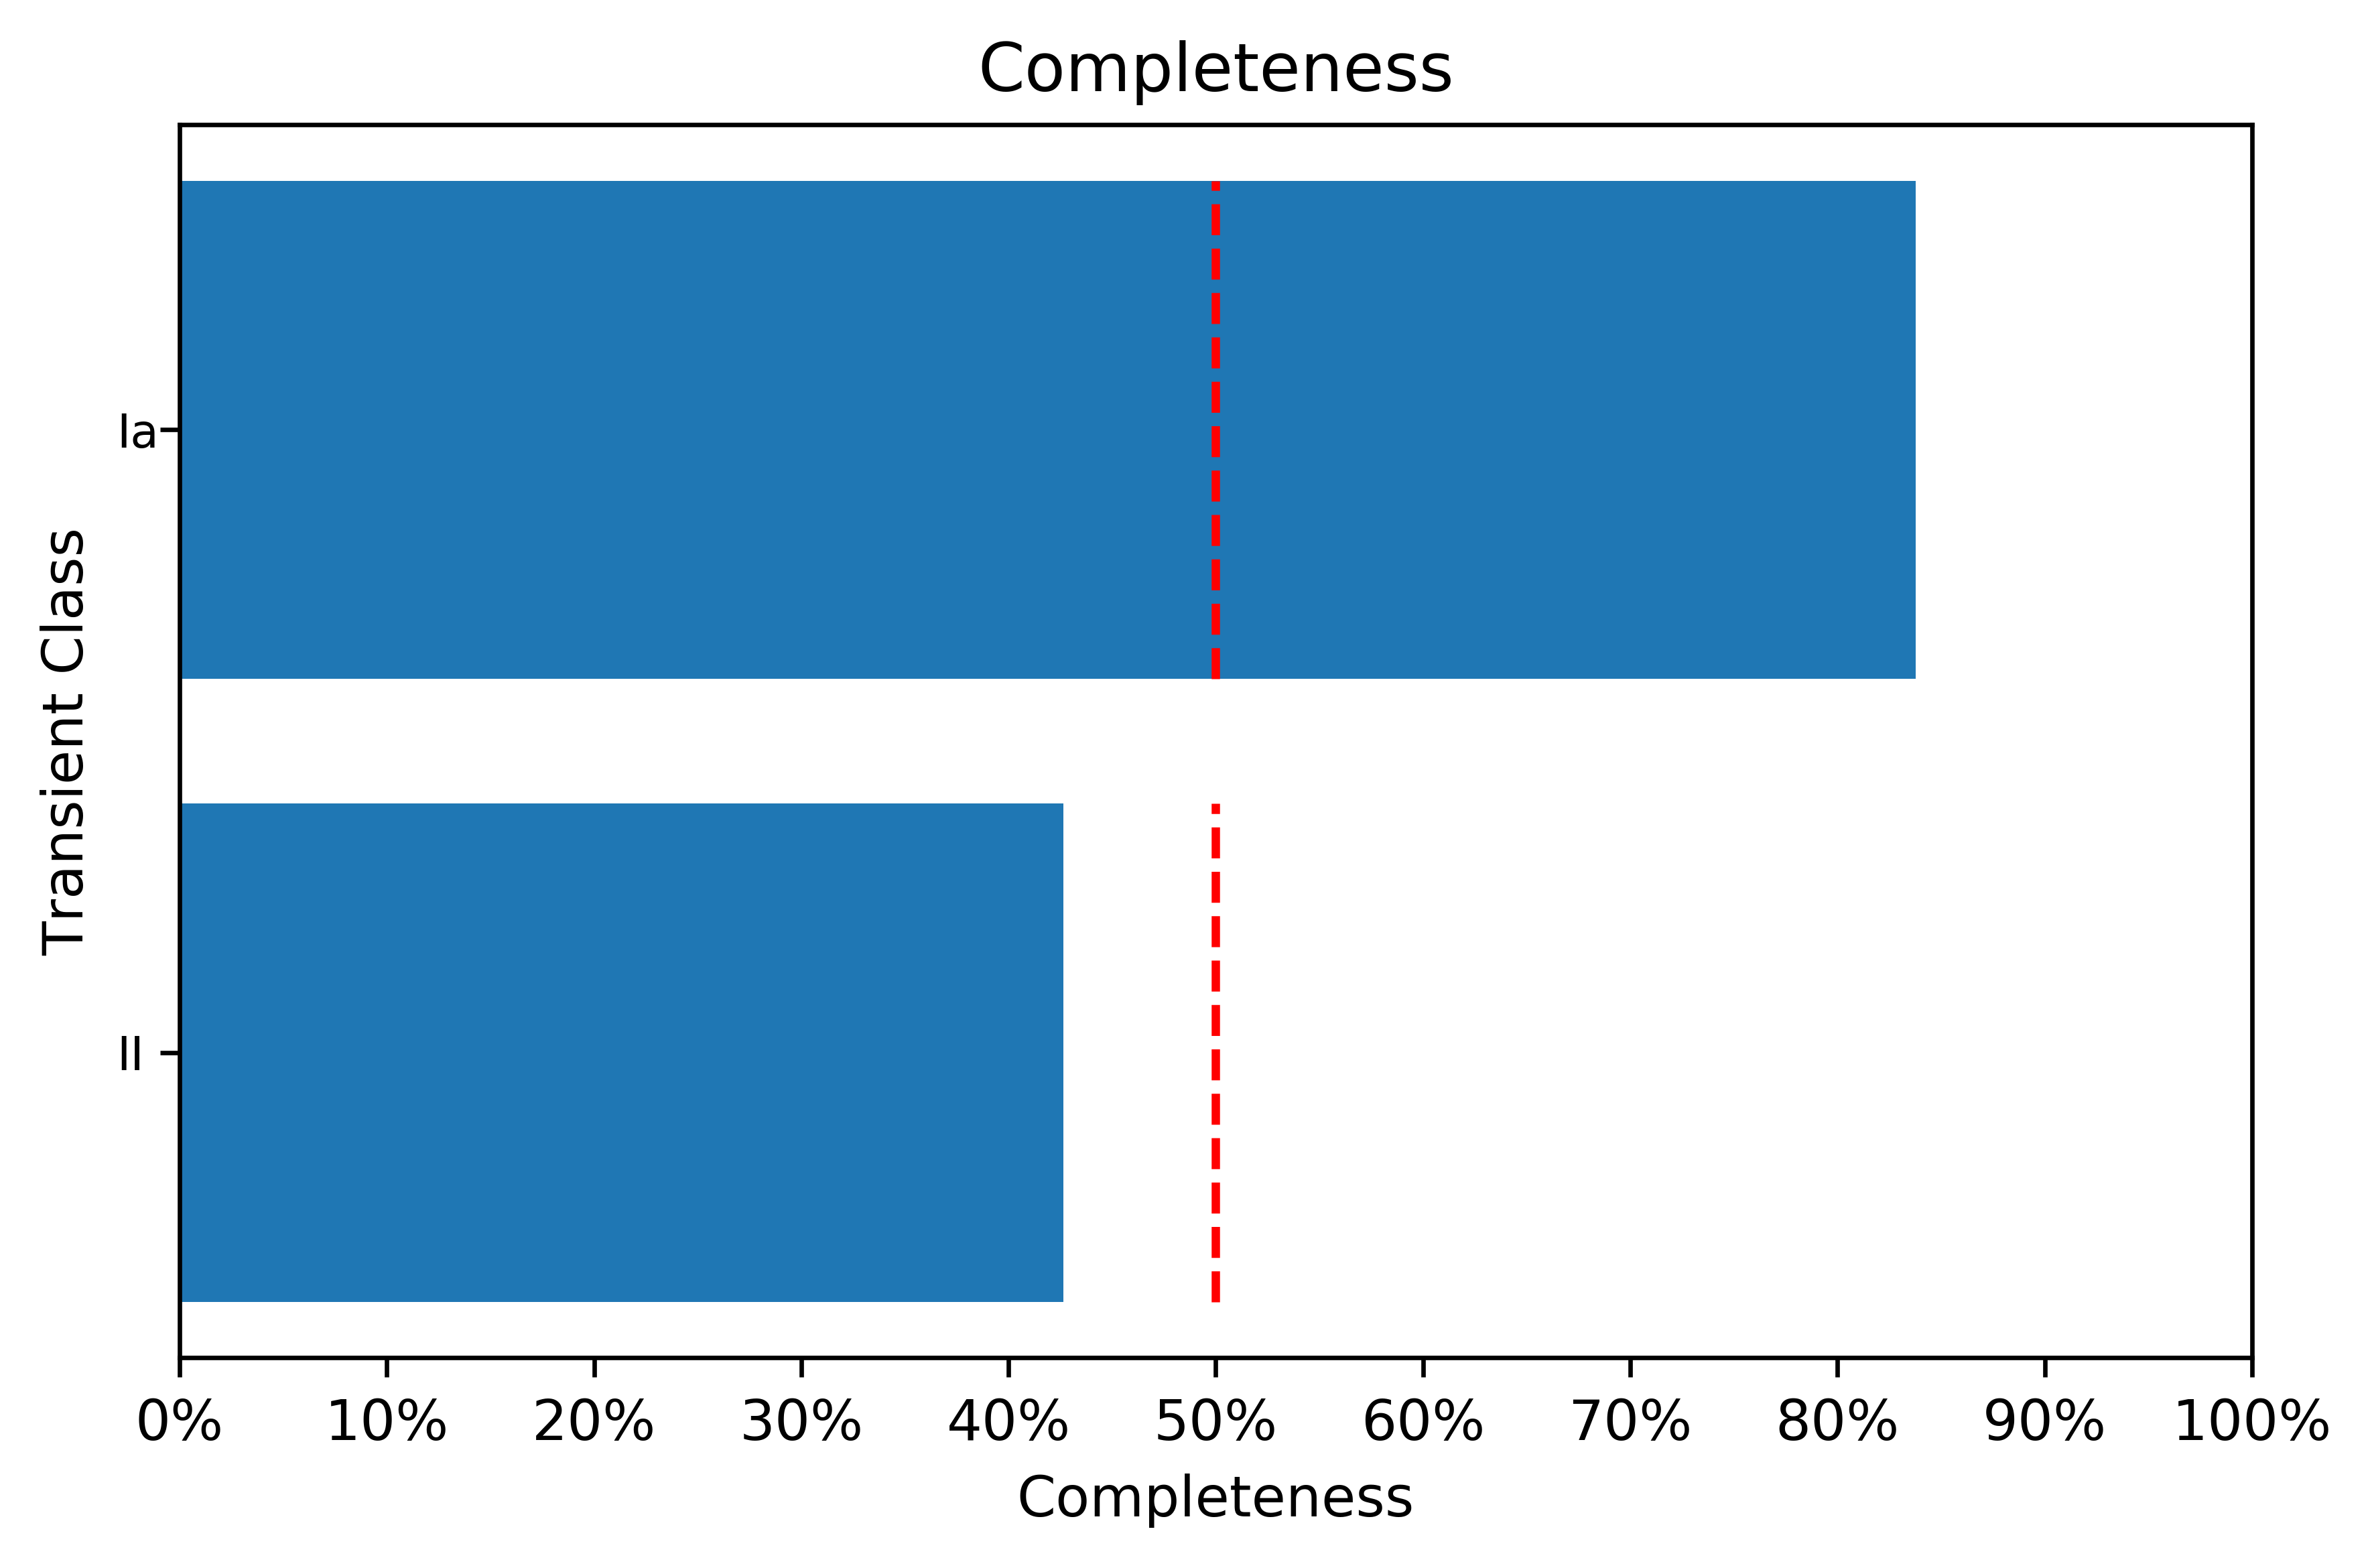

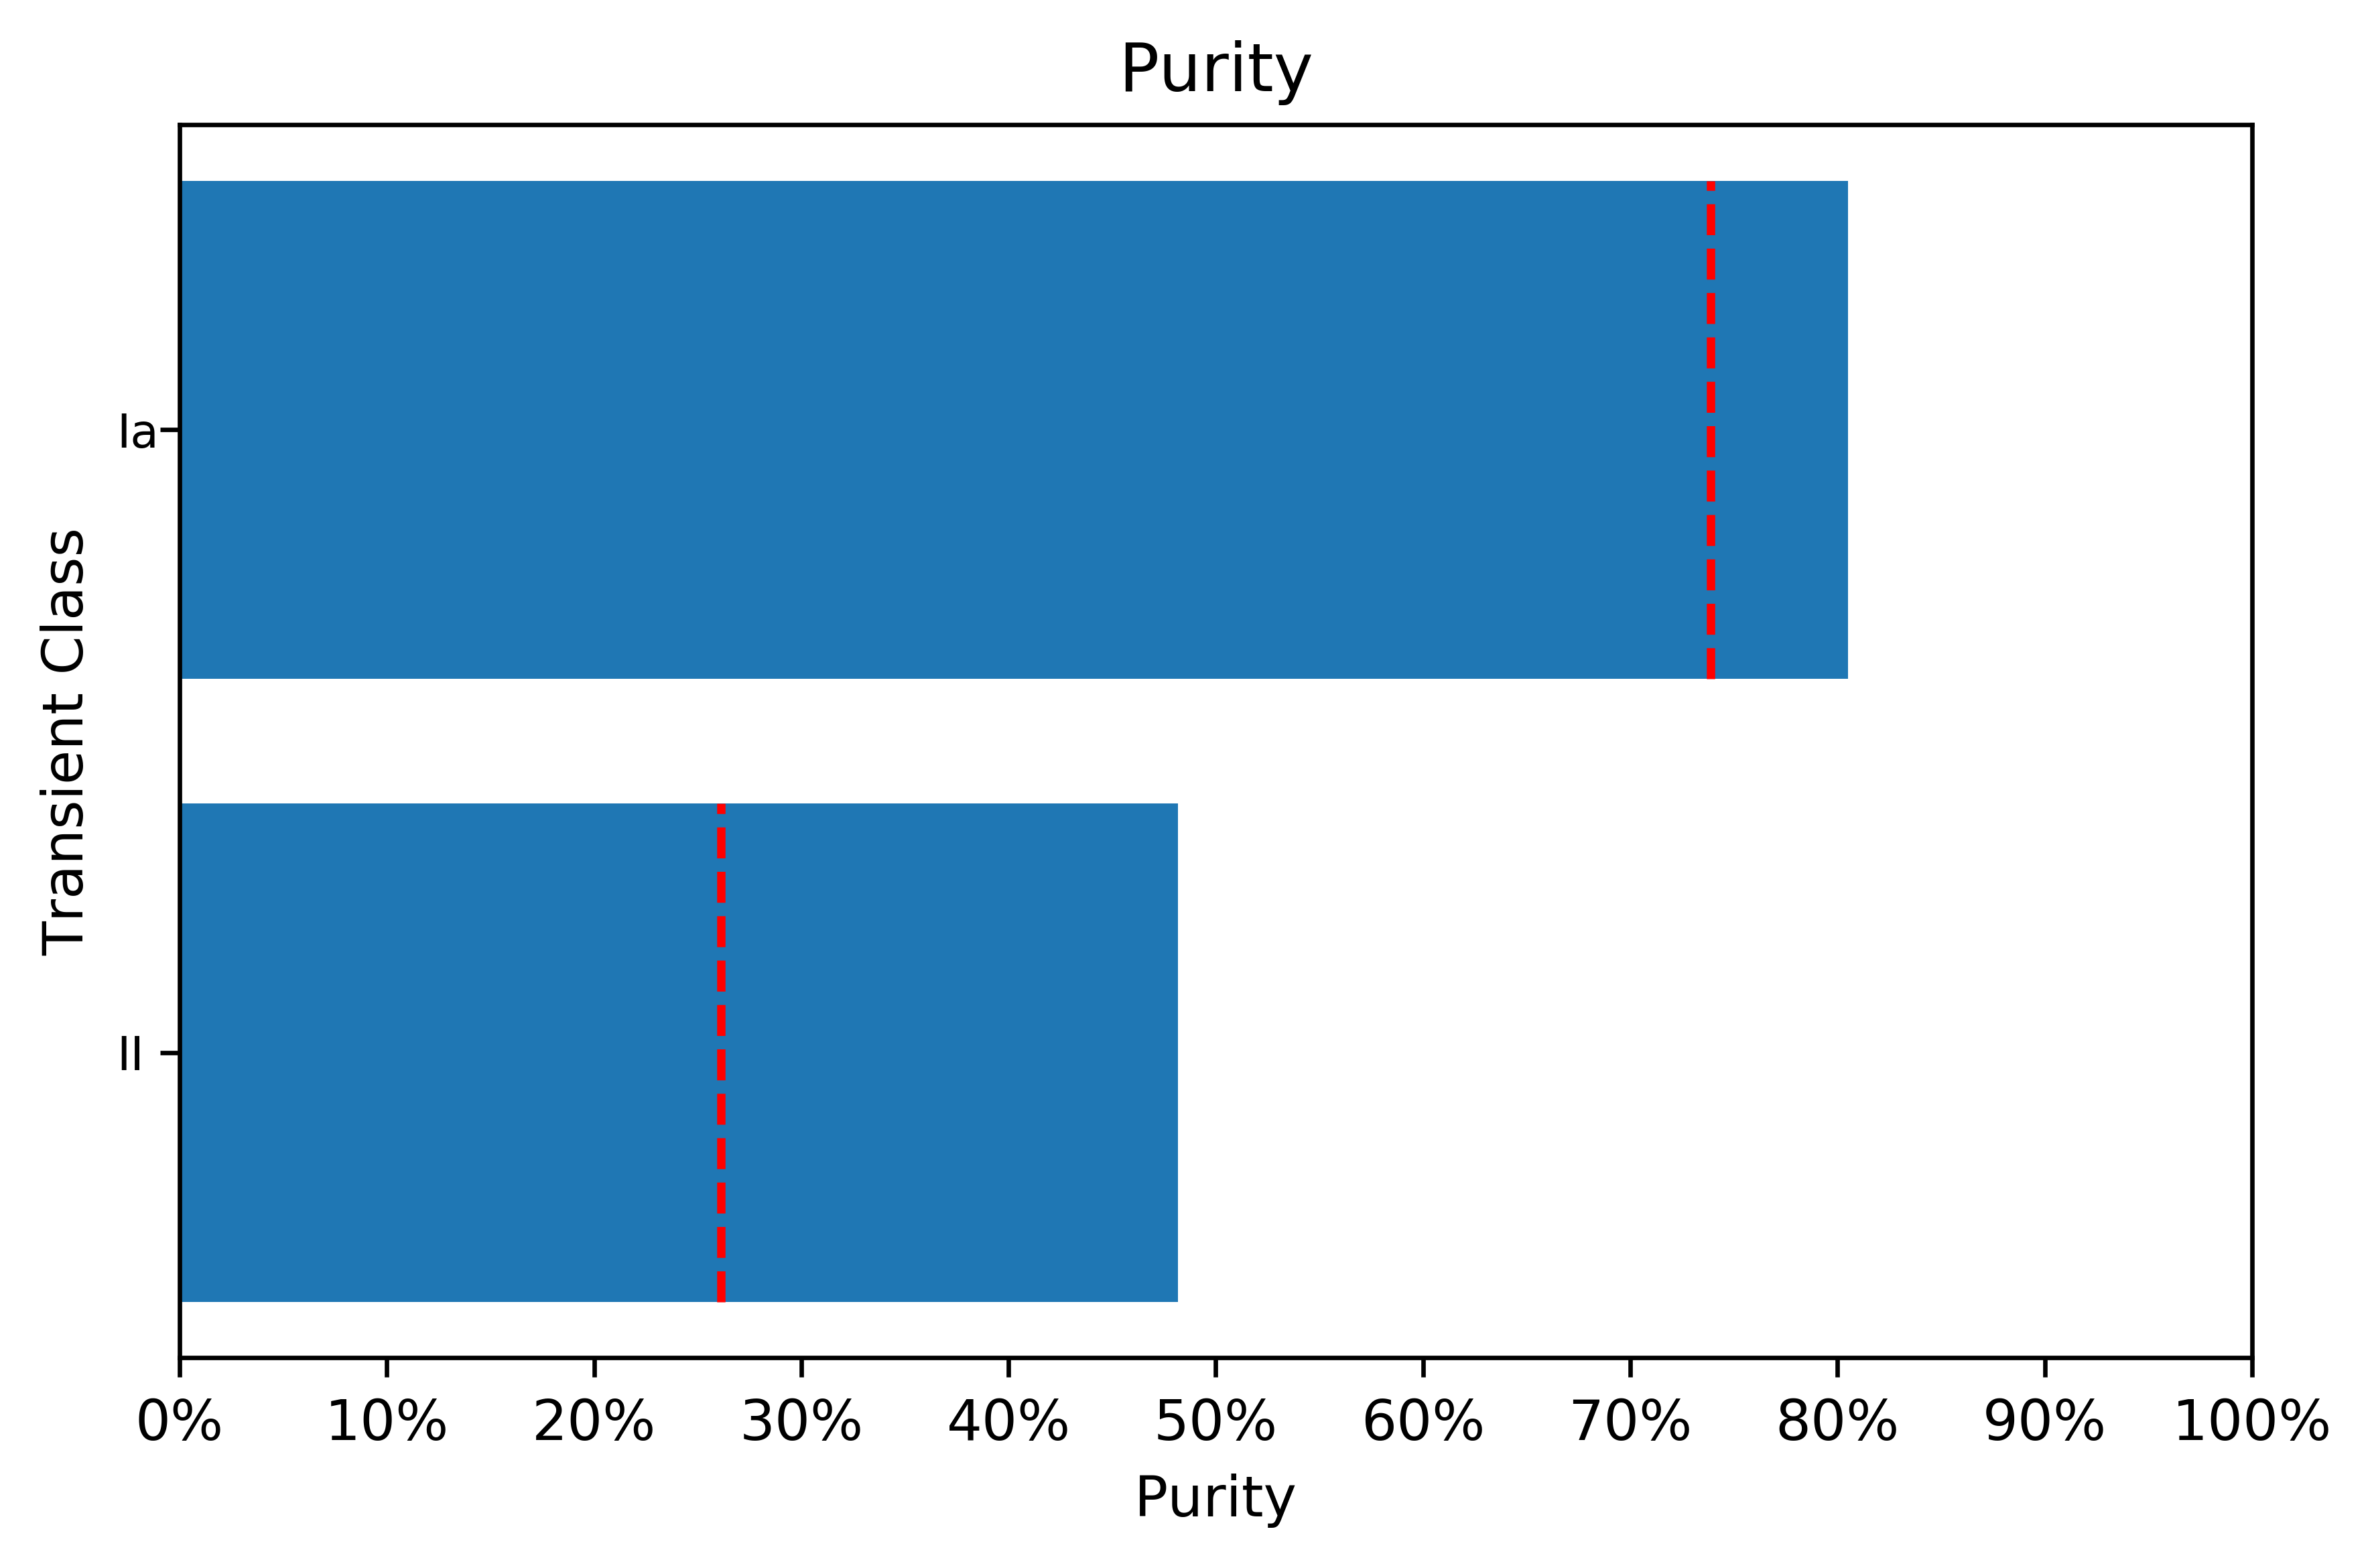

In [16]:
from models.multi_model.multi_model import MultiModel
%matplotlib inline

ordered_mags = ["g_mag", "r_mag", "i_mag", "z_mag", "y_mag",
        "W1_mag", "W2_mag", "H_mag", "K_mag", 'J_mag',
       "redshift"]
model = MultiModel(cols = ordered_mags, 
           class_labels = ['Ia', 'II'],
           transform_features = False,
           folds=20,
           min_class_size = 40
          )
get_test_results(model, X_test_LSST_like[list(model.X)], y_test_LSST_like)

Evaluate on original sampled data

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWar

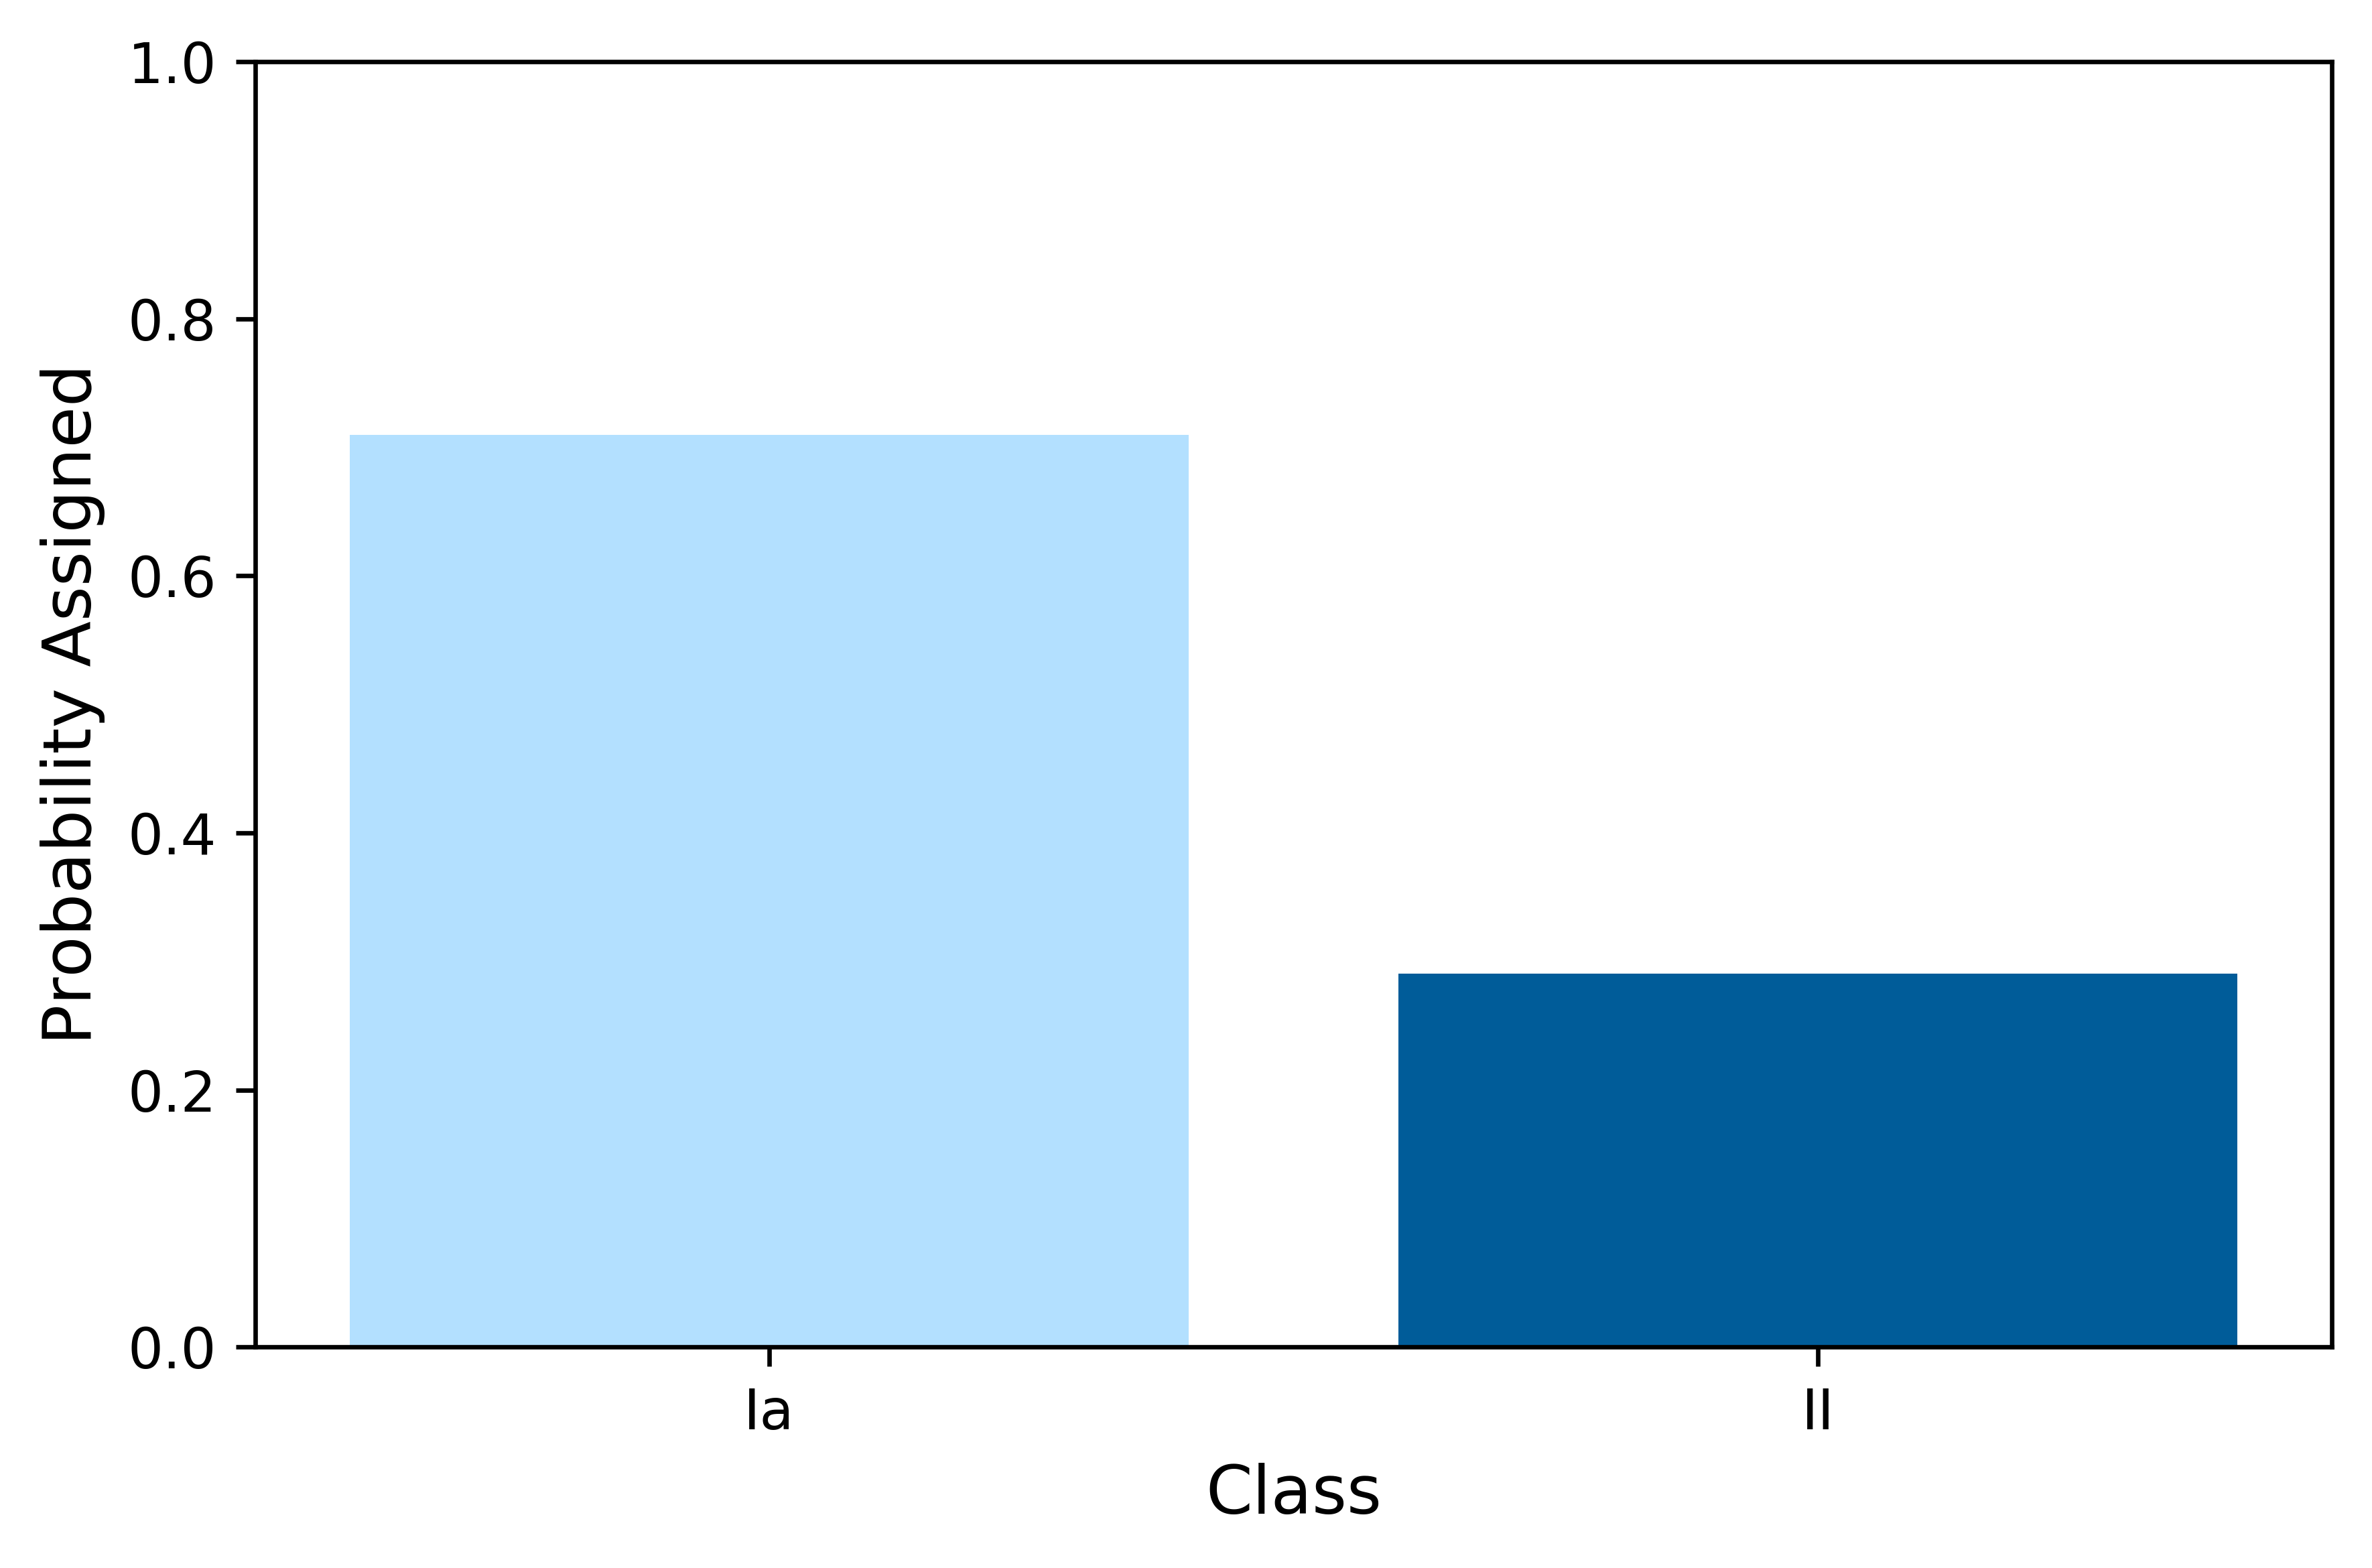

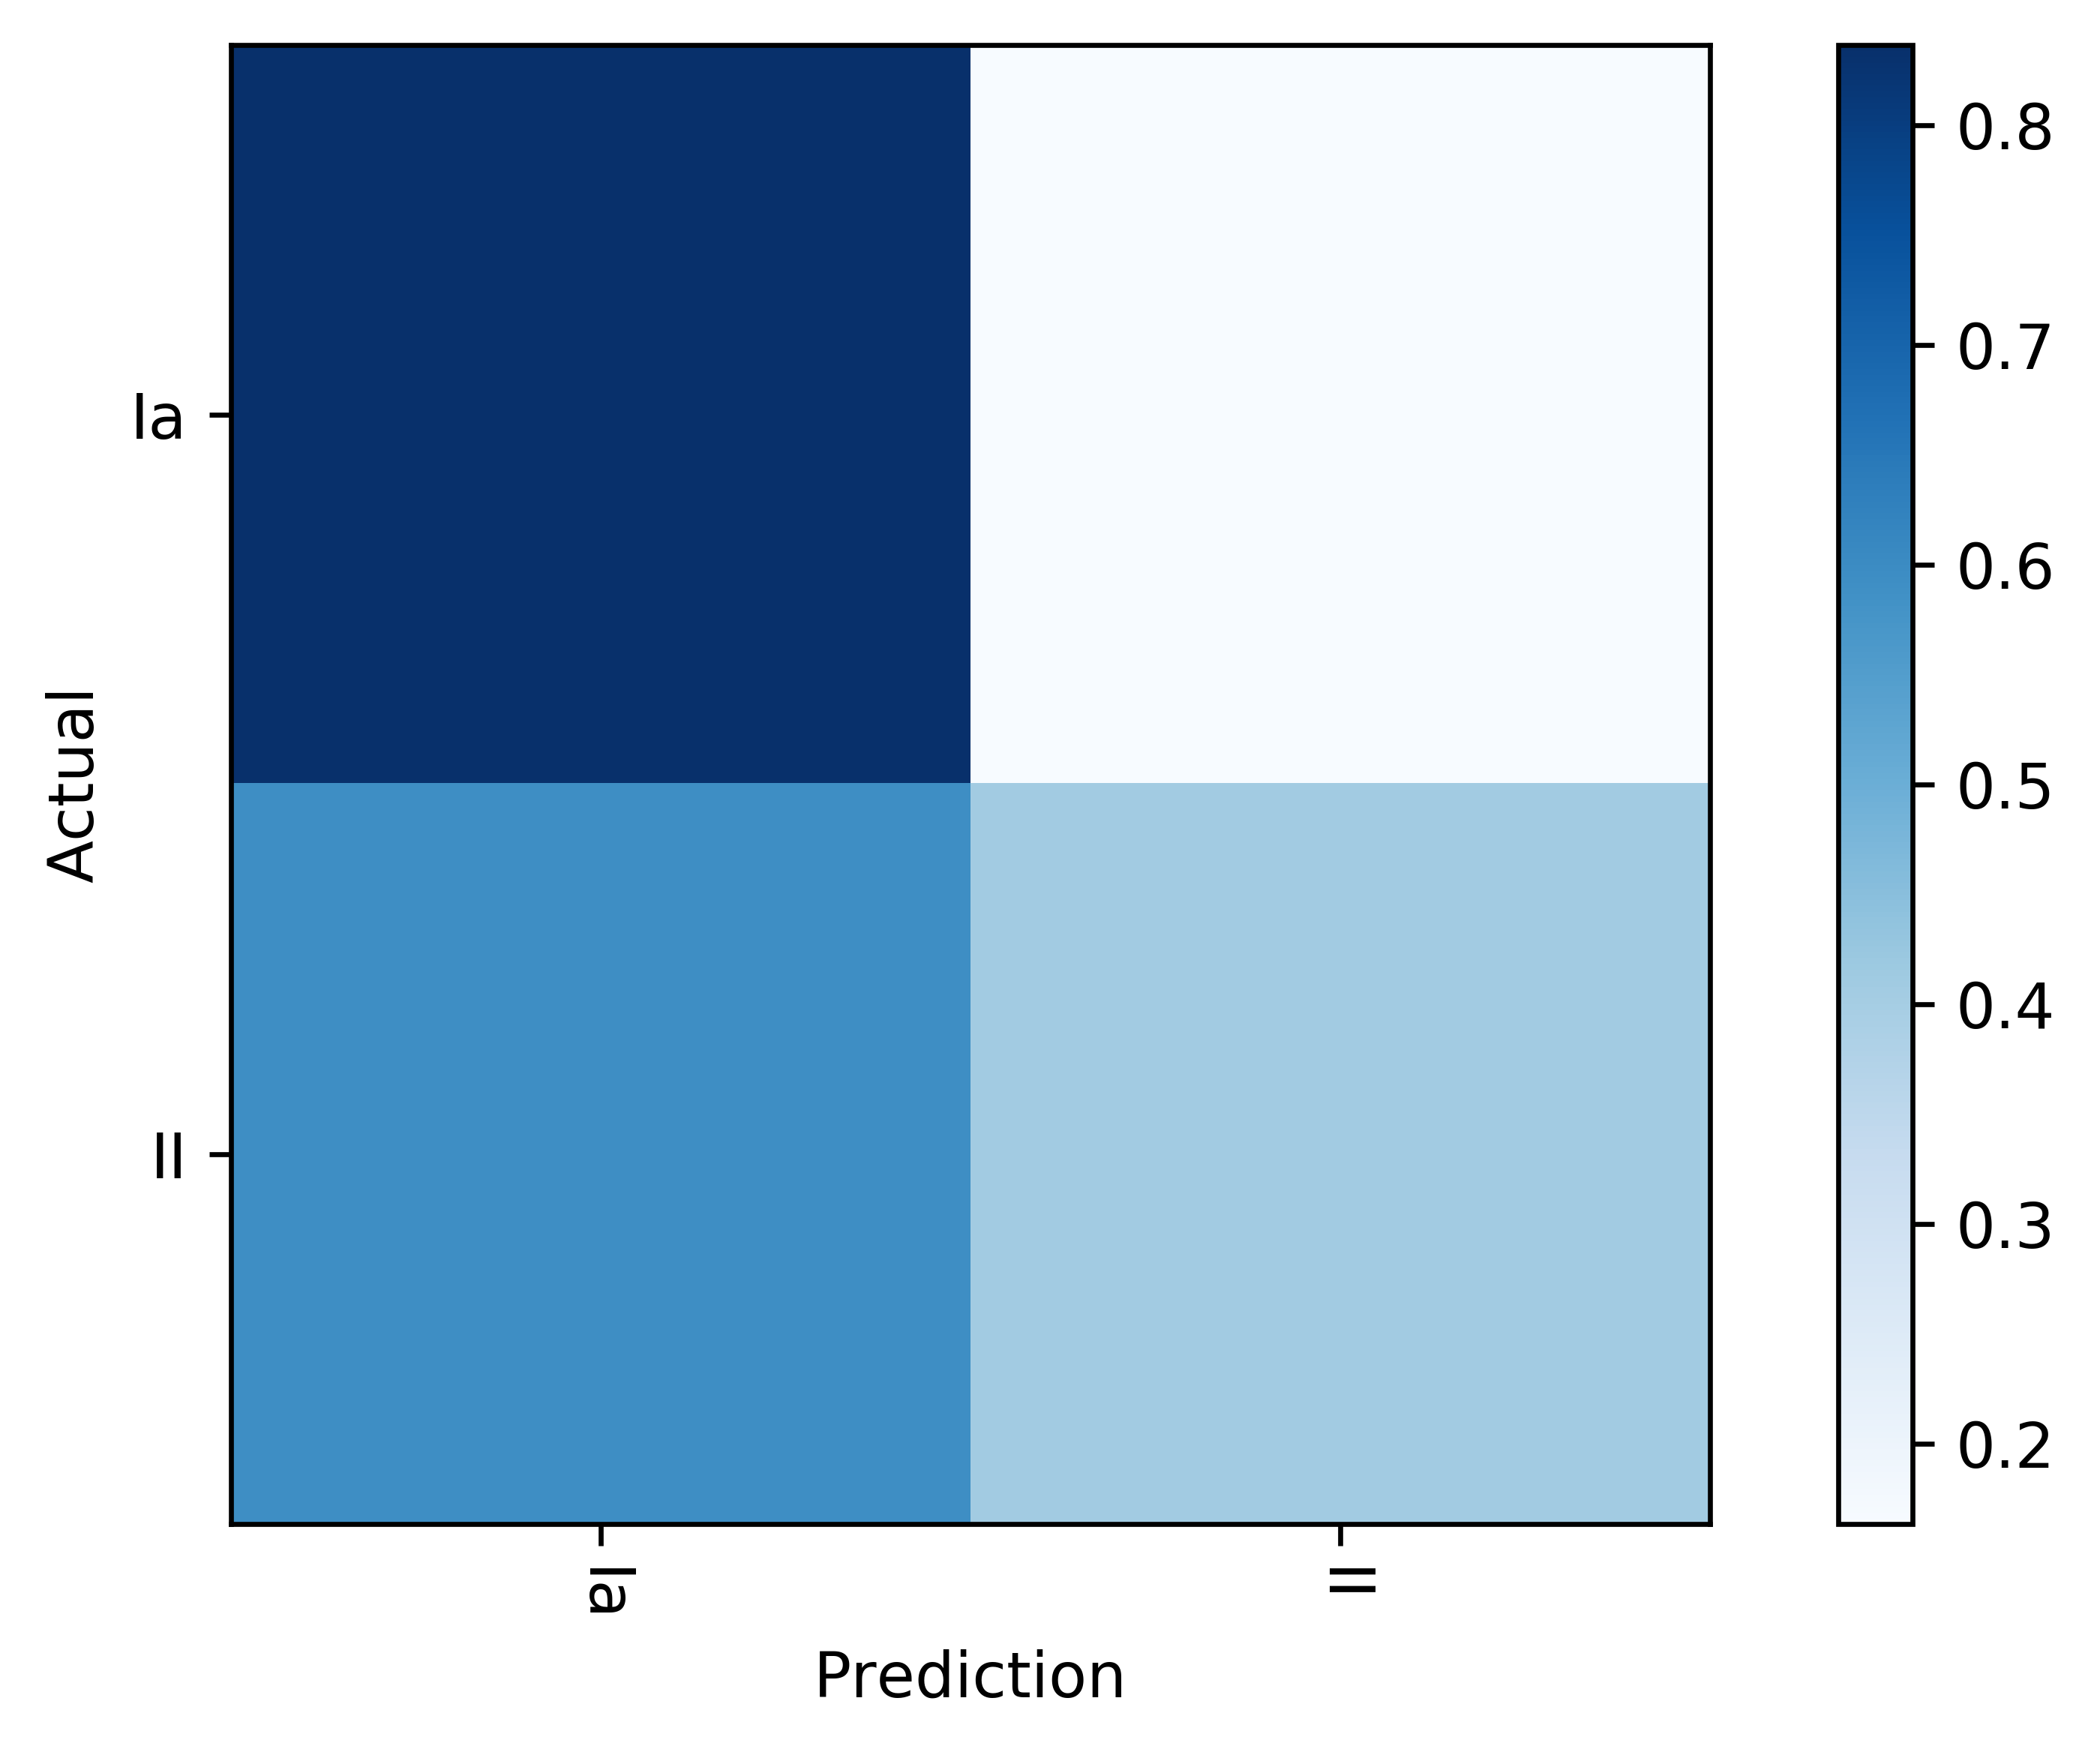

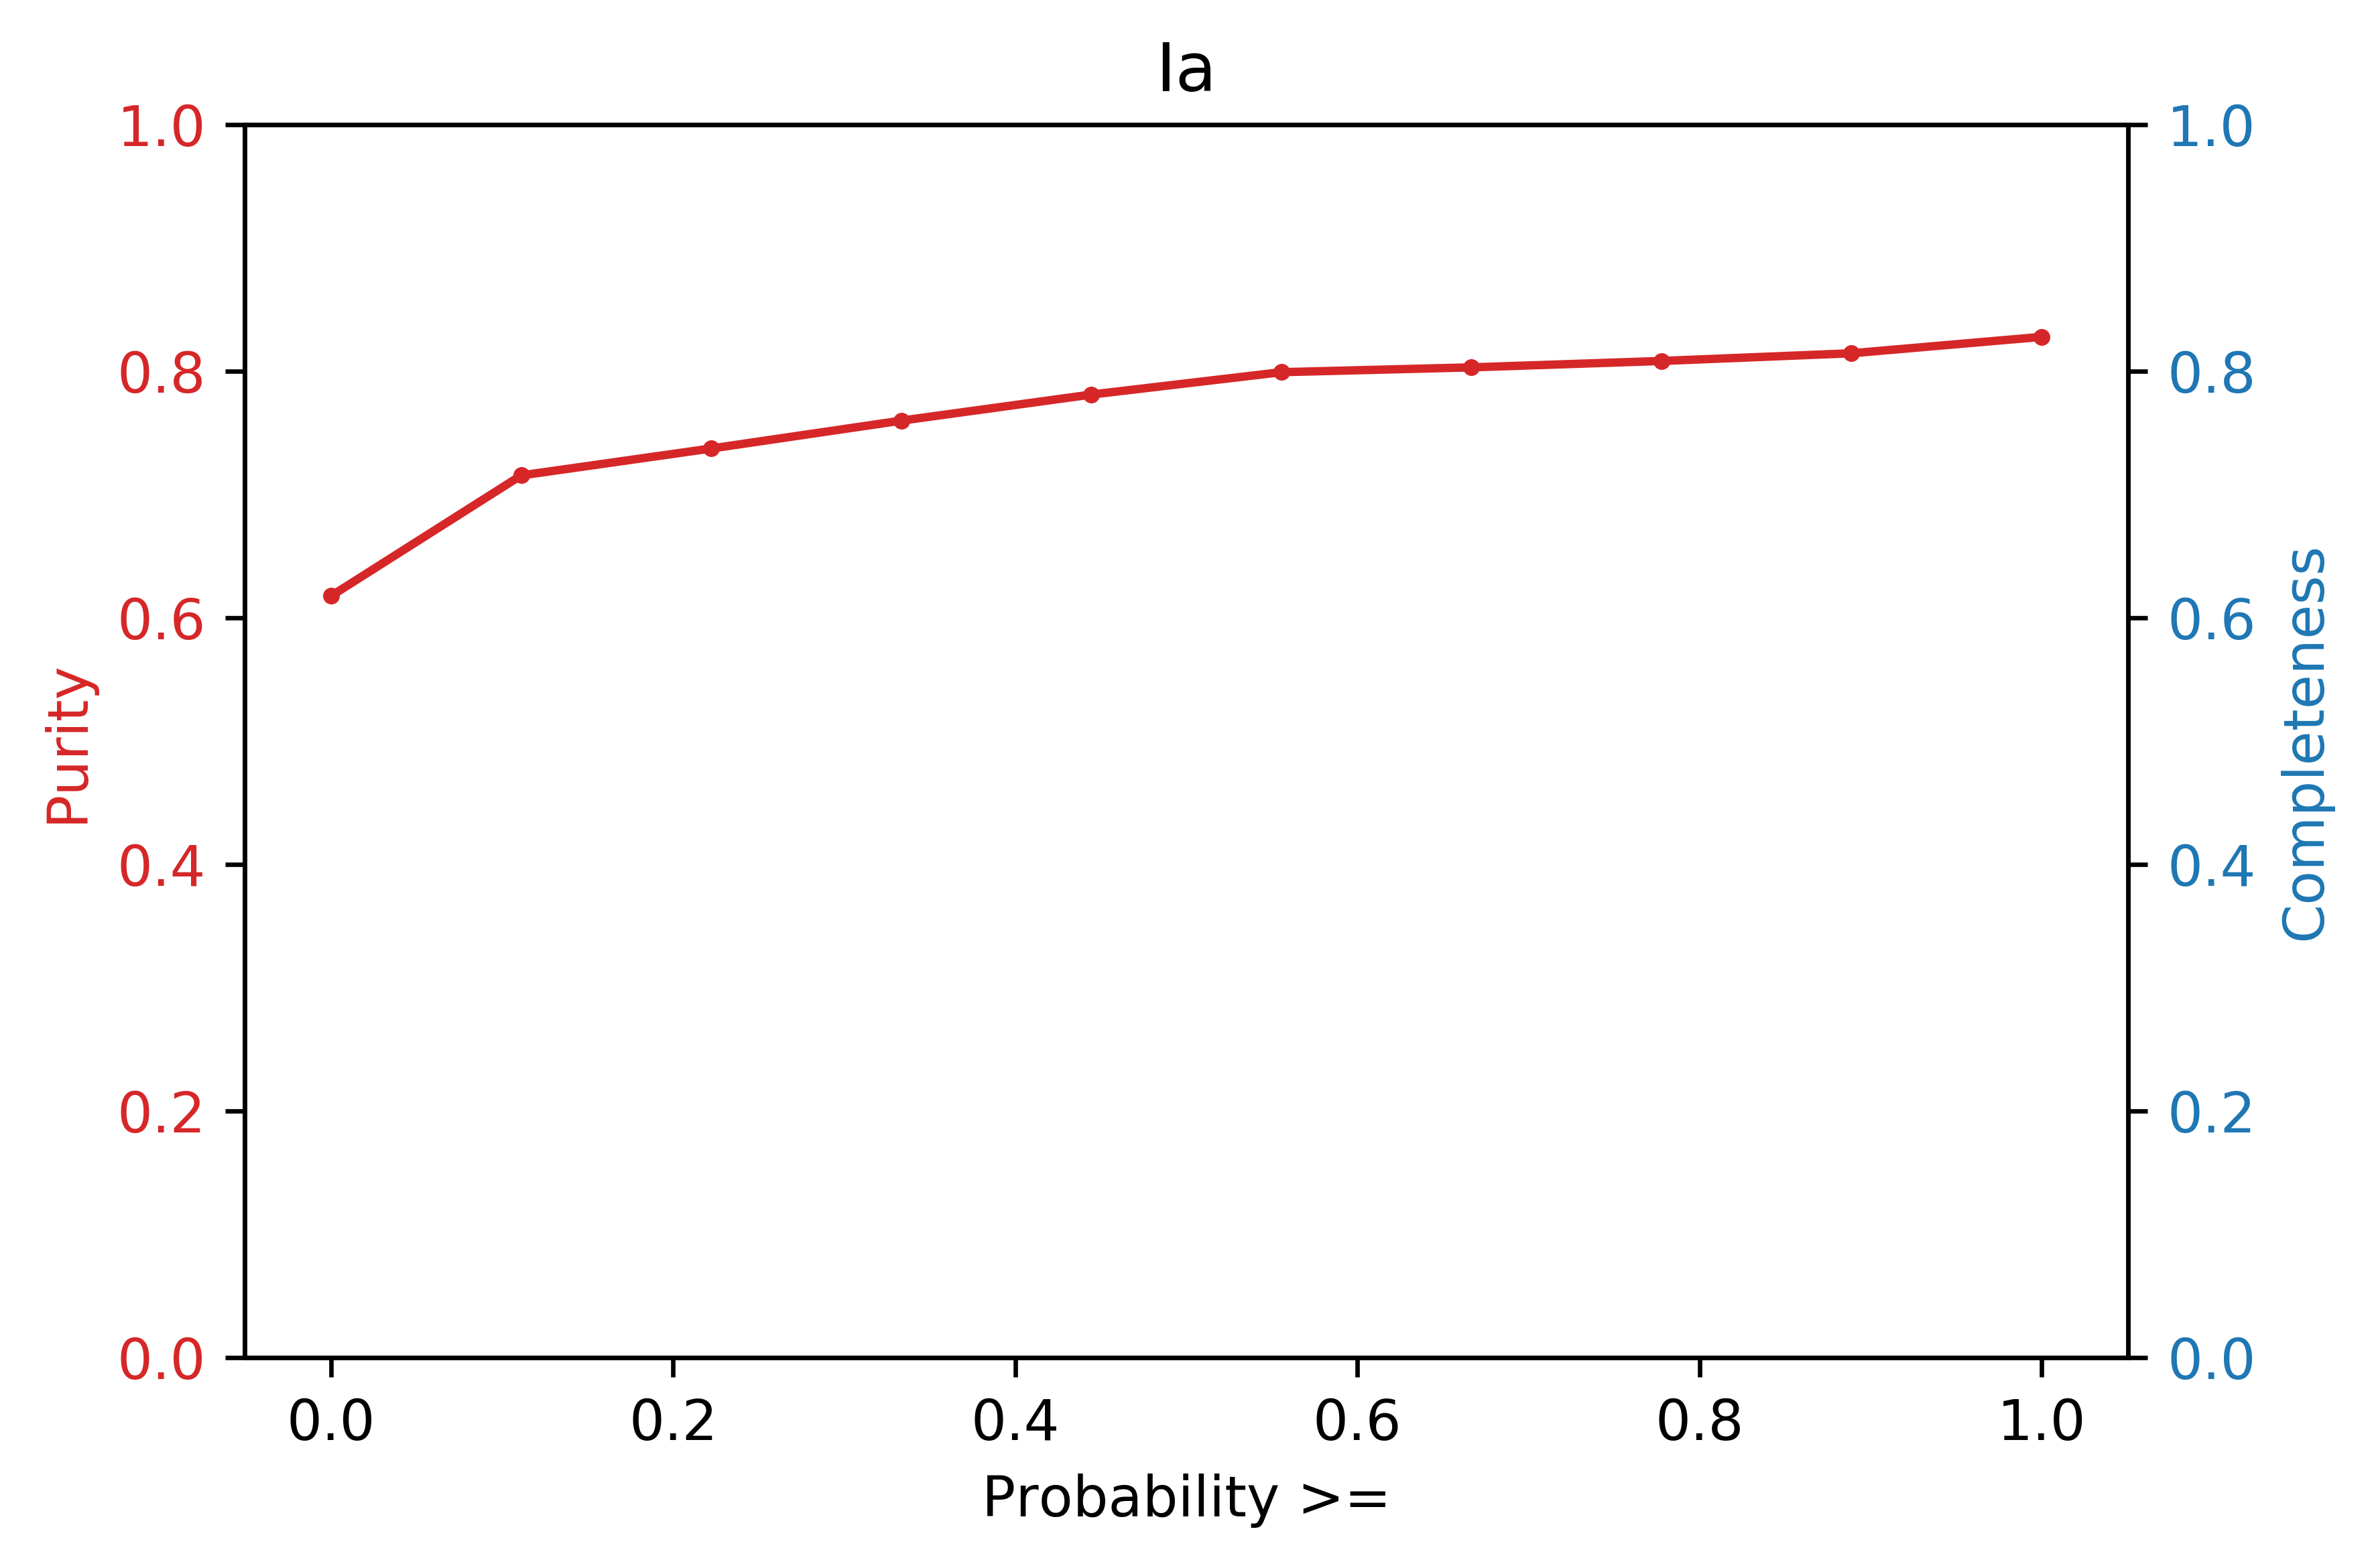

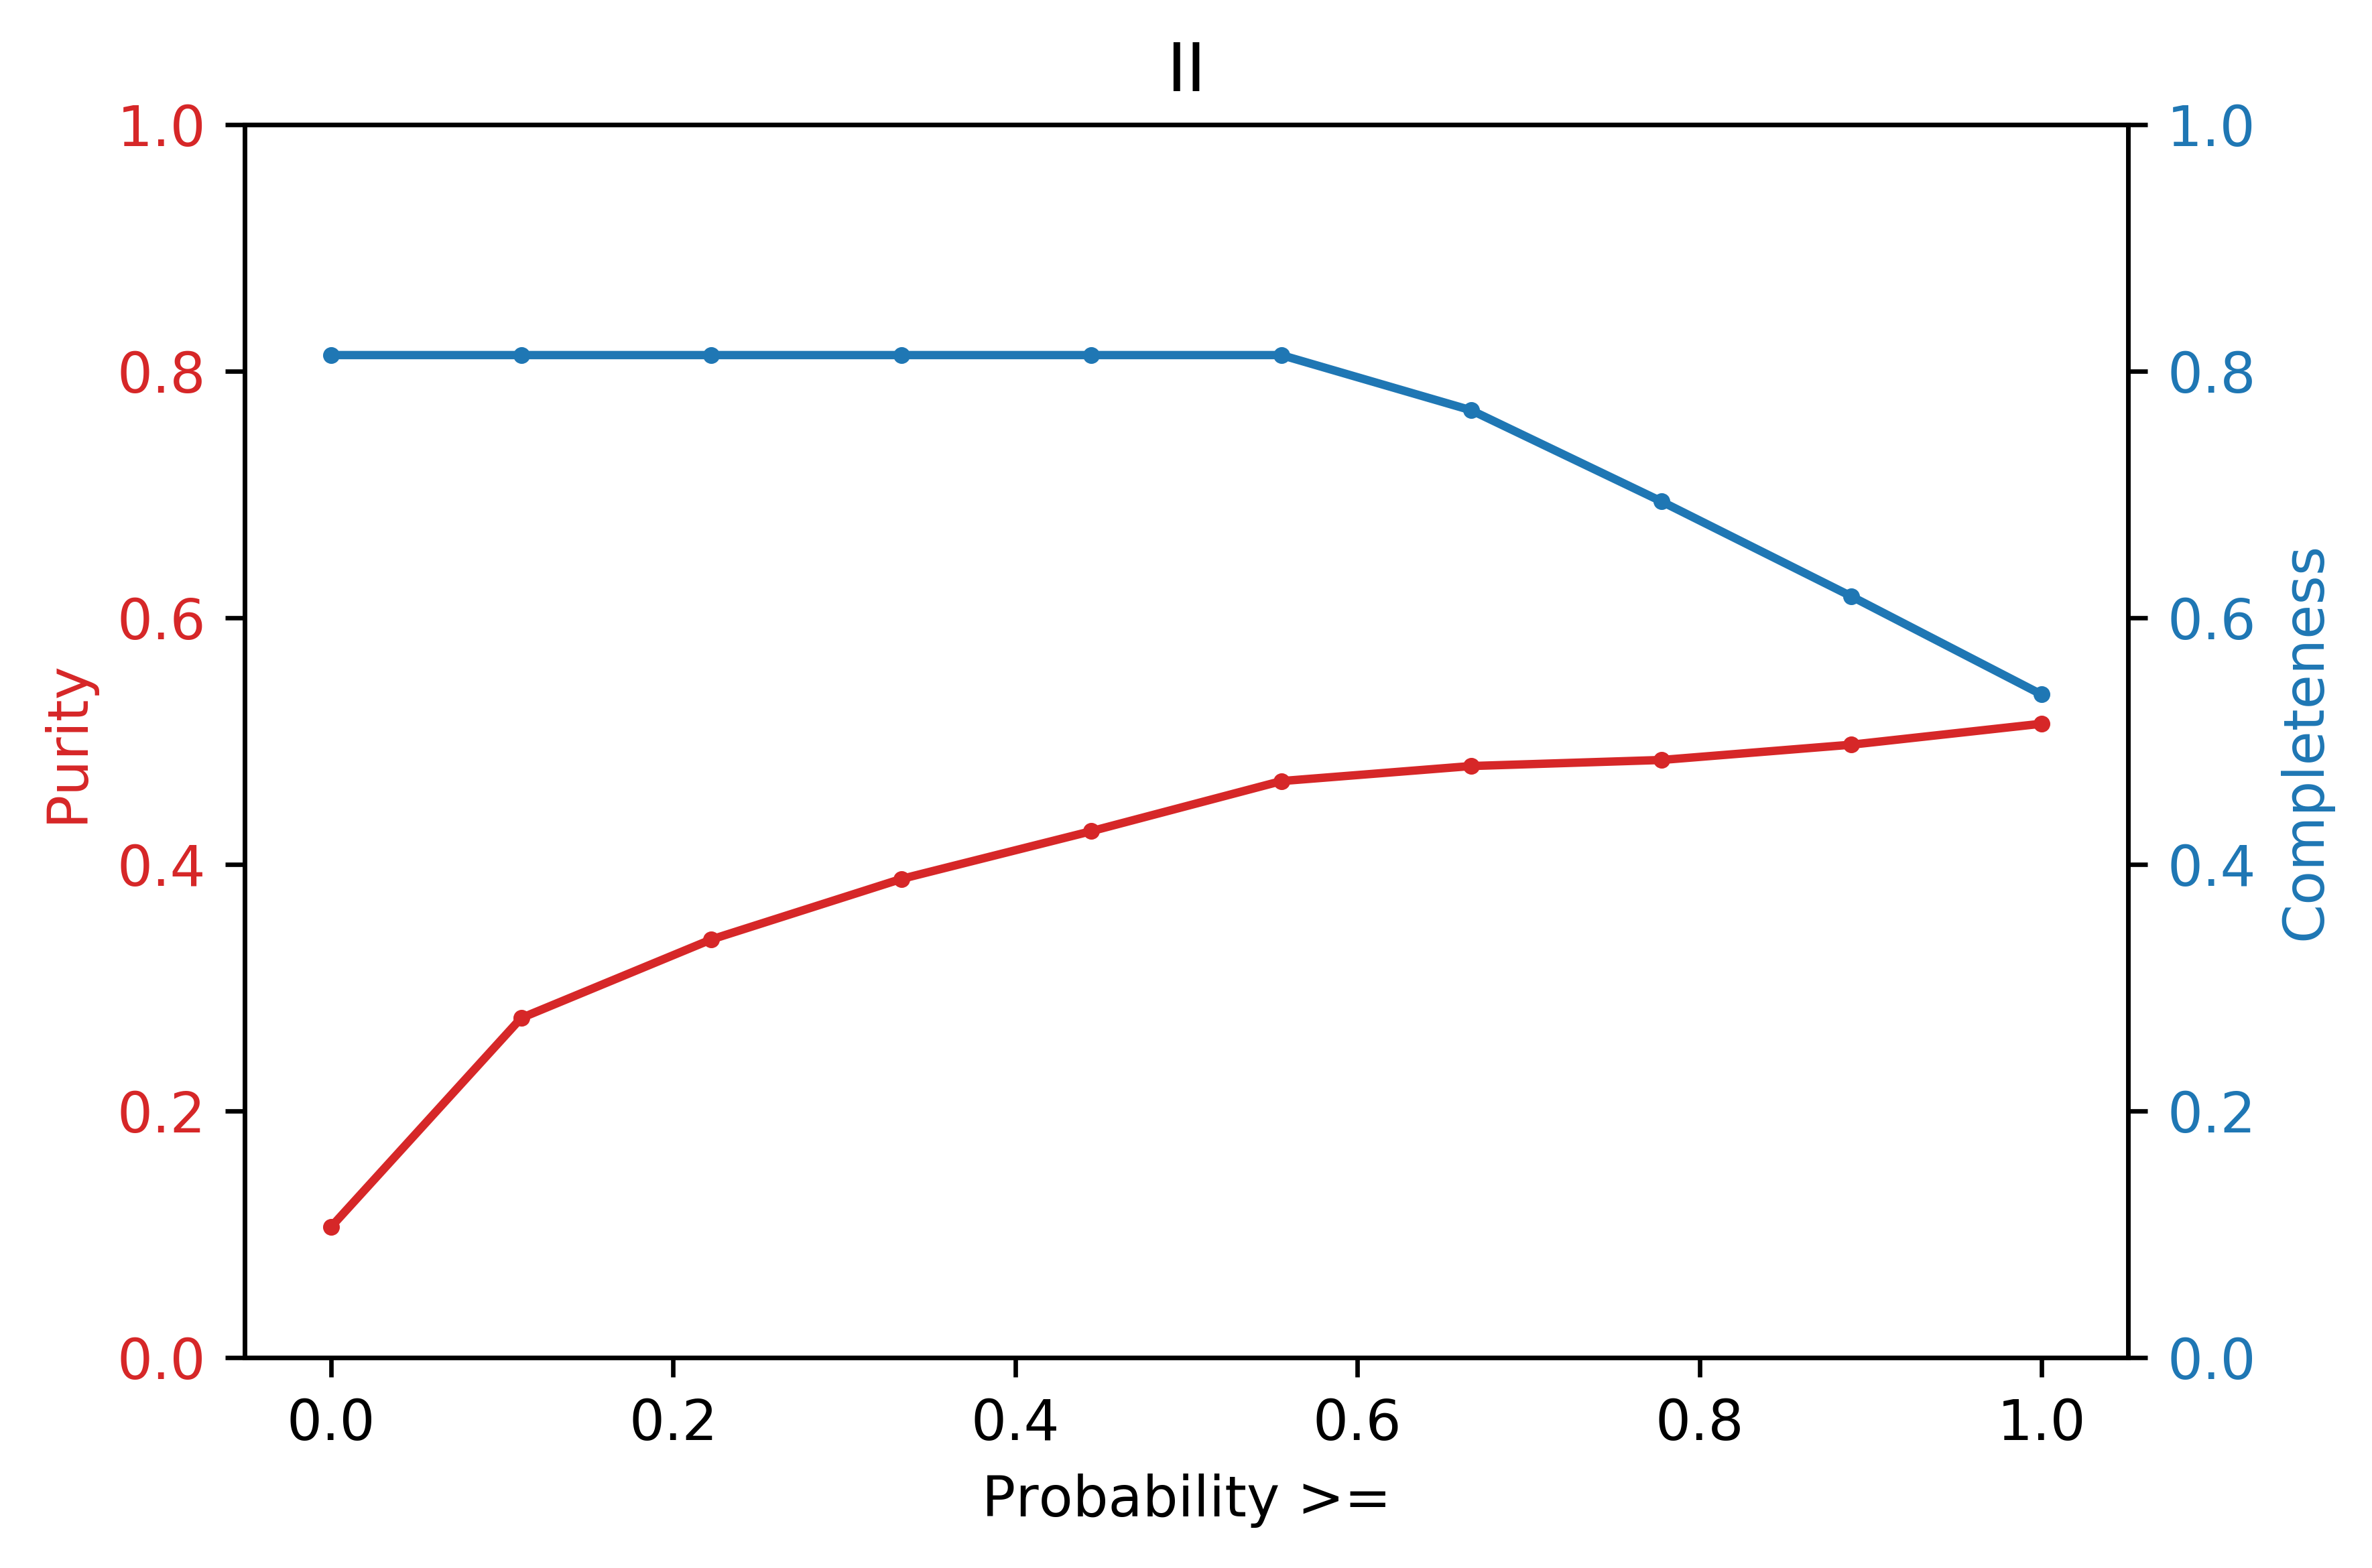

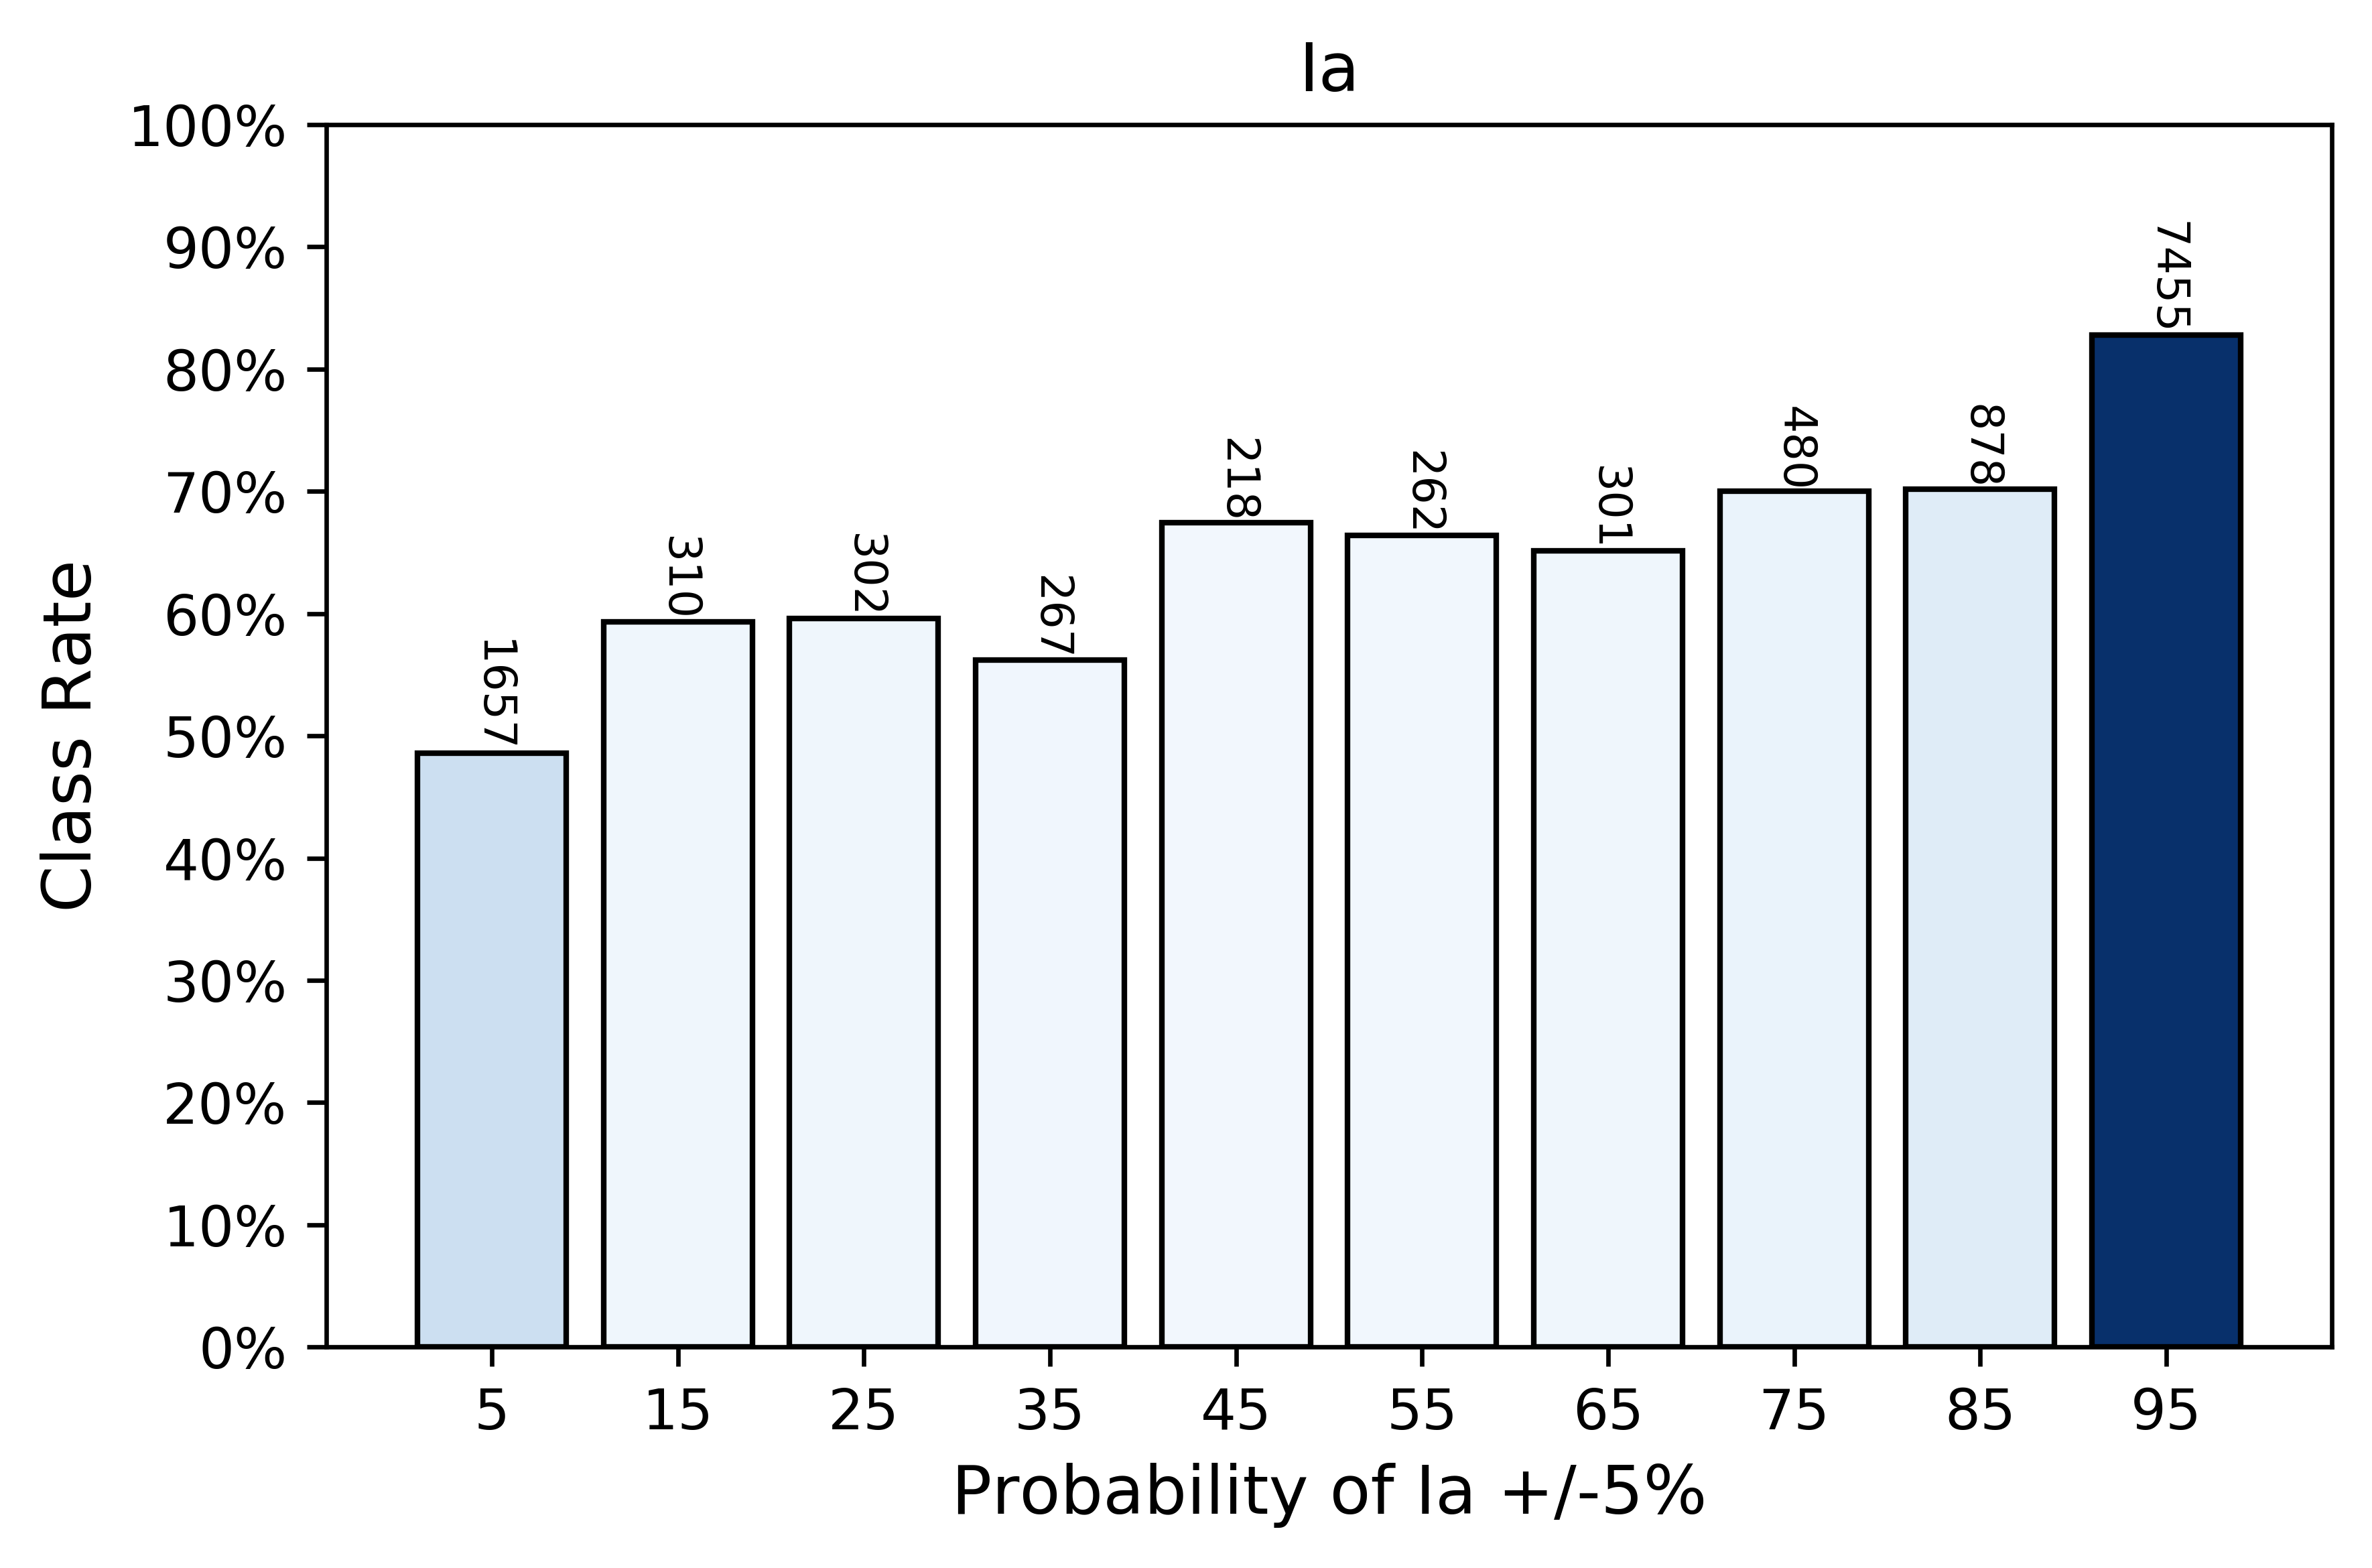

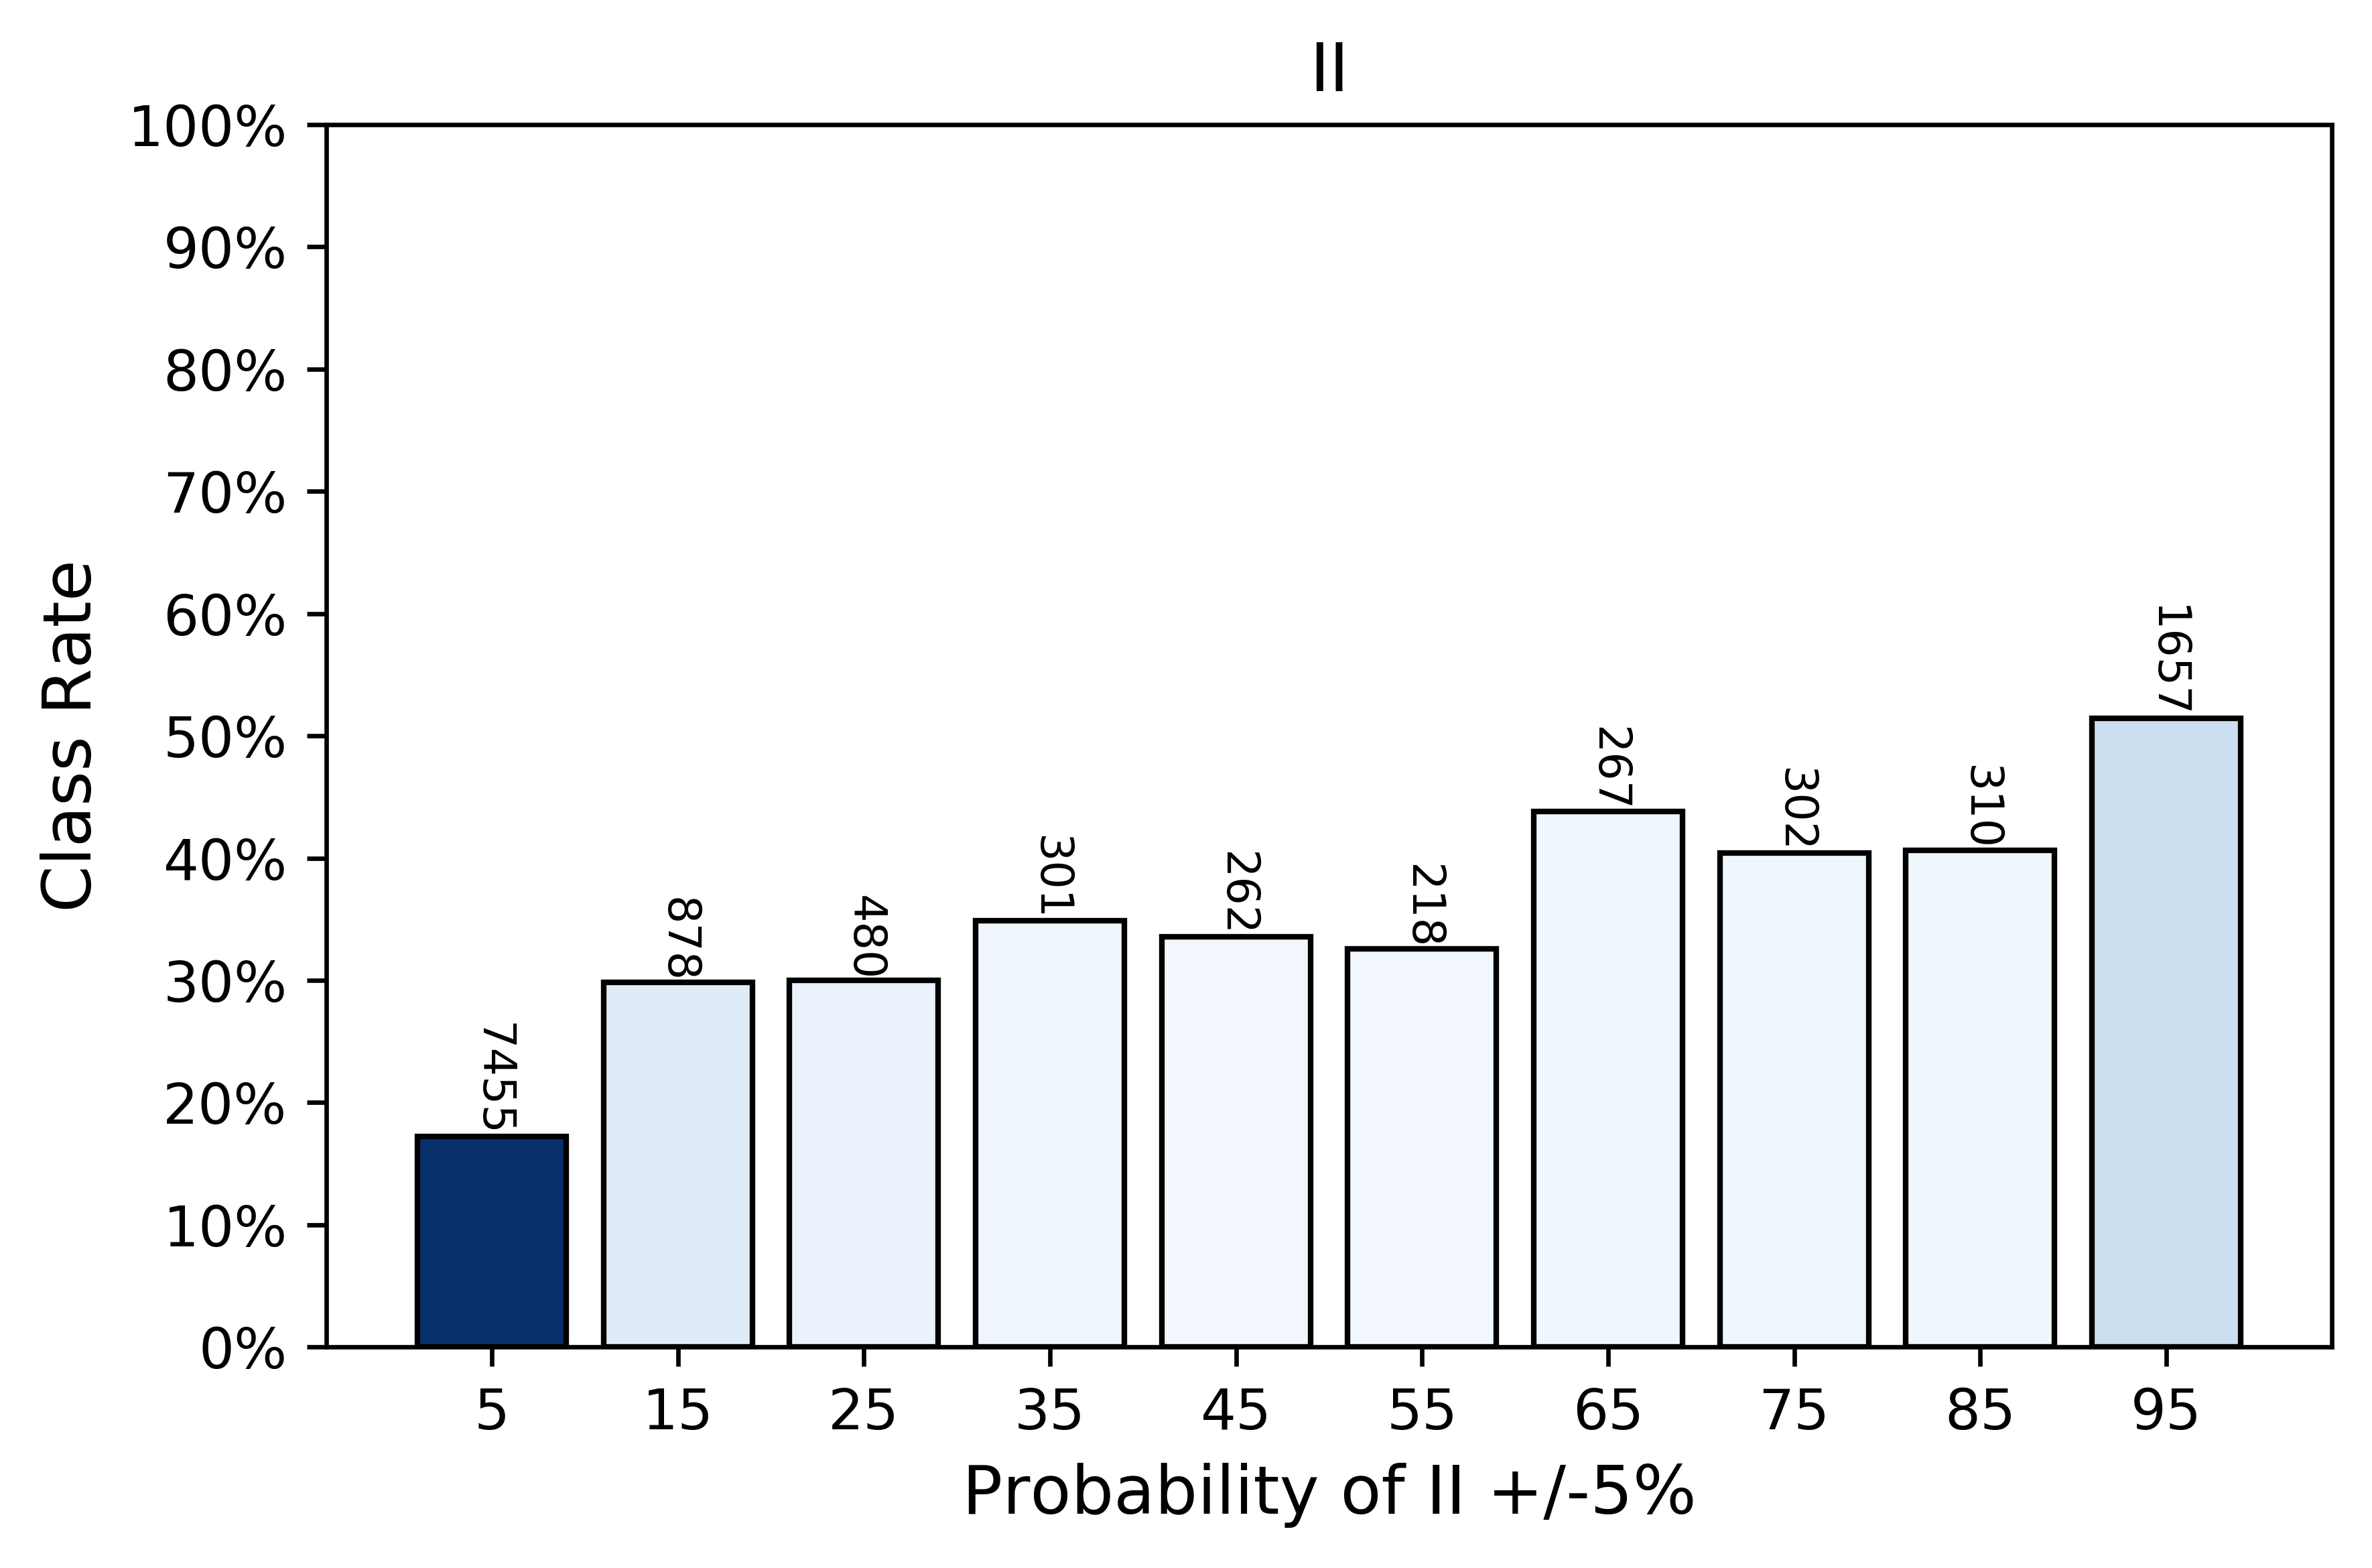

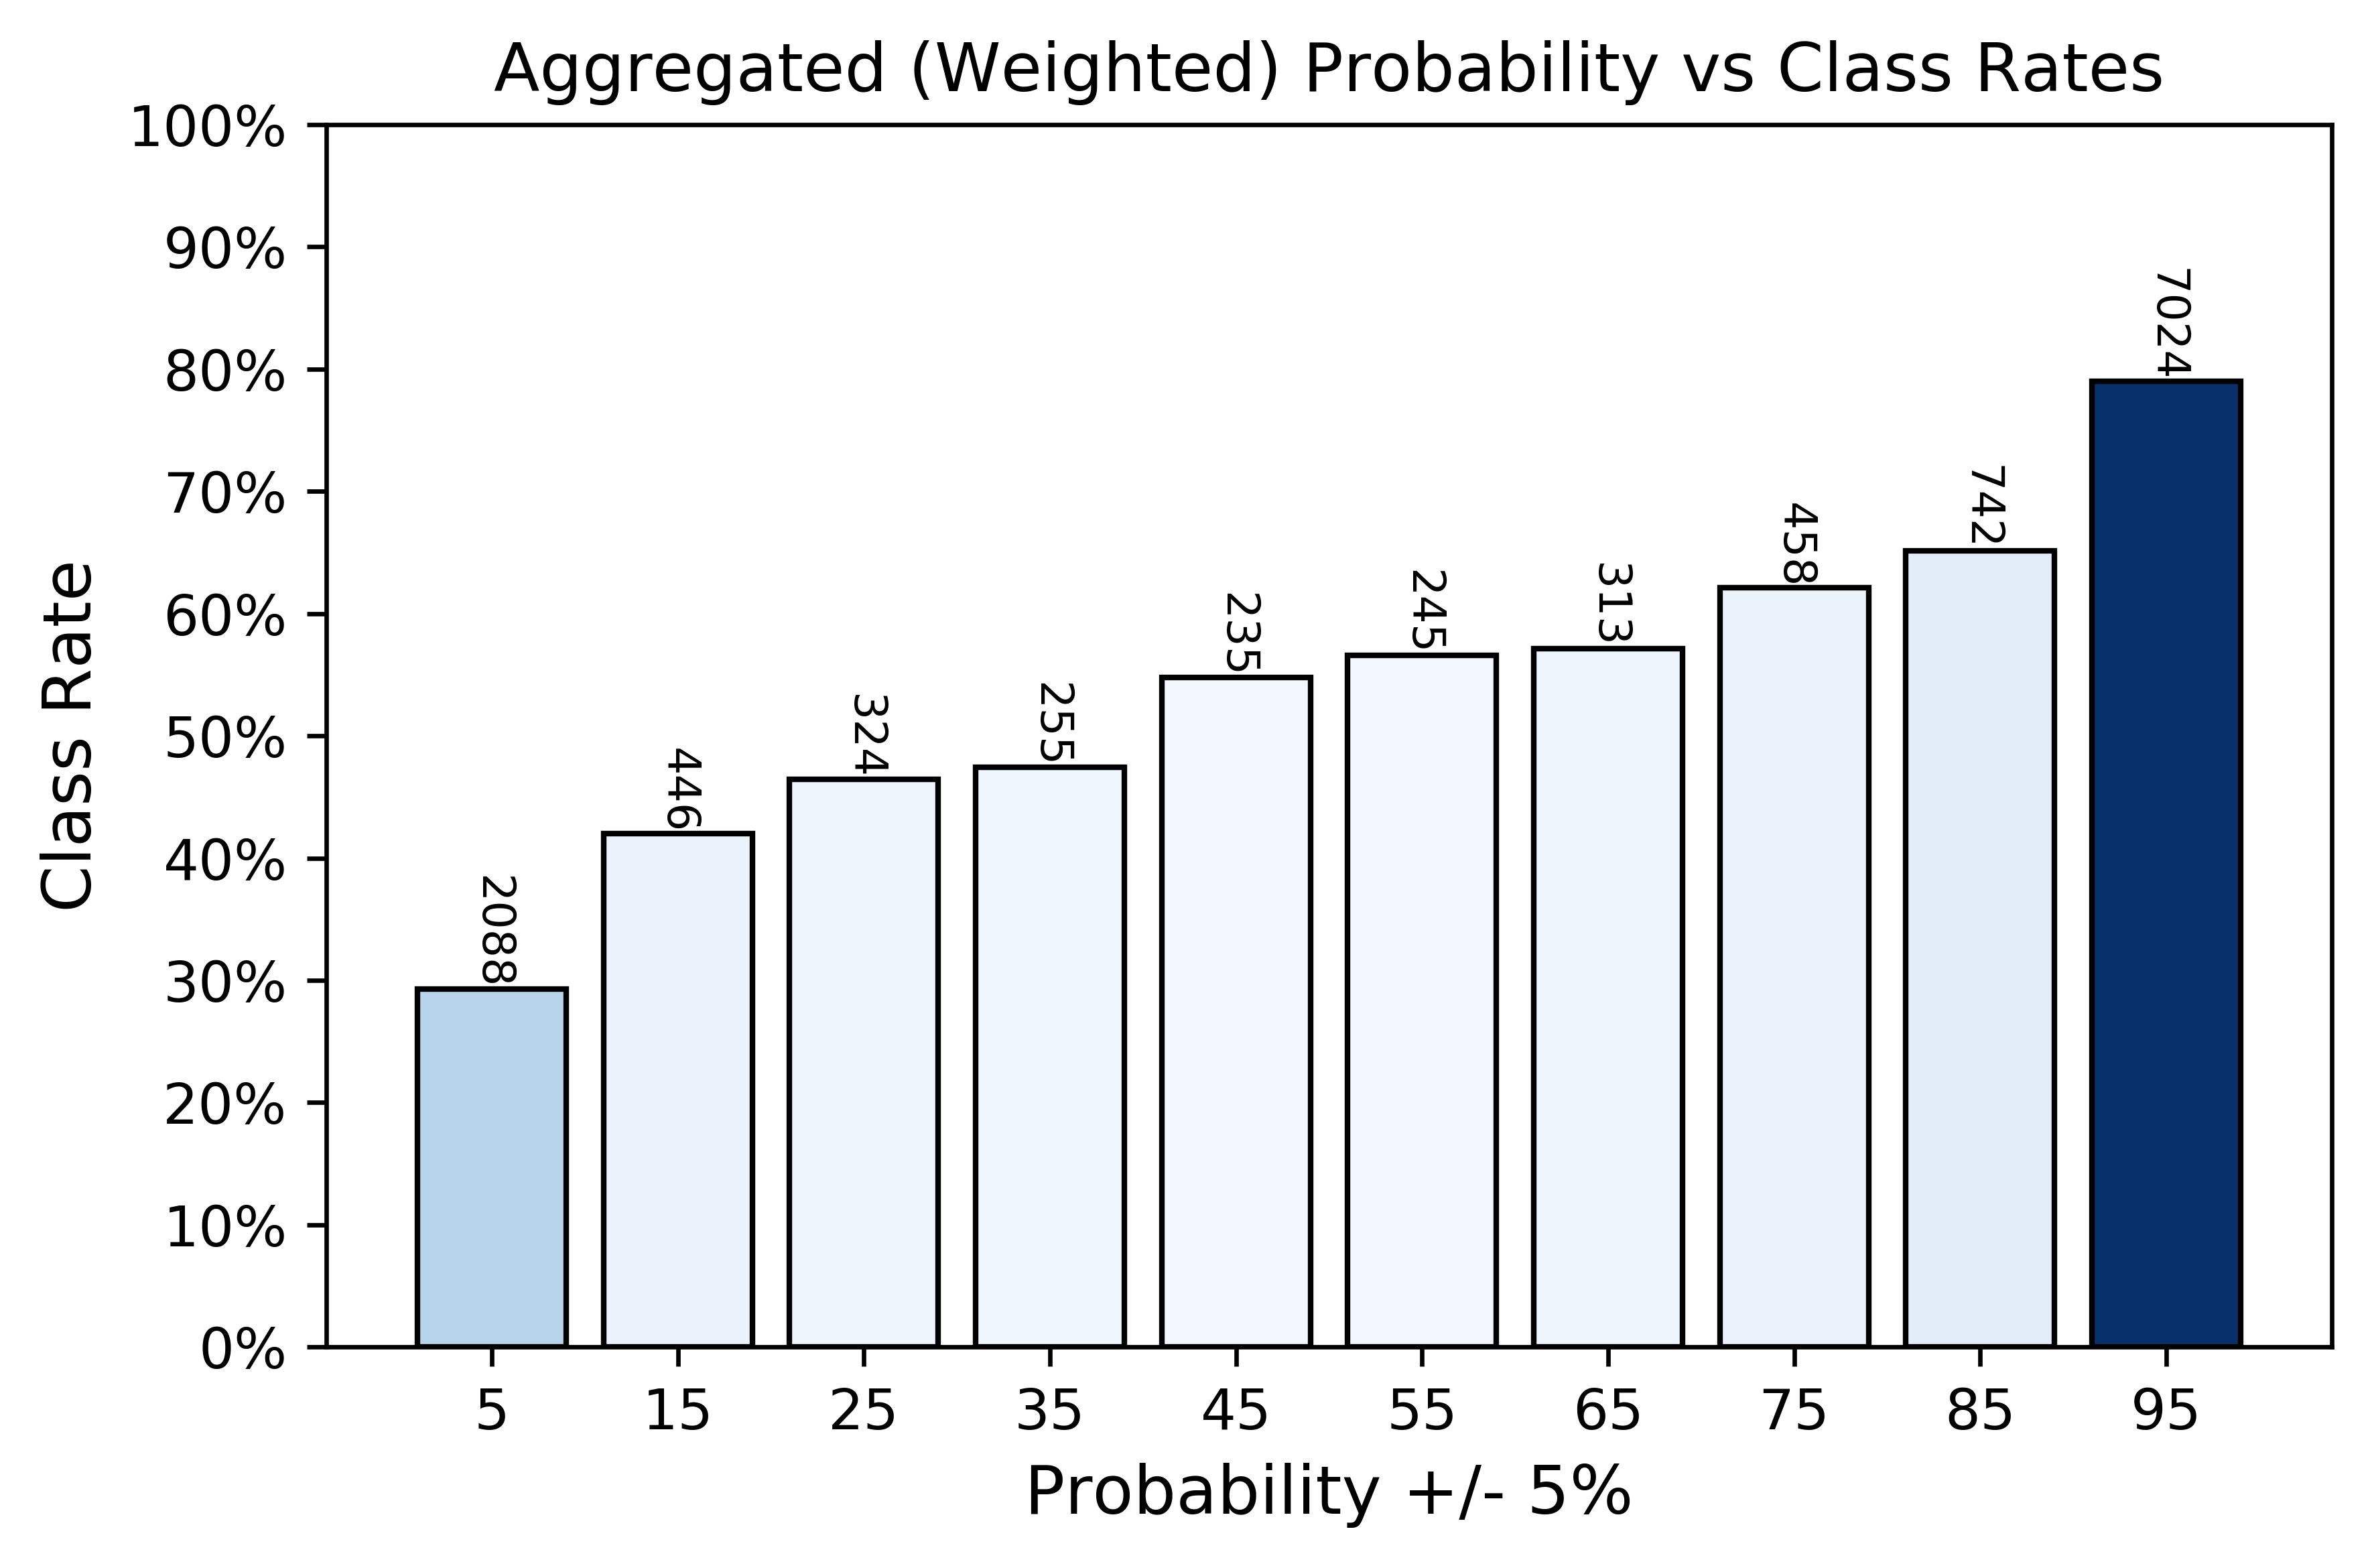

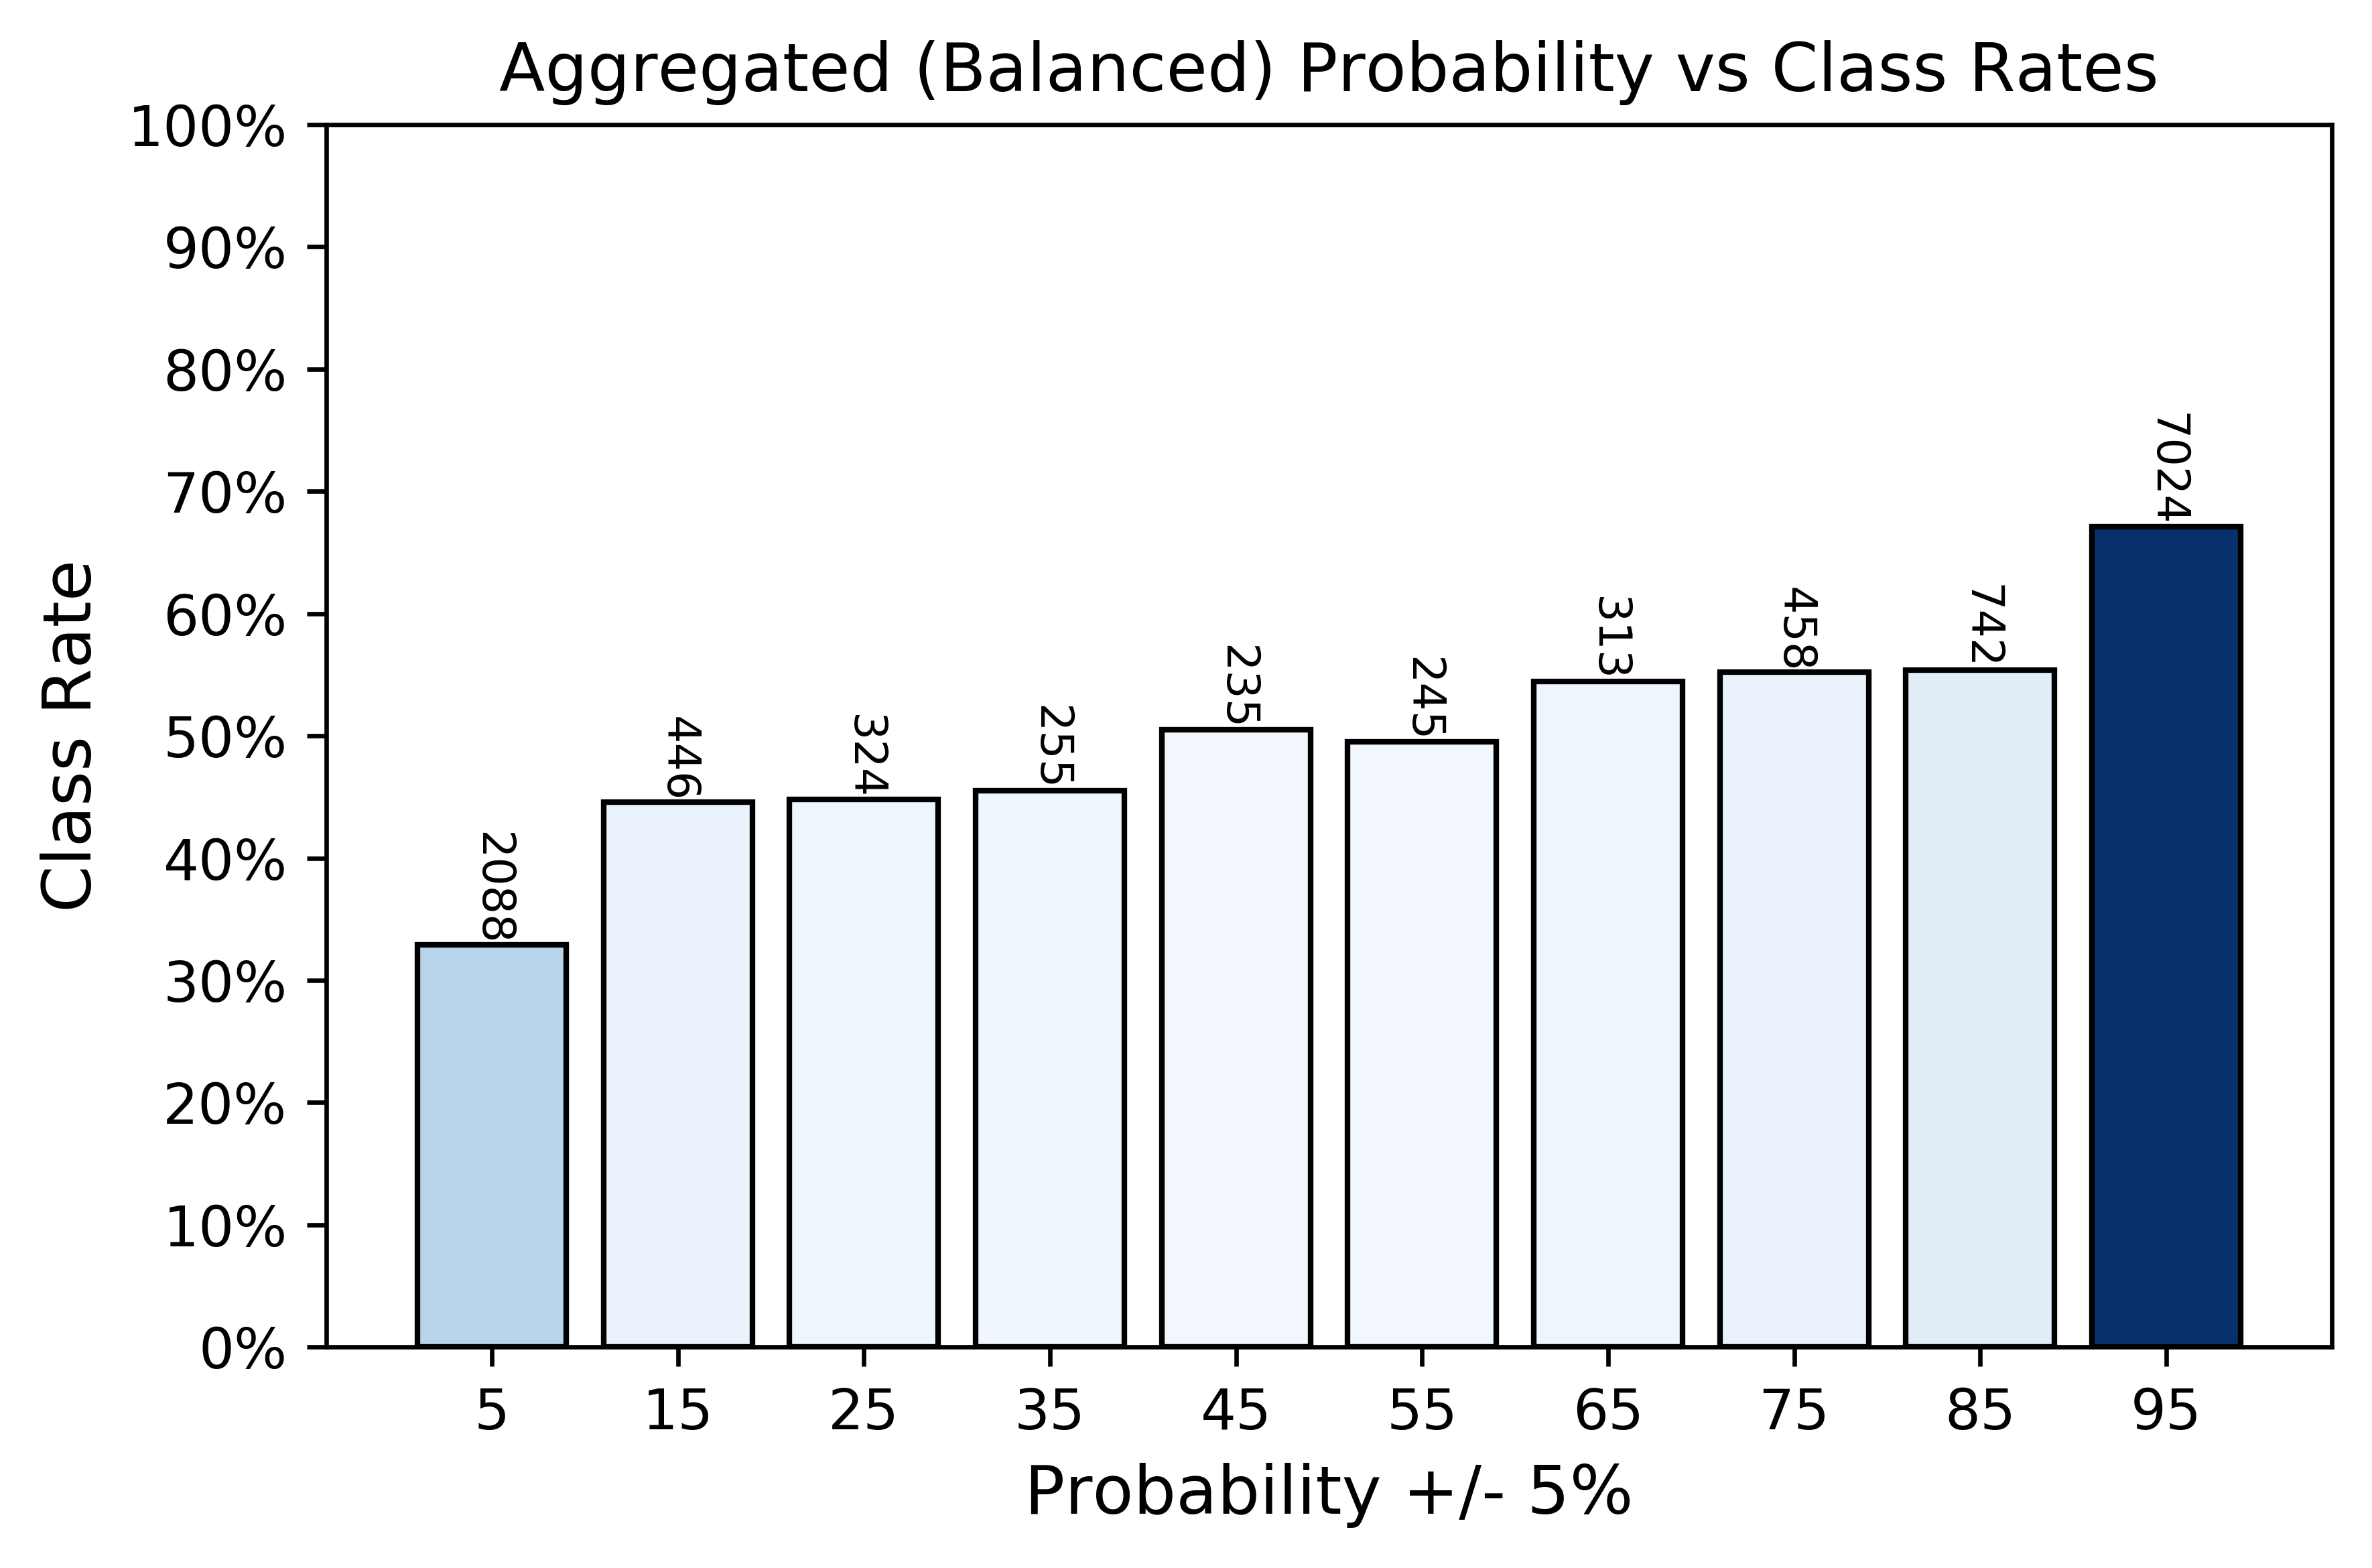

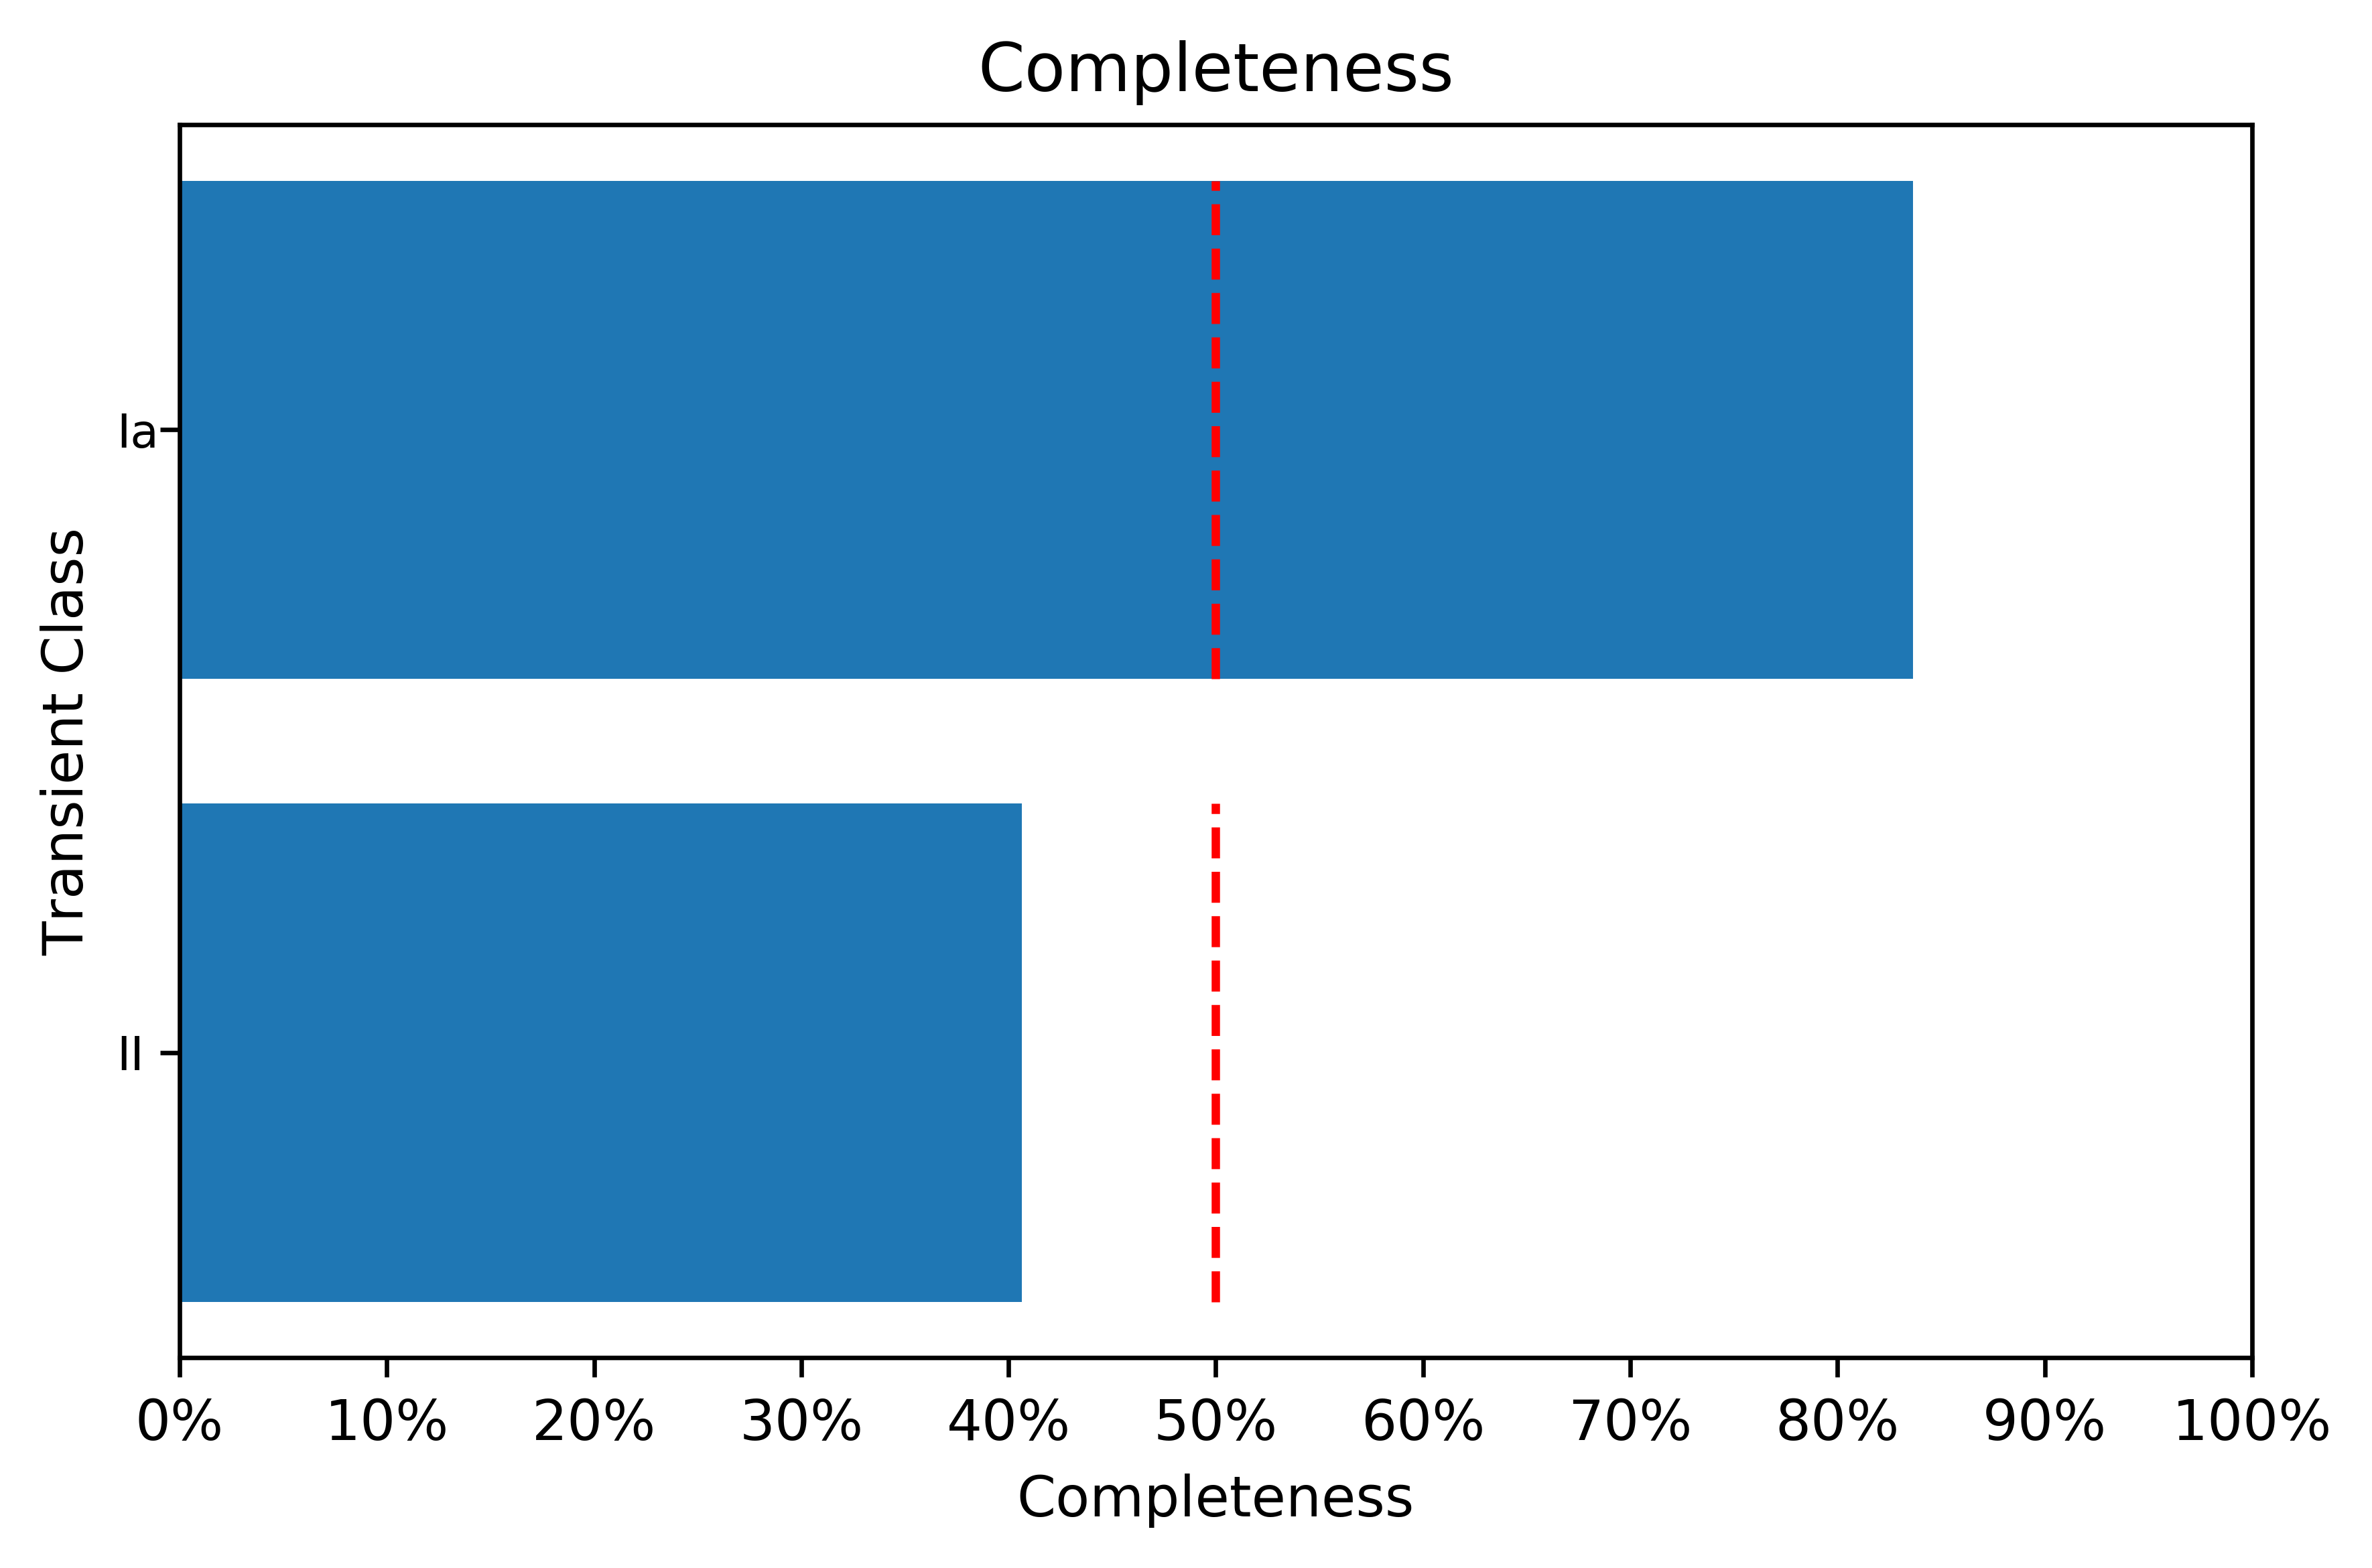

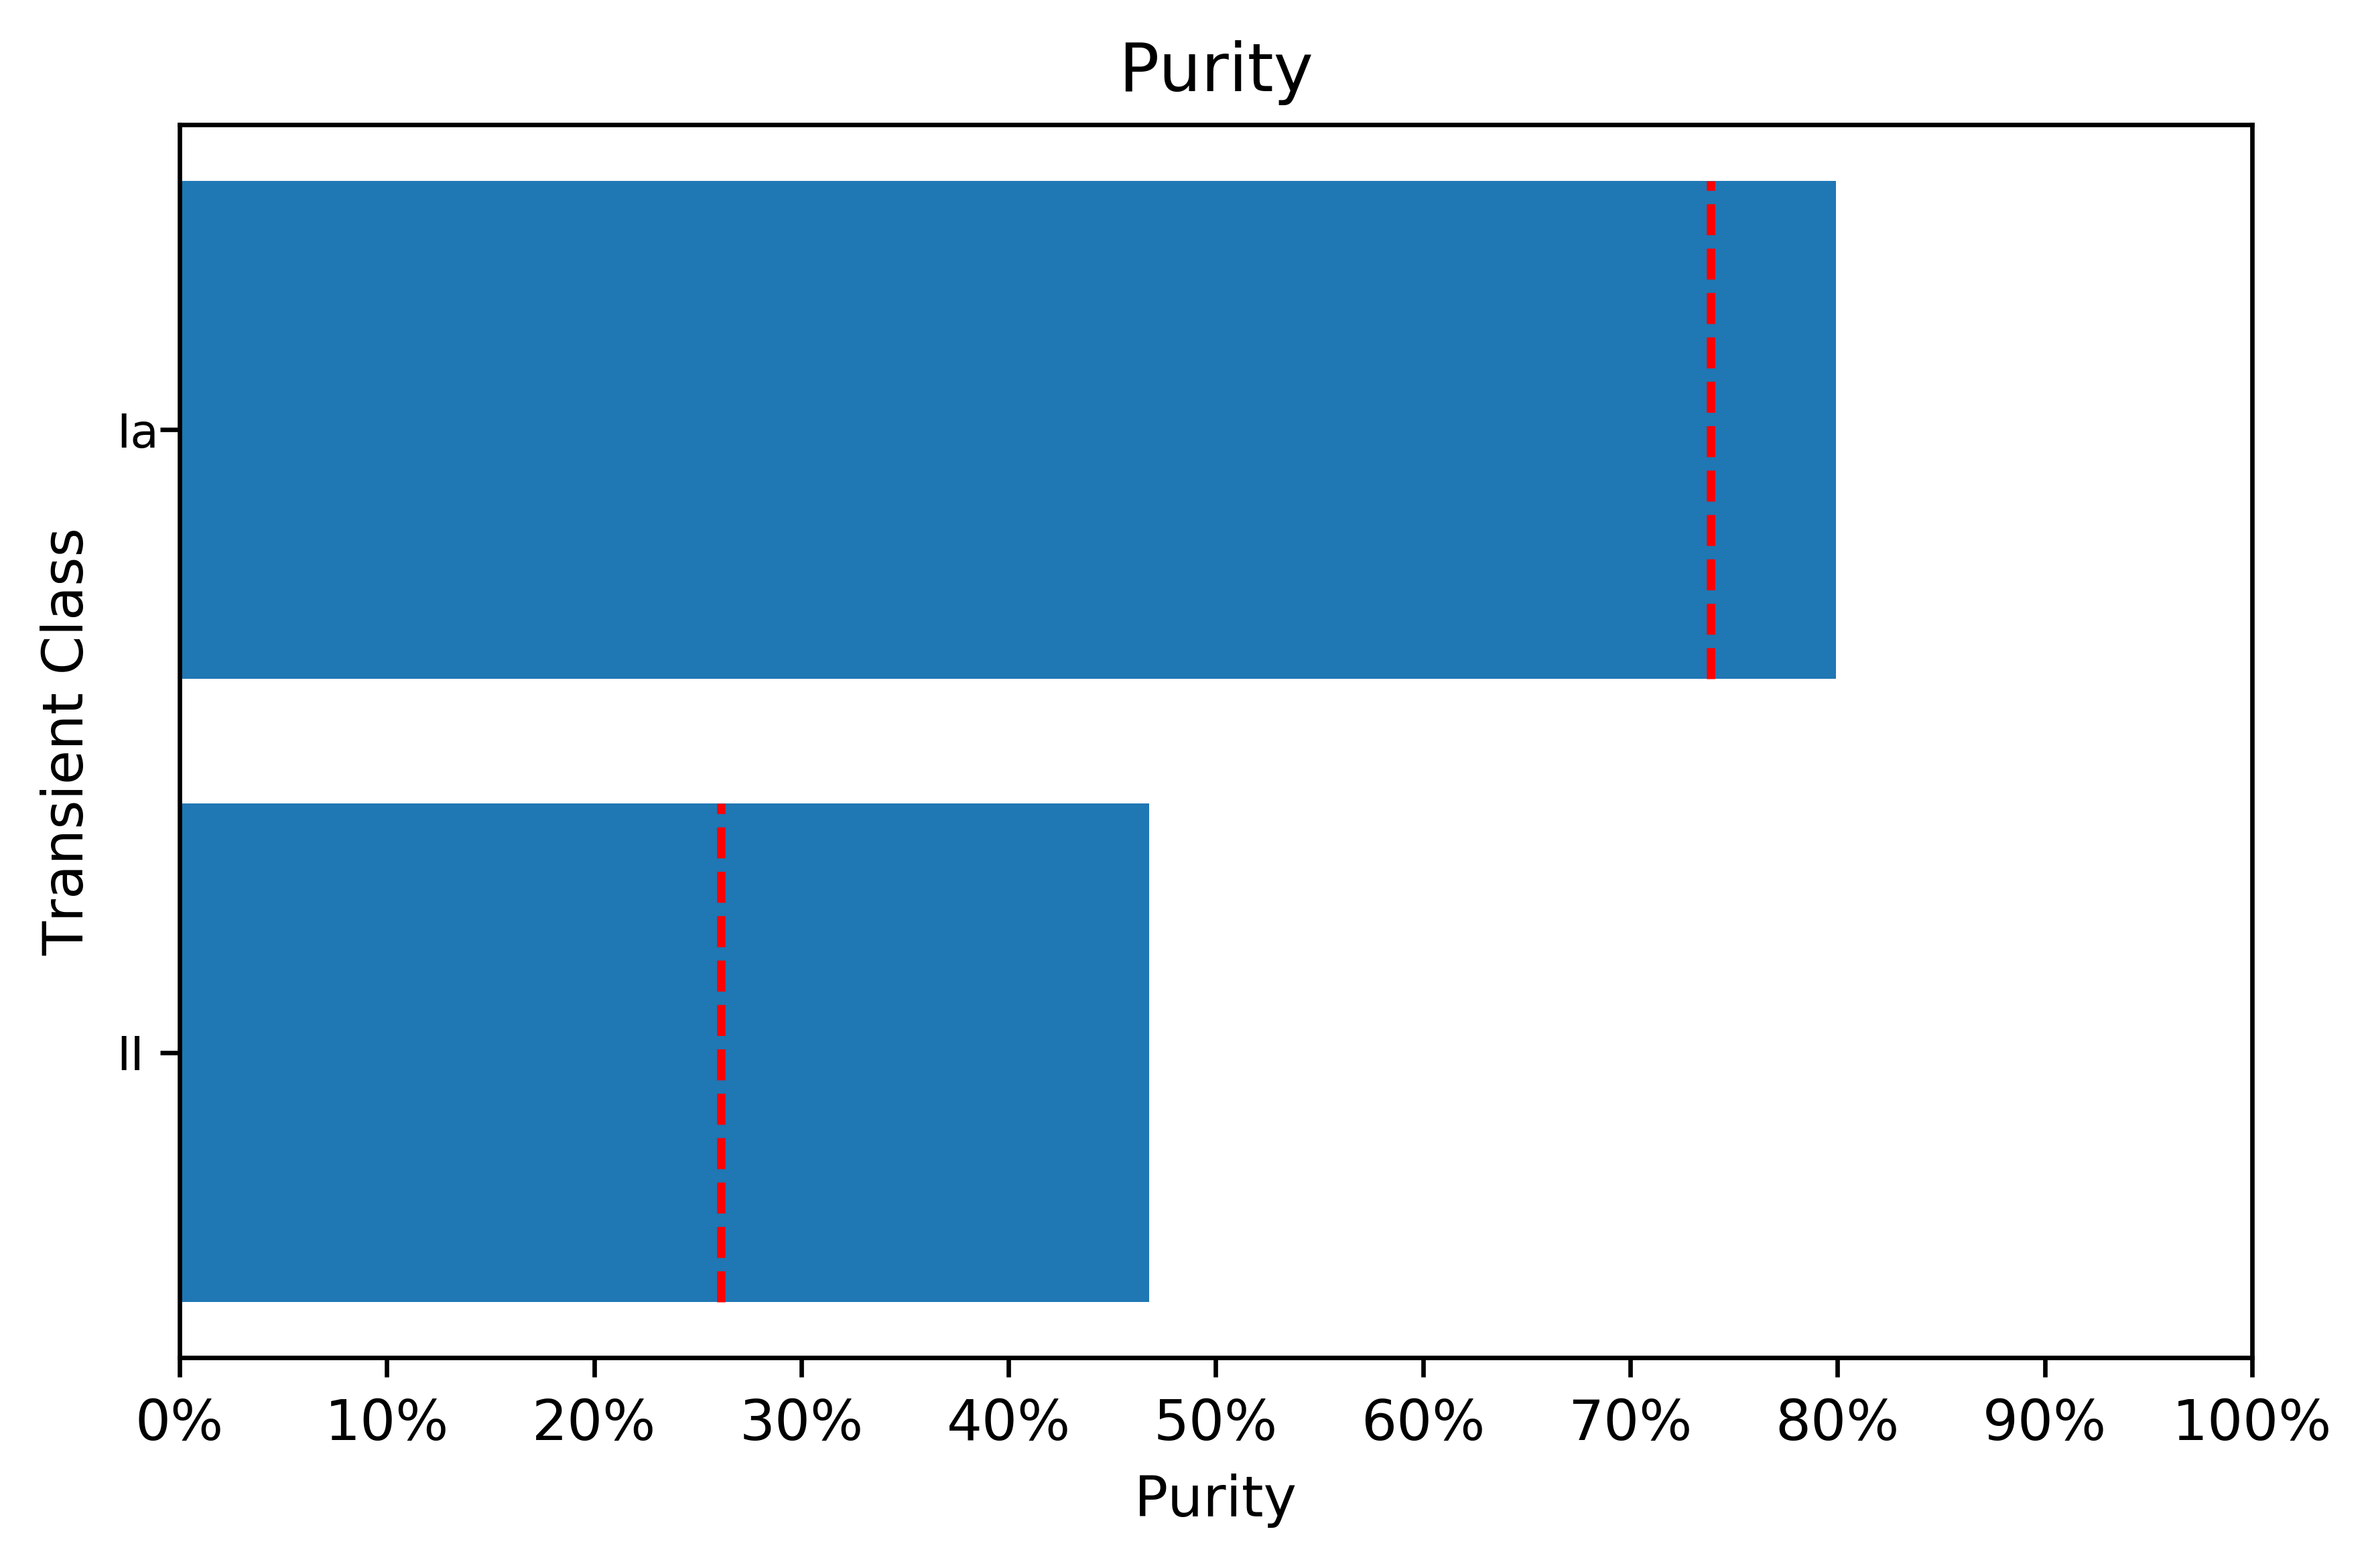

In [18]:
model = MultiModel(cols = ordered_mags, 
           class_labels = ['Ia', 'II'],
           transform_features = False,
           min_class_size = 40,
           folds=20
          )
get_test_results(model, X_orig_sampled[list(model.X)], y_orig_sampled)